In [1]:
# Import libraries
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
RAV ="C:\\Ravdes\\RAVDESS\\audio_speech_actors_01-24\\"
print(RAV)

C:\Ravdes\RAVDESS\audio_speech_actors_01-24\


In [6]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "F"
        else:
            temp = "M"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

M_sad         96
M_happy       96
F_sad         96
F_fear        96
M_surprise    96
M_fear        96
F_surprise    96
M_disgust     96
M_angry       96
F_happy       96
F_disgust     96
F_angry       96
F_calm        96
M_calm        96
M_neutral     48
F_neutral     48
Name: labels, dtype: int64

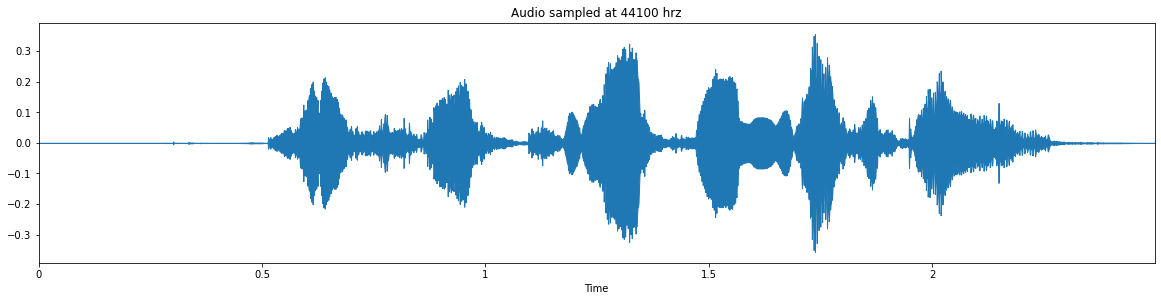

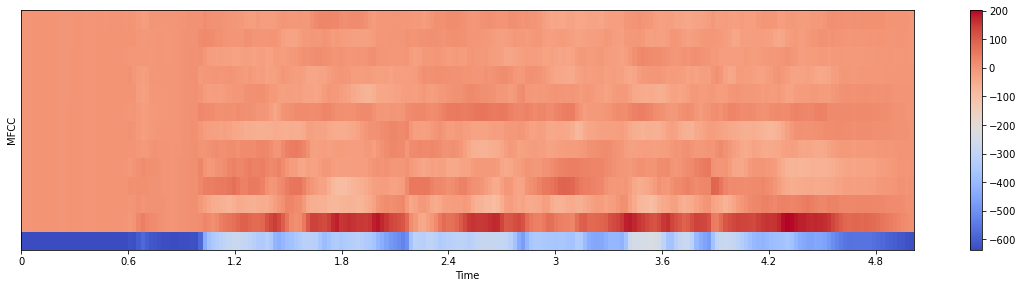

In [3]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:\\Ravdes\\RAVDESS\\audio_speech_actors_01-24\\Actor_08\\03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

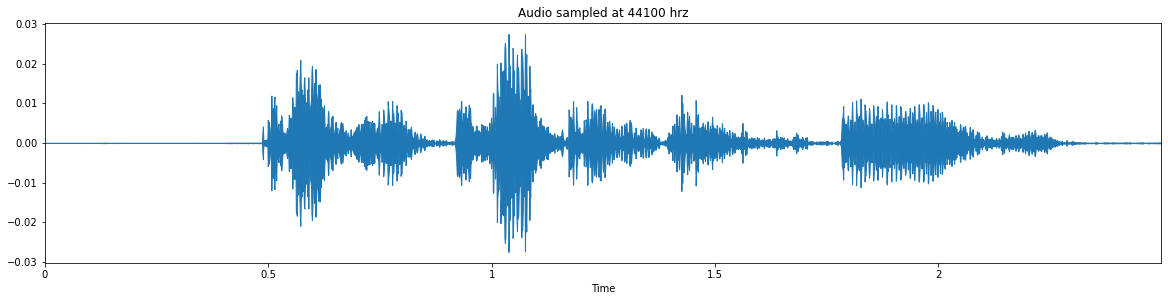

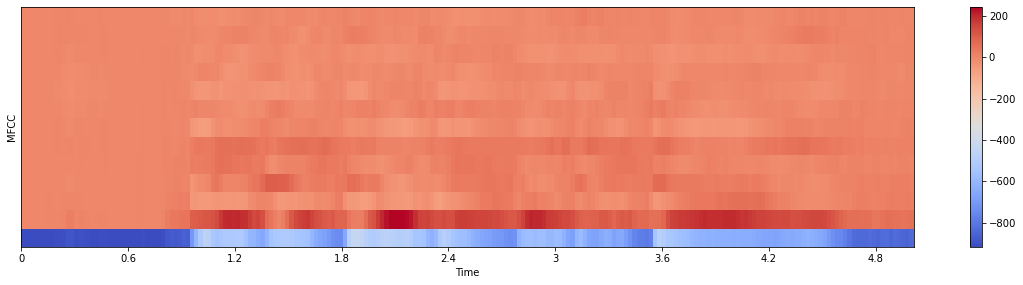

In [4]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:\\Ravdes\\RAVDESS\\audio_speech_actors_01-24\\Actor_09\\03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

### Now we've seen the shape of an MFCC output for each file, and it's a 2D matrix format with MFCC bands on the y-axis and time on the x-axis, representing the MFCC bands over time. To simplify things, what we're going to do is take the mean across each band over time. In other words, row means. But how does it present as a distinctive feature?

### So if you look at the above MFCC plot, the first band at the bottom is the most distinctive band over the other bands. Since the time window is a short one, the changes observed overtime does not vary greatly. The key feature is capturing the information contained in the various bands. Lets plot the mean of each of the band and display it as a time series plot to illustrate the point.

### We'll compare the Angry female and Angry male for the same sentence uttered.

216
216


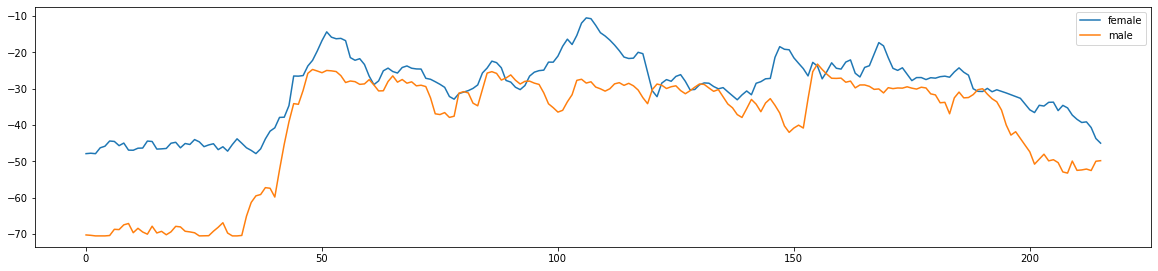

In [5]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "C:\\Ravdes\\RAVDESS\\audio_speech_actors_01-24\\Actor_08\\03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "C:\\Ravdes\\RAVDESS\\audio_speech_actors_01-24\\Actor_09\\03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

### So for the same sentence being uttered, there is a clear distint difference between male and female in that females tends to have a higher pitch.

In [10]:
ref=RAV_df
ref.head(5)

labels   source                                               path
0  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...
1  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...
2  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...
3  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...
4     M_calm  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...

In [11]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1
    print(counter, mfccs)

# Check a few records to make sure its processed successfully
print(len(df))
df.head()

1 [-65.80097  -65.80097  -65.80097  -65.80097  -65.80097  -65.80097
 -65.80097  -65.80097  -65.80097  -65.80097  -65.80097  -65.80097
 -65.80097  -65.80097  -65.80097  -65.80097  -65.79317  -65.80097
 -65.80097  -65.80097  -63.896137 -60.06334  -61.391453 -59.506573
 -61.304344 -60.47944  -59.622013 -59.312965 -56.807724 -57.467476
 -54.780277 -54.33812  -56.671494 -56.02169  -55.159336 -55.876816
 -56.127678 -56.435852 -55.660583 -53.22207  -52.017757 -51.894794
 -48.247776 -36.872196 -34.63617  -35.332005 -35.97329  -29.69471
 -25.790709 -25.337917 -26.045286 -26.533817 -25.579006 -23.874899
 -24.26255  -26.132225 -27.260983 -27.198997 -27.877888 -28.448301
 -27.748417 -26.44417  -25.269636 -24.475765 -24.007607 -24.083933
 -24.724846 -26.4546   -29.186516 -31.16392  -30.411171 -29.637468
 -31.555851 -31.773363 -34.2731   -34.291187 -30.01024  -27.754906
 -26.995674 -28.3454   -29.476929 -28.658468 -28.281578 -27.731453
 -26.625526 -25.776878 -27.227072 -30.215086 -32.35724  -33.9217

6 [-67.55739  -67.55739  -67.55739  -67.55739  -67.55739  -67.55739
 -65.239815 -65.536194 -67.55739  -67.55739  -67.55739  -67.55739
 -67.55739  -67.55739  -67.55739  -67.20701  -63.987667 -63.15942
 -65.25977  -67.55739  -67.55739  -67.55739  -67.55739  -67.55739
 -67.55739  -67.55739  -67.55739  -67.55739  -67.55739  -67.55739
 -67.55739  -67.55739  -67.55739  -67.55739  -67.55739  -67.55739
 -67.55739  -65.52441  -61.292175 -57.662598 -58.027122 -58.14887
 -49.40815  -36.663136 -33.712673 -33.74662  -34.333744 -36.711952
 -39.608963 -33.929268 -29.288534 -27.309155 -28.501766 -27.893974
 -27.933    -27.838158 -27.380882 -27.012438 -25.143995 -25.147013
 -26.702003 -28.376667 -26.47779  -26.938015 -26.700512 -27.099012
 -26.56583  -27.686308 -28.884914 -29.093142 -28.99535  -25.535088
 -26.331322 -25.733511 -26.877428 -26.098358 -27.509966 -26.785154
 -26.684376 -26.05757  -26.88251  -27.238213 -26.953026 -26.99138
 -26.395548 -28.570662 -30.729292 -31.753101 -32.710415 -33.490032
 

 -30.615467 -31.12634  -31.148716 -31.413185 -31.356203 -30.060383]
11 [-73.25497  -73.25497  -73.25497  -73.25497  -68.77443  -69.3804
 -73.25497  -73.25497  -73.25497  -73.25497  -73.25497  -73.25497
 -73.25497  -71.55051  -71.15009  -73.25497  -73.25497  -73.25497
 -73.25497  -73.25497  -73.25497  -73.25497  -72.89257  -72.110245
 -71.601654 -72.548325 -68.22348  -65.03978  -66.32254  -66.98917
 -66.278496 -63.223858 -62.232708 -63.153816 -66.700325 -67.49586
 -62.531063 -59.962215 -62.48578  -63.181217 -64.608864 -59.29031
 -52.157314 -42.242146 -33.693474 -29.377916 -26.457886 -26.431501
 -25.790485 -25.58666  -25.444118 -25.312956 -25.453918 -26.511879
 -24.627615 -25.066195 -24.733406 -24.700716 -26.133396 -25.128847
 -25.025818 -25.747782 -25.909843 -26.153078 -27.513264 -28.29112
 -29.254457 -29.612652 -30.209568 -28.737295 -28.193214 -28.446787
 -28.552948 -29.541826 -30.829998 -32.19995  -34.8934   -38.33144
 -36.336166 -33.640995 -32.290337 -29.88701  -28.381306 -29.604143


 -55.481724 -52.952225 -51.401585 -54.07297  -52.639565 -52.66418 ]
15 [-65.427315 -65.427315 -65.26178  -65.427315 -65.427315 -65.427315
 -65.02759  -65.40433  -65.427315 -58.99903  -59.85993  -65.427315
 -64.95387  -62.659546 -60.537838 -57.967068 -55.97508  -53.762547
 -54.54757  -56.750145 -54.922565 -55.847286 -57.197224 -54.213745
 -54.295147 -56.156418 -57.935673 -55.399254 -53.531624 -55.814495
 -56.42913  -57.98539  -60.487366 -61.38249  -60.111187 -59.446007
 -59.366066 -58.300644 -55.535305 -57.611877 -56.92256  -56.91699
 -54.028496 -46.408108 -33.410133 -26.642962 -25.120394 -25.743254
 -26.155369 -26.18632  -25.699137 -26.458769 -26.455332 -26.5135
 -28.22065  -28.842093 -28.76883  -27.487322 -27.581102 -27.329214
 -26.90687  -27.995396 -28.712257 -29.473103 -28.821093 -28.23919
 -28.0377   -30.15642  -31.97454  -30.443874 -29.126436 -29.332706
 -29.346365 -30.661274 -32.81701  -33.17476  -31.854452 -32.91174
 -31.831545 -29.550364 -27.95734  -26.092186 -24.381704 -24.719

 -48.99848  -46.067894 -45.29429  -47.657375 -51.417202 -54.33535 ]
19 [-54.181858 -53.653313 -52.179523 -52.163277 -53.387512 -53.85384
 -52.7607   -51.047825 -50.953312 -50.09438  -50.401314 -51.710712
 -49.397774 -48.33378  -46.963623 -46.09628  -47.74045  -47.60488
 -47.052254 -47.271    -47.226196 -48.576942 -48.349834 -48.634174
 -49.182724 -50.324898 -52.76371  -51.46283  -50.367455 -50.232624
 -50.452755 -51.41183  -52.452885 -51.483982 -50.20195  -48.70644
 -47.942528 -47.73723  -48.658463 -47.632942 -44.53251  -45.497417
 -31.003756 -22.204477 -19.069307 -21.573364 -22.835907 -23.336666
 -25.7348   -27.228193 -26.701618 -27.204613 -27.597202 -30.790384
 -32.13499  -31.204885 -29.899677 -30.535475 -31.15929  -30.80776
 -30.0052   -29.706379 -29.861721 -31.040365 -32.041172 -29.504606
 -28.499014 -31.28301  -31.12954  -30.162422 -30.116589 -28.87547
 -25.323305 -25.463127 -23.895683 -23.187979 -23.11962  -24.63262
 -26.005991 -27.708015 -27.976322 -29.024557 -29.477217 -30.9553

 -65.121    -59.515312 -59.591476 -66.712166 -67.73615  -67.73615 ]
23 [-70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -70.22963  -70.22963  -70.22963  -70.22963  -70.22963  -70.22963
 -69.48498  -68.48982  -64.98659  -65.0371   -59.716965 -55.288857
 -57.050816 -57.700195 -42.74262  -36.7857   -31.002075 -29.716671
 -29.639141 -30.324453 -29.778137 -29.78379  -28.806957 -28.406248
 -27.753145 -27.857065 -30.383148 -29.833437 -31.445606 -32.053513
 -31.220293 -31.044191 -31.173649 -30.471249 -31.458323 -33.391518
 -33.602013 -32.749424 -30.711718 -29.244528 -29.85033  -30.956577
 -30.773603 -30.854637 -28.814985 -27.529926 -27.266024 -25.79323
 -25.205526 -25.444918 -25.104618 -27.960274 -28.355812 -29.05454

27 [-62.07861  -62.07861  -62.07861  -62.07861  -62.07861  -62.07861
 -62.07861  -62.07861  -62.07861  -62.07861  -62.07861  -62.07861
 -62.07861  -62.07861  -62.07861  -62.07861  -62.07861  -62.07861
 -62.07861  -62.07861  -62.07861  -62.07861  -62.07861  -62.07861
 -62.07861  -62.07861  -62.07861  -62.09423  -62.51258  -61.89189
 -59.907597 -56.977722 -55.200615 -55.86757  -55.10846  -53.832115
 -57.491196 -57.492367 -60.189133 -61.090847 -56.618595 -49.988605
 -42.32947  -33.212265 -29.519932 -27.02833  -26.462198 -28.233128
 -28.12674  -28.352781 -29.451881 -29.233639 -28.577759 -28.939064
 -30.056063 -30.470732 -31.195984 -33.072426 -33.66733  -32.73406
 -31.94235  -31.011705 -31.399626 -30.972746 -29.14373  -27.607615
 -27.334057 -28.526867 -29.192862 -29.044842 -28.029194 -27.975685
 -27.405275 -25.07285  -24.118633 -24.284384 -25.561394 -26.225117
 -26.691244 -26.52834  -29.748486 -30.007372 -31.07053  -32.519833
 -31.41146  -32.387707 -36.334183 -41.022263 -41.875217 -40.28233

 -55.84422  -56.156944 -56.156944 -56.156944 -56.156944 -56.156944]
32 [-53.913982 -53.856716 -53.552776 -53.8794   -54.01736  -54.0708
 -54.12879  -54.258133 -54.262688 -54.13737  -54.089455 -54.114113
 -54.122517 -54.10038  -54.062405 -53.54045  -53.316605 -53.920185
 -54.019413 -53.837532 -53.872646 -53.673965 -53.846615 -53.786922
 -53.916714 -54.03228  -54.06849  -54.069904 -54.090496 -53.189907
 -53.190536 -54.0708   -53.523396 -51.026016 -47.33226  -40.227543
 -34.569626 -35.897923 -41.82395  -44.245903 -41.27684  -39.495102
 -37.95959  -22.069035 -16.862257 -17.802477 -22.575563 -23.00529
 -22.929356 -23.907764 -25.17922  -25.204643 -27.009905 -27.047085
 -28.011637 -27.69813  -25.111338 -22.924833 -22.789635 -22.72298
 -20.736168 -21.131702 -22.515755 -24.943674 -23.81589  -22.472242
 -23.278545 -23.657621 -24.173485 -25.220785 -26.118183 -26.042603
 -24.785458 -22.1021   -20.874828 -19.634867 -21.132673 -24.258959
 -28.394655 -29.619041 -29.545183 -29.530409 -29.46024  -25.93

 -21.998228  -21.924885  -23.150066  -23.043549  -20.90633   -19.264256 ]
36 [-40.79689  -40.78969  -40.808365 -40.87658  -40.61973  -40.420143
 -40.692863 -40.93126  -40.967247 -40.78801  -41.15629  -40.88469
 -40.86334  -40.580276 -40.80196  -40.409164 -40.38049  -40.049637
 -39.760704 -39.562675 -40.27682  -39.813084 -39.366146 -39.746902
 -38.26042  -37.855347 -38.32264  -39.68431  -38.506187 -37.62971
 -37.56167  -36.421513 -35.74485  -34.19326  -34.841843 -34.754845
 -34.19363  -34.152336 -27.99157  -27.32465  -31.856874 -36.607723
 -37.723534 -35.183083 -16.277697 -11.710062 -14.709266 -21.872173
 -24.30988  -21.737621 -23.002216 -21.84656  -17.087093 -18.358557
 -19.429781 -18.278862 -18.35179  -18.842245 -19.122046 -21.946817
 -25.035389 -27.397505 -28.749525 -28.914305 -30.087608 -29.66281
 -27.59423  -28.281376 -33.20547  -31.700752 -28.421566 -22.678175
 -22.751547 -25.283916 -24.765408 -25.446571 -25.819317 -26.824232
 -23.49071  -21.52462  -24.497883 -25.995943 -21.800606

 -60.374935 -61.389545 -62.33635  -62.31928  -59.312874 -60.26517 ]
40 [-63.523525 -63.523525 -63.523525 -63.523525 -63.523525 -63.377365
 -61.59585  -63.16022  -63.523525 -63.523525 -63.523525 -63.523525
 -63.523525 -63.523525 -63.523525 -63.523525 -63.523525 -63.523525
 -63.523525 -63.523525 -63.523525 -63.523525 -63.523525 -63.486763
 -63.453533 -60.92315  -58.16481  -58.03379  -57.377213 -58.619263
 -57.489914 -57.051144 -58.815456 -59.090084 -58.19969  -57.45697
 -53.36283  -48.0751   -44.667046 -48.57131  -54.344112 -57.967655
 -57.301277 -53.458473 -41.660137 -33.864437 -31.74925  -27.289103
 -24.77843  -23.985828 -24.019274 -23.64261  -24.661171 -25.54699
 -25.33624  -24.89103  -24.628761 -26.432766 -26.351322 -26.541828
 -26.442863 -26.73748  -26.732656 -26.014015 -25.217644 -25.54153
 -25.484344 -25.52296  -26.113335 -27.342659 -28.573423 -30.123169
 -29.175947 -26.761763 -25.467394 -24.46024  -27.40937  -31.126709
 -29.893187 -30.485645 -32.048714 -33.988228 -35.111485 -38.5

 -27.67555  -29.822065 -30.35321  -30.98301  -29.849932 -29.777452]
44 [-35.372734 -36.900326 -38.971115 -38.443577 -37.65136  -38.045128
 -38.6248   -42.54116  -43.463238 -43.102676 -44.0033   -43.84223
 -43.057724 -41.091537 -42.039635 -42.282383 -42.852486 -43.26116
 -42.84188  -44.633175 -46.468857 -46.62262  -45.4265   -42.30926
 -41.364548 -37.96616  -37.641335 -39.25773  -39.193436 -37.701748
 -36.15894  -33.35981  -30.56191  -30.390987 -33.0179   -36.56002
 -35.270134 -30.044569 -26.521118 -29.338322 -37.177822 -38.439728
 -34.10753  -33.050667 -21.976402 -17.2435   -19.405165 -24.29926
 -24.067383 -24.71164  -25.010603 -25.34149  -25.489956 -25.675913
 -27.057896 -28.015764 -27.928165 -28.998838 -31.50425  -28.254093
 -26.4244   -26.807117 -26.839848 -27.312532 -26.455204 -27.555622
 -26.738283 -27.067871 -26.69575  -27.479591 -24.872047 -24.711578
 -24.231222 -25.204342 -24.882547 -22.684166 -21.422047 -19.888582
 -18.74319  -19.111963 -19.122532 -20.528538 -22.718758 -25.333

 -28.7369   -28.660713 -29.04269  -29.683369 -33.62142  -33.753147]
52 [-50.776768 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768
 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768
 -50.776768 -50.776768 -50.776768 -50.785072 -50.779423 -50.776768
 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768
 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768
 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768 -50.776768
 -50.776768 -50.776768 -50.776768 -50.776768 -50.66588  -50.23104
 -50.393166 -50.511272 -46.21009  -35.145607 -30.347786 -31.84129
 -33.065063 -32.02138  -33.850212 -32.455124 -32.149364 -32.691257
 -32.84942  -32.895515 -33.326553 -33.733135 -32.65297  -32.213547
 -32.255524 -33.56726  -33.74782  -34.923428 -34.62097  -34.96566
 -32.422367 -32.78396  -30.685514 -31.479572 -29.200632 -28.544481
 -27.290367 -26.917116 -26.924295 -26.776817 -23.951973 -23.39341
 -22.738579 -22.06956  -22.843157 -25.011776 -23.871193 -23.52

 -64.51157  -64.46334  -64.51157  -64.51157  -64.51157  -64.51157 ]
56 [-65.05917  -65.05917  -65.05917  -65.05917  -65.05917  -65.05917
 -65.05917  -65.05917  -65.05917  -65.05917  -65.05917  -65.05917
 -65.05917  -65.05917  -65.05917  -65.05917  -65.034615 -65.05917
 -65.05917  -65.05917  -65.05917  -65.05917  -65.05917  -65.05917
 -65.05917  -65.05917  -65.05917  -65.05917  -65.05917  -65.05917
 -65.05917  -65.05917  -65.05917  -65.05917  -65.05917  -65.05917
 -65.03047  -65.05917  -64.57508  -64.235466 -58.509544 -53.588196
 -54.26564  -40.34339  -28.210022 -22.941298 -23.090569 -25.608774
 -25.09218  -24.650137 -24.852682 -26.146954 -28.212048 -29.722147
 -29.179234 -30.482225 -30.831367 -30.95384  -32.88778  -34.037132
 -31.149641 -29.959627 -30.50934  -29.765898 -30.302876 -29.285316
 -28.663174 -29.00157  -27.66088  -27.950966 -28.167555 -25.659208
 -25.437405 -26.70329  -25.486311 -23.849722 -23.251646 -24.954329
 -25.323116 -27.442223 -28.775969 -29.497108 -31.510855 -32.4554

 -60.160458 -61.384304 -60.519127 -61.495956 -61.862373 -60.53156 ]
60 [-58.389652 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652
 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652
 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652
 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652
 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652 -58.389652
 -58.389652 -58.389652 -58.389652 -58.389652 -54.50352  -47.852116
 -38.000507 -37.0008   -42.950462 -46.580288 -46.177856 -46.082314
 -33.82924  -22.712273 -20.051964 -21.135958 -22.07022  -24.819592
 -27.492138 -27.01774  -26.235043 -27.122795 -28.100473 -29.709286
 -29.546165 -30.18052  -30.110016 -30.47011  -32.487667 -30.974886
 -30.324516 -29.611784 -30.486097 -30.906498 -27.697237 -27.557812
 -27.303667 -25.083263 -25.603771 -25.89902  -24.332218 -24.298107
 -23.479647 -22.909145 -22.639986 -24.17172  -27.687305 -28.446419
 -27.438063 -27.490862 -26.408243 -22.867924 -24.00723  -2

68 [-64.648506 -64.648506 -64.648506 -64.648506 -64.648506 -64.648506
 -64.648506 -64.648506 -64.648506 -64.648506 -64.59023  -64.14669
 -64.11433  -64.15169  -64.38237  -64.37694  -64.61661  -64.648506
 -64.648506 -64.64924  -64.648506 -64.648506 -64.648506 -64.648506
 -64.648506 -64.648506 -64.648506 -64.648506 -64.648506 -64.648506
 -64.648506 -64.648506 -64.648506 -64.648506 -64.648506 -64.648506
 -64.64562  -64.22405  -64.648506 -64.648506 -63.557777 -62.43925
 -54.728172 -41.46348  -38.216965 -37.22858  -38.491364 -37.329292
 -33.242493 -32.69537  -34.368332 -35.344772 -38.00114  -40.847862
 -37.89482  -36.227654 -37.811043 -39.005142 -37.402027 -35.81744
 -35.893143 -36.50973  -36.723244 -36.55916  -37.4468   -40.657566
 -39.99877  -40.789288 -42.345253 -44.89424  -42.62112  -42.79925
 -44.79459  -44.04527  -45.966927 -45.57735  -42.64537  -41.30025
 -41.149483 -41.50228  -41.58586  -42.99335  -43.24511  -41.48084
 -41.83726  -45.98597  -47.51581  -46.04815  -45.425632 -39.25046

 -30.320107 -29.577858 -29.647747 -29.809917 -28.651848 -26.18855 ]
73 [-57.67239  -58.346806 -58.55408  -57.433384 -56.86621  -57.498196
 -57.134193 -57.447025 -57.418476 -57.487686 -57.95375  -58.0341
 -58.044296 -57.686943 -56.554123 -55.566086 -55.504646 -56.58624
 -57.144844 -56.37076  -57.622185 -58.48324  -58.175423 -58.144997
 -58.13416  -58.13416  -58.13416  -58.13416  -58.13416  -57.883305
 -57.280148 -57.552917 -58.13416  -58.13416  -58.13416  -58.13416
 -58.13416  -58.1249   -58.13416  -58.05298  -55.863445 -55.371773
 -53.180645 -42.149475 -35.47913  -36.189877 -38.901974 -39.32503
 -39.78456  -37.50794  -33.6448   -32.57595  -35.41998  -37.723366
 -39.069466 -40.08822  -39.247337 -39.579887 -39.07936  -40.2873
 -41.406246 -42.84634  -42.146404 -40.223637 -39.26049  -39.07521
 -40.903217 -39.4001   -39.435078 -44.35191  -44.965702 -45.120197
 -47.737083 -46.14193  -43.58412  -42.02755  -42.072697 -43.283176
 -38.651337 -28.456917 -27.001028 -31.366514 -31.938883 -28.681345

 -55.3465   -55.563206 -53.16476  -52.805904 -53.068382 -51.15184 ]
77 [-49.19533  -49.19533  -49.19533  -49.19533  -49.19533  -49.19533
 -49.19533  -49.19533  -49.19533  -49.19533  -49.25952  -48.48199
 -47.642353 -47.279377 -46.91255  -46.521896 -45.591743 -45.639977
 -46.09996  -45.64712  -44.040764 -42.332504 -42.987198 -44.072758
 -43.44705  -41.568924 -42.48861  -41.553402 -40.564228 -40.21482
 -39.888084 -40.845947 -41.6883   -42.18824  -43.447105 -44.215385
 -44.655422 -45.40286  -44.882004 -44.24946  -45.356895 -45.26312
 -47.482185 -47.98446  -46.277084 -34.218163 -29.68417  -31.302053
 -33.3834   -32.524364 -33.134983 -34.280537 -34.02609  -35.764877
 -37.030533 -38.541355 -39.24196  -39.44588  -42.199703 -41.54914
 -42.631714 -42.388474 -42.28806  -39.371708 -37.54255  -37.76879
 -37.1884   -36.037193 -37.960968 -40.741177 -43.444126 -41.05976
 -40.33245  -43.103542 -44.680485 -42.423897 -41.523533 -38.554478
 -38.342506 -39.047085 -39.012035 -35.602806 -32.607662 -33.12209

 -56.369698 -56.69378  -57.529366 -59.38897  -59.646816 -59.924034]
85 [-63.790466 -63.947464 -63.35561  -63.286247 -63.24624  -62.80295
 -62.743813 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565
 -62.954197 -62.956688 -62.803772 -62.749043 -62.665565 -62.665565
 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565
 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565
 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565 -62.665565
 -62.665565 -62.665565 -62.49095  -62.02984  -62.386234 -62.302265
 -60.930874 -61.195225 -58.16421  -48.982243 -46.87325  -47.676163
 -47.649868 -48.695194 -50.585396 -49.299953 -47.683872 -50.68483
 -52.893517 -51.52316  -52.95152  -53.29474  -55.221596 -54.28553
 -53.685913 -51.868015 -49.85683  -46.25621  -46.015182 -43.47681
 -41.805763 -41.922478 -42.141087 -42.544594 -42.348778 -42.281803
 -41.720783 -42.241158 -43.136967 -42.744175 -43.18949  -45.71075
 -47.123043 -45.25598  -44.480816 -44.023663 -45.21875  -44.915

92 [-57.616055 -57.616055 -57.616055 -57.690002 -57.80842  -57.896626
 -58.050114 -57.96981  -56.431908 -55.732327 -56.09335  -53.341557
 -51.393913 -52.348564 -54.282906 -55.302673 -56.242416 -57.64298
 -56.987118 -56.051872 -56.782078 -56.44135  -56.84571  -57.146423
 -57.36042  -57.49939  -57.290134 -57.352024 -57.616055 -57.616055
 -57.616055 -57.616055 -57.616055 -57.616055 -57.616055 -57.616055
 -57.616055 -57.005703 -55.25867  -50.334267 -49.563217 -50.62223
 -49.520298 -43.483253 -28.576012 -25.535769 -27.684883 -30.29702
 -28.97466  -29.217134 -30.47981  -29.502728 -28.948406 -29.44356
 -30.747608 -31.92289  -34.040005 -34.525173 -33.781857 -35.29798
 -35.840824 -34.094383 -34.73329  -35.863434 -39.64142  -39.66933
 -40.17872  -35.62692  -32.744987 -33.52204  -36.241844 -38.06057
 -34.833813 -31.636393 -31.594204 -33.661293 -36.304043 -36.38918
 -35.931023 -36.38376  -37.789505 -37.39573  -37.9308   -38.169834
 -40.551003 -39.962955 -37.788673 -38.9684   -37.83435  -37.437634


96 [-45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.43778
 -45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.43778
 -45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.441734
 -45.454796 -45.44311  -45.43778  -45.43778  -45.43778  -45.43778
 -45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.43778
 -45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.43778
 -45.43778  -45.43778  -45.43778  -45.43778  -45.43778  -45.30742
 -44.879158 -33.48231  -21.738487 -20.894304 -24.65785  -24.844185
 -25.0172   -25.884932 -28.287441 -28.898281 -29.239462 -30.24251
 -32.099293 -30.895235 -31.84063  -31.654533 -33.08402  -35.36761
 -34.189312 -32.734676 -32.200756 -32.83855  -33.169277 -33.022354
 -32.871265 -33.597813 -35.211372 -37.670235 -37.808018 -36.24563
 -32.94155  -30.392805 -32.58699  -35.004963 -36.34061  -35.585594
 -36.577938 -34.774242 -35.8104   -39.6228   -41.913414 -39.288826
 -35.69415  -33.585983 -32.49761  -34.967888 -37.256237 -34.317863
 

 -55.960423 -56.34469  -57.951897 -54.57067  -51.35793  -52.14132 ]
101 [-51.985065 -51.985065 -51.985065 -51.976143 -52.016697 -52.413433
 -52.56783  -52.244774 -51.025616 -49.270786 -49.151726 -47.768326
 -45.7785   -45.420555 -45.3046   -45.74482  -47.653606 -46.502426
 -46.99317  -47.23944  -47.72146  -46.82354  -47.130642 -46.9974
 -47.142036 -48.0402   -50.15821  -49.159336 -49.089725 -51.1015
 -51.853172 -51.93982  -52.60325  -52.74214  -52.371384 -51.985065
 -50.563286 -51.661343 -51.985065 -51.985065 -51.985065 -51.585587
 -51.9191   -49.734535 -45.234653 -37.354206 -30.920088 -30.242046
 -30.507338 -34.24106  -41.476265 -40.712036 -41.482597 -43.714294
 -45.272964 -44.575737 -42.47117  -43.263035 -43.542072 -41.653137
 -39.117588 -40.2761   -44.262447 -44.277317 -43.7523   -44.880974
 -42.60064  -42.535748 -42.311195 -41.002605 -40.848248 -40.057964
 -36.712986 -36.419933 -40.073914 -42.55347  -42.861774 -42.54571
 -44.712383 -47.231773 -46.413433 -44.289787 -44.42098  -42.93

 -47.770576 -48.902264 -47.019577 -46.13685  -49.927303 -51.632706]
109 [-59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -59.24197  -59.24197  -59.24197  -59.24197  -59.24197  -59.24197
 -56.666992 -50.942986 -43.557156 -38.944397 -38.978844 -41.62138
 -45.346237 -44.550755 -42.30959  -43.47302  -44.582096 -42.963078
 -43.03101  -44.65899  -44.563583 -42.48613  -40.28171  -36.91651
 -35.564262 -37.830547 -39.899387 -40.652935 -39.34636  -41.028824
 -41.9627   -41.37302  -43.20807  -42.302555 -41.750713 -43.260445
 -41.749653 -42.289207 -43.546898 -40.697792 -40.166145 -40.708927
 -38.863384 -37.315273 -38.952553 -42.18371  -40.614746 -38.015285

116 [-58.37707  -59.121666 -57.533424 -58.163395 -57.415096 -56.187256
 -54.06889  -52.89803  -52.326725 -53.08639  -52.733513 -50.944843
 -51.600613 -52.773262 -52.489067 -51.579094 -51.022793 -52.277206
 -53.00031  -51.929195 -53.19747  -54.659668 -54.59293  -53.804848
 -55.657898 -56.83818  -57.80261  -58.212406 -58.43253  -58.56254
 -57.86895  -58.459587 -58.92348  -58.960915 -58.960915 -58.827652
 -58.11004  -57.67144  -56.478764 -53.597324 -52.262783 -52.15591
 -51.964317 -36.24922  -24.617205 -24.165241 -26.52628  -27.067087
 -25.43535  -27.426588 -29.49481  -30.922325 -31.204954 -32.23616
 -33.127888 -33.28679  -33.02411  -32.579575 -32.953785 -32.04323
 -33.477505 -35.91309  -37.330727 -36.263596 -33.818825 -34.968666
 -35.434647 -34.669815 -35.113132 -35.297535 -35.967453 -37.4517
 -39.72376  -38.328266 -40.237976 -44.25145  -47.646877 -45.34783
 -45.334415 -44.608643 -43.233463 -42.205055 -42.21929  -43.81213
 -43.700546 -42.910835 -42.609135 -43.44047  -43.67769  -44.587055

120 [-55.169556 -53.846687 -51.51741  -51.89868  -53.164597 -52.060223
 -50.522198 -49.35943  -49.55174  -48.23598  -47.34426  -49.645744
 -47.72237  -48.92955  -49.112453 -47.34407  -48.44149  -49.456463
 -47.576473 -45.425518 -46.40461  -49.22705  -48.562077 -48.724716
 -50.956078 -51.948833 -53.072777 -53.856567 -53.418358 -55.048893
 -54.650345 -54.68595  -55.320126 -55.527256 -55.532078 -55.532078
 -55.532078 -55.532078 -55.532078 -55.532078 -55.532078 -51.073208
 -47.378967 -47.286686 -38.352955 -23.6043   -21.048998 -23.462948
 -25.413553 -24.335934 -26.609812 -29.197693 -30.91434  -30.12598
 -30.114641 -28.74918  -25.375202 -24.704601 -26.242893 -26.62054
 -27.323885 -26.564648 -28.557833 -33.06808  -30.457644 -31.909513
 -30.809486 -31.088531 -36.09224  -39.19664  -39.27935  -38.29978
 -36.48977  -33.11359  -34.77429  -37.19353  -38.110695 -37.678024
 -38.130836 -40.461166 -42.64408  -41.412495 -41.977425 -41.885925
 -35.832253 -30.53247  -30.185438 -30.850931 -35.40942  -38.5

 -54.05792  -51.31864  -49.356228 -50.43027  -47.93066  -50.5887  ]
125 [-65.4825   -65.4825   -65.4825   -65.4825   -65.4825   -65.4825
 -65.4825   -65.4825   -65.4825   -65.4825   -65.4825   -65.4825
 -65.4825   -65.4825   -65.4825   -65.4825   -65.4825   -65.4825
 -65.4825   -65.4825   -65.4825   -65.4825   -65.4825   -65.4825
 -65.4825   -65.4825   -65.4825   -65.4825   -65.4825   -65.4825
 -65.4825   -65.4825   -63.544827 -58.564133 -58.81549  -61.365036
 -63.614117 -63.916546 -61.479465 -60.0976   -57.01711  -48.918705
 -41.83102  -36.677353 -36.307755 -37.712093 -42.186607 -44.203697
 -41.52136  -34.062244 -29.05114  -27.937613 -29.085371 -28.687563
 -28.937368 -28.80363  -30.051521 -31.685568 -31.315022 -32.182076
 -31.296368 -32.202682 -34.409607 -33.02287  -31.434874 -31.587402
 -33.014423 -32.40914  -31.548908 -32.51851  -33.194767 -31.502995
 -27.45054  -23.639652 -24.031076 -24.02719  -24.428377 -24.361248
 -24.279186 -25.237122 -26.905895 -26.156311 -28.90801  -32.011818


 -20.077837 -20.405447 -21.104073 -22.670824 -22.450136 -22.51252 ]
129 [-46.148903 -45.965897 -46.46578  -50.426823 -50.016903 -49.716415
 -49.669735 -49.205235 -50.857014 -52.70861  -51.040546 -49.61744
 -50.136864 -50.076073 -50.732914 -52.445496 -53.34475  -54.24664
 -55.21088  -55.29971  -55.747524 -55.52232  -56.144417 -55.861496
 -54.64207  -55.202126 -54.26843  -54.44499  -55.892513 -56.60607
 -55.574055 -54.61948  -54.81748  -54.65823  -54.221134 -53.90631
 -54.07589  -55.774612 -57.22721  -58.456295 -59.142338 -55.702843
 -51.20478  -49.83983  -48.061115 -45.369812 -43.253147 -43.554893
 -43.04941  -42.87187  -43.680866 -45.77009  -42.1109   -30.723858
 -27.381092 -27.212746 -28.072536 -26.659435 -26.093851 -26.74418
 -26.57368  -26.511497 -27.239376 -26.971199 -25.800455 -26.243954
 -26.204334 -27.940681 -28.624233 -30.494892 -30.701118 -30.44189
 -30.98449  -32.032608 -32.64189  -32.88712  -34.70205  -26.876211
 -23.669392 -23.52145  -24.440073 -23.763878 -24.049002 -23.518

 -43.032185 -46.6263   -48.081097 -45.026344 -43.39341  -45.624107]
137 [-42.874077 -45.551838 -47.633    -47.152664 -47.72978  -48.91656
 -48.54842  -48.29976  -48.40016  -48.405483 -48.345886 -48.38515
 -48.38515  -48.38515  -48.38515  -48.38515  -48.38515  -48.38515
 -48.38515  -48.38515  -48.38515  -48.38515  -48.360237 -48.38515
 -48.38515  -48.38515  -48.38515  -48.38515  -48.38515  -48.38515
 -48.38515  -48.38515  -48.38515  -48.38515  -48.29456  -48.31085
 -48.38515  -48.38515  -48.38515  -48.006474 -45.29079  -38.305004
 -30.671894 -26.569794 -25.834787 -27.148846 -31.03519  -31.509647
 -28.59502  -26.338806 -28.816471 -30.3562   -32.024834 -34.152843
 -35.007774 -34.385643 -34.232277 -34.610332 -36.612183 -36.141956
 -33.56619  -31.607983 -30.606236 -33.172005 -35.54611  -35.24445
 -36.435497 -37.455624 -38.94433  -39.28463  -38.383858 -38.408672
 -36.91147  -36.751167 -33.89913  -32.038578 -30.851767 -32.24855
 -32.664993 -31.532885 -31.359385 -31.83621  -31.032139 -31.61087

 -35.9049   -35.77097  -35.135532 -36.29208  -37.034817 -35.615425]
145 [-54.460346 -54.232605 -54.28152  -54.469368 -53.957706 -53.231197
 -53.673664 -53.894375 -53.894375 -53.91577  -53.894375 -53.894375
 -53.894375 -53.894375 -53.894375 -53.894375 -53.894375 -53.894375
 -53.894375 -53.894375 -53.894375 -53.894375 -53.894375 -53.899654
 -53.894375 -51.841675 -47.76627  -44.992374 -44.74585  -42.10165
 -36.629597 -36.802734 -35.24197  -33.286026 -37.547794 -44.26778
 -43.40448  -43.936264 -46.551163 -47.428326 -46.58944  -41.978886
 -33.46729  -31.231161 -31.605429 -32.078403 -32.324184 -32.059647
 -34.19213  -35.728085 -36.128178 -38.080376 -38.82752  -33.09538
 -30.544312 -31.003613 -32.300728 -35.895832 -35.834866 -35.11121
 -35.969093 -36.80533  -34.41226  -36.651543 -39.633873 -36.180946
 -37.523758 -40.221214 -39.54165  -39.97736  -41.249107 -40.04266
 -39.75464  -34.51958  -32.027744 -34.19605  -36.93903  -38.095665
 -40.814323 -39.5179   -39.342644 -39.5917   -36.218792 -37.37

 -28.916615 -29.928938 -30.132833 -31.753702 -33.860806 -32.083138]
149 [-65.610466 -64.99645  -62.69242  -61.768703 -62.0954   -62.928005
 -65.44392  -64.49596  -61.91656  -59.7252   -59.451862 -61.95261
 -59.98779  -60.209354 -61.292747 -60.70689  -59.035828 -60.11959
 -60.442574 -61.598267 -63.100346 -62.953896 -61.96382  -61.3878
 -60.07345  -61.30697  -62.79173  -63.27342  -64.31723  -64.10452
 -64.884895 -65.6611   -65.68639  -64.94797  -63.417416 -61.902992
 -61.103447 -58.470844 -59.94151  -62.750996 -54.640865 -46.887123
 -41.598717 -37.15473  -38.593906 -42.632328 -39.674664 -38.3814
 -41.177288 -42.667393 -41.251736 -32.04064  -26.865868 -25.77756
 -25.833687 -25.671501 -27.013021 -25.679922 -24.5454   -25.605095
 -24.603903 -25.05592  -26.175215 -24.357105 -25.205212 -27.145052
 -28.014515 -28.494078 -27.862267 -27.3024   -26.516853 -28.58982
 -29.559835 -28.300869 -29.491625 -30.947405 -30.437204 -28.04353
 -28.30702  -30.531162 -33.56773  -36.908737 -37.5492   -40.07712
 

 -10.085053   -8.520388  -10.829661  -12.978333  -10.714565   -6.5982537]
157 [-62.912502 -62.912502 -62.912502 -62.912502 -62.912502 -62.912502
 -62.912502 -62.912502 -62.912502 -62.912502 -62.912502 -62.912502
 -62.893513 -62.912502 -62.912502 -62.912502 -62.912502 -62.912502
 -62.747967 -60.944145 -59.41351  -58.375034 -57.447823 -58.247288
 -59.803146 -60.25348  -60.461845 -62.155064 -62.750916 -62.912502
 -62.912502 -62.912502 -62.912502 -62.912502 -61.22846  -54.316982
 -51.368813 -52.221966 -54.753647 -55.861965 -53.827244 -50.39672
 -46.790806 -41.63434  -40.04295  -39.80896  -41.991646 -42.82516
 -32.166622 -28.785185 -27.559284 -26.845797 -26.174437 -27.006914
 -25.54309  -26.331144 -26.774536 -26.244865 -27.508646 -27.4682
 -28.557003 -29.50061  -30.12609  -29.990803 -31.552233 -30.312635
 -31.200483 -32.77081  -32.47726  -30.002897 -29.373112 -31.150896
 -33.51796  -35.505184 -29.615273 -28.986721 -30.434093 -33.683453
 -36.388664 -35.85201  -37.854034 -40.284122 -40.967136

 -34.131657 -34.787483 -35.37047  -36.725487 -36.805008 -38.34606 ]
161 [-22.45801   -23.894712  -24.551676  -22.492369  -20.494005  -18.949379
 -18.919926  -23.139954  -25.003502  -22.979622  -22.179491  -23.872578
 -25.95353   -26.193272  -26.72103   -27.190134  -29.615292  -31.528421
 -31.515827  -30.479826  -29.687588  -30.17764   -31.134195  -31.866512
 -32.95034   -31.989956  -31.1236    -26.77888   -25.755232  -28.303404
 -26.356285  -26.434715  -27.545115  -25.429232  -25.902586  -24.75819
 -21.823505  -22.586393  -29.815422  -32.176624  -30.676144  -26.280766
 -24.646585  -24.533438  -22.552494  -19.87618   -18.183552  -17.133244
 -15.490993  -13.549816  -13.523324  -17.540758  -20.103352  -18.798183
 -16.133137  -14.65267   -15.268899  -18.664791  -20.08441   -19.623806
 -16.42239   -15.575708  -15.16745   -15.678237  -10.516066   -9.287296
 -10.756273  -13.673448  -18.39069   -16.100231  -14.595113  -11.816293
 -13.464623  -17.062126  -20.318613  -21.980852  -19.107973  -16.

 -34.9293    -33.43504   -32.90201   -32.227547  -32.627934  -30.547533 ]
165 [-57.42009  -57.003563 -56.647724 -57.836525 -57.866653 -58.700405
 -59.555443 -59.596306 -59.724136 -58.435223 -57.412518 -59.109356
 -59.29962  -59.194485 -58.580376 -57.064934 -59.097206 -59.52059
 -59.15946  -59.907803 -59.469685 -59.687027 -59.90067  -59.34826
 -59.431942 -59.660652 -59.440105 -59.7174   -59.8231   -59.801437
 -59.822514 -59.654953 -59.67898  -59.8231   -59.80919  -59.8231
 -59.8231   -59.823746 -55.67442  -53.106525 -53.67591  -52.52407
 -51.02908  -46.436428 -42.89313  -41.86467  -40.712673 -41.89184
 -40.85281  -31.457266 -27.444038 -27.905304 -27.534483 -28.243002
 -27.643917 -25.527596 -27.447178 -29.700941 -31.900911 -32.03471
 -31.393238 -31.869154 -32.451706 -30.125027 -29.088142 -28.859262
 -29.433838 -30.80995  -27.77644  -24.187496 -22.575377 -21.329794
 -21.712564 -21.609272 -23.470642 -24.524893 -24.00525  -24.41336
 -24.1325   -24.750547 -24.640604 -23.600687 -26.198679 -27

173 [-59.402145 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145
 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145
 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145
 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145 -59.402145
 -59.402145 -59.402145 -59.402145 -60.0167   -60.89785  -60.566246
 -59.310143 -57.99038  -57.457535 -58.447178 -58.908672 -59.19487
 -59.069553 -58.758884 -58.886185 -58.59952  -57.30576  -54.094707
 -49.01715  -45.641087 -44.13566  -44.33918  -41.687424 -37.115635
 -33.827053 -31.626667 -34.790726 -36.52128  -35.506134 -36.87234
 -37.96025  -37.79019  -36.288944 -35.954872 -35.44008  -32.8706
 -30.671064 -28.29825  -26.978233 -26.205013 -25.983059 -24.594896
 -24.473808 -26.052023 -26.871859 -26.012053 -24.701977 -25.139153
 -25.31665  -25.383698 -25.493786 -27.142643 -28.744951 -32.96314
 -34.688625 -31.36906  -28.830763 -28.284657 -26.060442 -26.141325
 -27.71323  -30.33266  -31.653008 -31.005983 -32.63945  -32.299

 -53.04779  -53.344337 -53.515053 -52.46443  -53.100693 -52.297337]
178 [-49.11401   -49.11401   -49.11401   -49.11401   -49.11401   -49.11401
 -49.11401   -49.11401   -49.11401   -49.11401   -49.11401   -49.11401
 -49.11401   -49.11401   -49.11401   -49.11401   -49.11401   -49.11401
 -49.11401   -49.11401   -49.11401   -49.11401   -49.11401   -49.11401
 -49.11401   -49.11401   -49.11401   -49.11401   -49.11401   -49.11401
 -49.11401   -49.11401   -49.11401   -49.11401   -48.941364  -48.776333
 -48.802246  -45.04796   -42.83724   -45.774483  -47.62535   -48.19845
 -48.35181   -41.471516  -35.236057  -29.95242   -28.194866  -29.389915
 -31.044374  -30.718027  -25.312794  -21.787172  -19.649044  -20.127424
 -22.726345  -21.846706  -22.074177  -23.254364  -24.633024  -26.509712
 -27.694529  -27.7664    -26.872286  -25.379726  -23.398308  -23.214499
 -22.470852  -22.200665  -22.007336  -21.812588  -20.895494  -19.761656
 -20.629047  -20.085571  -20.829172  -21.486712  -22.490873  -21.30198

185 [-64.52845  -64.52845  -64.52845  -64.52845  -64.52845  -64.52845
 -64.52845  -64.52845  -64.52845  -65.92822  -66.95289  -67.10183
 -64.86174  -64.52845  -64.664154 -64.42225  -63.98896  -62.964745
 -63.364113 -63.11499  -62.966354 -58.560467 -53.020027 -50.96567
 -51.447613 -55.544655 -57.609123 -57.910355 -56.15187  -58.911743
 -60.747166 -63.577904 -63.201214 -63.872215 -64.83021  -64.734184
 -64.54404  -64.52845  -64.57984  -63.967136 -64.0294   -64.2176
 -63.49615  -63.946312 -56.48401  -48.67974  -46.168747 -45.075726
 -44.237236 -45.535503 -47.069458 -45.693375 -46.210796 -46.957443
 -46.692257 -47.492043 -46.397034 -45.79824  -44.689106 -45.99567
 -45.54349  -44.42587  -43.116707 -43.216843 -42.156166 -42.8507
 -43.918118 -44.93496  -44.442673 -41.97986  -41.41683  -42.013992
 -44.253654 -41.21802  -40.10844  -39.58356  -42.077168 -44.191757
 -44.990078 -41.369896 -37.28901  -35.65924  -36.727497 -38.525455
 -40.271683 -41.205032 -42.055763 -43.589413 -39.70888  -38.24699


 -39.689167 -39.673252 -40.18298  -41.53099  -36.970688 -30.308891]
190 [-62.435238 -60.9878   -60.403915 -60.02233  -59.20026  -59.94216
 -59.997593 -58.442886 -58.53273  -60.239304 -59.192444 -59.85364
 -60.30505  -61.76224  -61.580315 -61.679905 -62.6485   -62.433067
 -62.206894 -62.256836 -62.868206 -63.14885  -63.41556  -61.940517
 -63.507137 -62.048237 -62.12043  -63.12201  -62.94855  -63.530083
 -64.94153  -63.09638  -60.885475 -61.1577   -63.43748  -66.11095
 -66.155    -65.996544 -65.748436 -63.338238 -57.455727 -47.13176
 -42.515682 -41.12699  -39.658756 -40.97396  -42.685066 -43.69271
 -46.453716 -46.024765 -47.699566 -48.90357  -47.118816 -46.454094
 -46.66537  -46.043736 -43.980614 -45.932434 -46.26939  -46.57851
 -46.4019   -46.5403   -45.86338  -44.611977 -44.863895 -42.30957
 -37.971962 -38.574787 -39.10802  -42.17256  -43.33203  -43.283962
 -43.31712  -42.184853 -45.58674  -45.058697 -42.210056 -42.12864
 -42.219627 -43.27387  -43.104248 -37.295753 -28.995335 -29.62350

 -61.40527  -62.14241  -63.798904 -62.083965 -60.075424 -59.09487 ]
194 [-60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.41848  -60.41848  -60.41848
 -60.41848  -60.41848  -60.41848  -60.222206 -58.682842 -55.8747
 -54.54455  -52.07112  -44.192524 -36.294605 -33.427456 -32.41366
 -34.48827  -37.70392  -39.905254 -38.0523   -37.105667 -38.053917
 -39.691998 -41.235264 -41.869873 -42.66198  -42.34878  -44.06577
 -44.37573  -45.462975 -43.54785  -42.981144 -42.38007  -43.213516
 -43.65318  -43.724304 -42.44794  -41.135567 -40.611435 -38.80518
 -37.0905   -35.86762  -36.095993 -35.829372 -35.126564 -28.35619
 -25.606153 -27.041227 -31.126465 -32.798855 -34.037014 -35.064415
 -

201 [-65.61662  -65.61662  -65.61662  -65.629974 -64.43161  -64.58977
 -65.61662  -65.61662  -65.61662  -65.61662  -65.61662  -65.61662
 -65.61662  -65.61662  -65.61662  -65.61662  -65.61662  -65.91794
 -66.44765  -66.68263  -65.61662  -65.61662  -65.61662  -65.61662
 -65.61662  -65.61662  -65.58623  -65.41966  -65.5898   -65.490616
 -65.433044 -65.61662  -65.61662  -65.61662  -65.61662  -65.61662
 -65.61662  -65.61662  -65.61662  -65.2329   -64.1433   -63.72752
 -62.91463  -57.189114 -48.551823 -43.439713 -40.133255 -40.334713
 -43.83789  -45.927803 -45.493267 -43.744133 -41.05672  -39.800617
 -37.952824 -39.984333 -42.892044 -45.85015  -42.112373 -40.974083
 -40.557846 -41.866665 -42.817886 -43.569523 -42.71389  -40.24741
 -38.330635 -38.752365 -41.504395 -42.901062 -43.347404 -41.19432
 -40.809414 -40.923244 -39.680176 -38.03544  -38.015213 -40.77088
 -41.345432 -35.806076 -31.460896 -33.345055 -36.7191   -37.523563
 -38.633713 -40.622166 -38.26117  -39.66295  -40.25097  -37.579636


205 [-54.38461  -54.38461  -54.38461  -54.38461  -54.38461  -54.38461
 -54.38461  -54.38461  -54.38461  -54.38461  -54.38461  -54.38461
 -54.38461  -54.38461  -53.98533  -53.994675 -53.03636  -50.913486
 -51.367123 -53.1357   -53.96777  -54.375484 -53.214817 -51.375244
 -47.50926  -44.974503 -45.374264 -46.94885  -48.86241  -47.1887
 -45.316616 -45.977543 -46.123512 -47.078465 -49.13729  -50.769394
 -54.100098 -53.134323 -51.85254  -51.2257   -50.16591  -49.630344
 -50.695942 -52.301857 -43.90727  -35.705643 -32.909515 -31.323757
 -31.90463  -34.11935  -40.99216  -39.568745 -40.663612 -40.775063
 -42.11799  -43.51369  -45.208054 -42.257195 -41.12057  -42.3693
 -47.39113  -45.613865 -40.837315 -39.158237 -36.40671  -39.49833
 -46.05068  -46.34375  -48.03347  -48.13072  -49.26511  -49.030247
 -46.9658   -49.200558 -50.374355 -51.418274 -52.585308 -52.716576
 -44.843197 -35.879333 -33.424965 -34.386963 -32.9436   -31.216383
 -28.482985 -24.744871 -25.148207 -23.194578 -23.358128 -25.53587

210 [-52.493233 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233
 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233
 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233
 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233 -52.493233
 -52.493233 -52.493233 -52.374527 -52.06091  -52.192013 -52.493233
 -52.493233 -52.493233 -53.137356 -54.44117  -54.40613  -53.783096
 -52.78794  -52.493233 -52.37609  -51.80458  -51.741055 -52.408817
 -52.493233 -50.71948  -47.905777 -34.89062  -30.608015 -29.447868
 -29.569258 -30.967546 -32.136086 -33.511753 -33.32386  -35.34879
 -36.731564 -37.755047 -38.228973 -36.95573  -38.710167 -41.24269
 -42.70978  -39.115917 -38.344196 -39.25495  -42.31224  -39.981148
 -41.494747 -42.848732 -41.677773 -44.168022 -47.001022 -44.78507
 -42.450417 -44.82319  -49.19498  -51.958927 -50.71071  -51.29083
 -49.9385   -47.89419  -36.439785 -31.58906  -29.46544  -28.001402
 -30.696817 -31.251436 -28.631351 -26.806011 -25.912724 -23.18

 -41.675106 -43.001266 -44.50689  -45.37006  -46.62622  -46.543613]
215 [-43.61268  -43.61268  -43.61268  -43.61268  -43.61268  -43.61268
 -43.61268  -43.61268  -43.61268  -43.61268  -43.61268  -43.61268
 -43.595486 -43.51396  -43.686436 -43.6754   -42.983013 -42.47239
 -42.033527 -40.55251  -38.51746  -38.73559  -38.227707 -37.220078
 -38.30561  -38.338142 -37.95341  -37.829967 -33.914444 -32.545174
 -33.2048   -32.813843 -33.83098  -34.12886  -34.27362  -34.995804
 -31.573658 -28.514528 -30.908508 -37.235878 -38.960995 -38.667404
 -37.439552 -24.54915  -22.625854 -26.943817 -32.097416 -31.628521
 -31.85159  -33.87834  -33.52156  -33.665512 -32.841873 -32.646523
 -34.042484 -35.116432 -35.058693 -35.782394 -31.187654 -26.14461
 -26.194927 -31.184061 -31.386852 -25.653513 -23.41754  -27.154203
 -33.240685 -26.5996   -24.711733 -28.802471 -32.338726 -33.598873
 -32.478767 -32.893997 -32.959934 -32.674637 -33.31612  -31.198103
 -27.39916  -23.376577 -22.24039  -25.472343 -31.3769   -32.6

222 [-46.43843   -46.43843   -46.43843   -46.43843   -46.43843   -46.43843
 -46.43843   -46.43843   -46.43843   -46.43843   -46.43843   -46.43843
 -46.43843   -46.43843   -46.43843   -46.43843   -46.43843   -46.43843
 -46.43843   -46.43843   -46.43843   -46.43843   -46.43843   -46.43843
 -46.43843   -46.43843   -46.44096   -45.04201   -41.26062   -39.19384
 -37.98088   -36.143723  -36.25931   -34.673634  -33.795498  -33.58582
 -32.727192  -34.52633   -34.56835   -36.23822   -32.6484    -29.765697
 -33.090767  -39.46373   -40.323486  -34.901752  -32.788902  -33.635124
 -33.676468  -32.63056   -32.38845   -30.834696  -30.529453  -24.83556
 -17.510899  -15.8609705 -20.120007  -28.448387  -34.49885   -35.038673
 -38.712097  -39.708233  -37.09699   -33.107742  -24.057524  -21.885967
 -25.305819  -27.616026  -29.091494  -29.337372  -30.869528  -31.081926
 -30.278233  -32.717228  -37.868343  -31.797354  -25.429535  -25.505344
 -24.230997  -23.319359  -23.114687  -24.337643  -26.56025   -29.54

226 [-59.80607  -59.83805  -59.890118 -59.885757 -58.844612 -56.24605
 -56.375874 -58.73681  -59.186176 -60.33435  -60.053066 -55.359238
 -54.53084  -57.975483 -56.83998  -55.32009  -55.95711  -56.728825
 -56.013653 -56.258366 -56.28585  -56.725037 -54.67503  -54.77285
 -56.51979  -56.878544 -58.067665 -57.248634 -57.53864  -59.31878
 -58.986    -57.96174  -59.15936  -59.479164 -59.75948  -59.87356
 -59.543137 -59.67945  -59.52778  -59.11354  -59.199177 -59.184853
 -57.99321  -56.838196 -49.086227 -39.6461   -35.508453 -33.83557
 -36.07965  -40.397793 -41.0203   -38.838055 -39.313988 -35.790794
 -33.828373 -33.561996 -35.326546 -34.948204 -29.155582 -26.104218
 -24.34155  -26.096844 -30.163649 -32.537025 -34.925453 -35.96081
 -37.365257 -37.255722 -39.302998 -42.74504  -45.38969  -41.897724
 -37.62366  -36.917137 -35.300846 -37.28103  -36.063538 -35.86492
 -35.859203 -35.8486   -35.991432 -37.5013   -39.140743 -35.095615
 -34.010643 -34.07797  -35.05269  -39.511738 -38.707584 -31.74322

230 [-52.410603 -52.897747 -52.64119  -52.164577 -52.088417 -52.513435
 -52.08924  -52.60327  -53.05745  -53.369015 -52.989506 -53.01562
 -52.873596 -52.29887  -52.198837 -52.184517 -52.225887 -52.181377
 -52.113182 -52.112076 -52.112076 -52.112076 -52.130943 -52.112076
 -52.112076 -52.14588  -52.15059  -52.112076 -52.112076 -52.112076
 -52.112076 -52.112076 -52.112076 -52.112076 -52.112076 -52.112076
 -50.994713 -50.912895 -51.058426 -52.112076 -52.112076 -50.837196
 -48.87472  -51.227905 -46.43138  -38.785816 -33.843815 -30.741434
 -30.544678 -34.25347  -35.53943  -37.039303 -38.429848 -36.046158
 -32.42004  -32.157425 -33.33206  -35.471382 -36.393417 -38.705753
 -36.750755 -33.338017 -34.254593 -35.540737 -36.393986 -34.374504
 -32.999577 -34.57169  -34.360916 -35.801414 -36.638454 -36.187252
 -35.81871  -38.05996  -38.787933 -37.02715  -37.200108 -38.044895
 -37.63241  -38.906948 -42.124916 -39.879368 -38.02701  -36.97198
 -31.579216 -25.640673 -25.632719 -25.5756   -26.207554 -28.

 -56.840355 -58.11226  -57.98569  -57.07202  -56.721207 -57.48789 ]
235 [-57.13876  -57.13876  -57.13876  -57.13876  -57.13876  -57.13876
 -57.13876  -57.13876  -57.13876  -57.13876  -57.13876  -57.20546
 -56.722733 -54.44612  -55.97181  -57.621284 -57.558937 -57.350716
 -57.118206 -57.339504 -57.111362 -56.89148  -57.12124  -57.5187
 -57.5975   -57.208397 -57.03684  -57.07885  -57.151394 -56.350075
 -54.802547 -55.1767   -54.081886 -46.704178 -44.041996 -47.092117
 -52.722088 -54.3008   -53.156124 -52.498272 -54.12441  -48.374798
 -36.47956  -30.34951  -30.288332 -32.97337  -33.896904 -35.433323
 -37.15205  -35.248135 -36.927036 -39.844894 -39.480522 -39.71496
 -41.015762 -42.34473  -44.386166 -45.98913  -46.37545  -45.855488
 -48.411457 -48.402245 -46.168903 -45.551796 -43.303066 -39.410786
 -35.620934 -34.432796 -34.681923 -34.15334  -34.52921  -35.679184
 -38.101963 -36.421494 -36.51536  -36.13908  -37.508305 -38.531742
 -38.498577 -38.154606 -39.39131  -36.8567   -34.153    -34.17

243 [-58.26314  -56.94792  -55.836796 -57.358242 -57.872574 -58.007267
 -56.50024  -58.12494  -59.150444 -61.50521  -65.03636  -61.293686
 -59.932503 -60.07467  -57.77061  -56.554802 -56.962727 -55.291958
 -54.123806 -57.86069  -56.54334  -56.37844  -56.46568  -60.20632
 -62.7921   -60.64227  -61.74787  -61.00899  -53.20538  -49.507755
 -52.921772 -53.12404  -53.857285 -55.910076 -49.994793 -46.678696
 -39.47499  -33.844154 -32.05261  -33.82684  -36.232334 -38.174053
 -36.73092  -34.82702  -25.86245  -22.336094 -23.892332 -25.47221
 -25.328512 -25.123766 -26.121704 -27.487637 -28.564938 -28.74918
 -29.04041  -29.279697 -30.463987 -29.858778 -30.873869 -31.756727
 -34.134598 -35.24926  -35.401608 -35.726833 -35.825737 -34.653652
 -36.438942 -38.68072  -37.13119  -37.02443  -39.392845 -37.752007
 -30.22369  -27.569416 -28.981514 -28.698526 -28.695683 -27.241581
 -27.61803  -28.722317 -29.79535  -30.999678 -31.877281 -33.50225
 -33.03844  -34.07514  -34.939175 -36.21002  -34.228985 -28.62

248 [-60.71018  -60.748802 -61.54625  -62.830917 -61.06149  -59.142353
 -57.423943 -57.19904  -58.582523 -61.062263 -61.085857 -62.41143
 -65.2356   -67.9335   -66.775085 -66.021126 -66.58097  -66.94073
 -66.38406  -61.68819  -59.262283 -59.402473 -60.453476 -61.117825
 -61.640316 -63.030884 -65.07245  -65.27793  -63.826714 -61.331238
 -62.026997 -61.264095 -61.82859  -59.904076 -59.581257 -60.73201
 -61.419514 -57.189537 -51.945396 -51.929626 -50.511406 -47.800114
 -38.88509  -31.411732 -26.018602 -25.960676 -26.885977 -26.573103
 -27.119143 -27.582365 -27.34915  -28.112621 -29.479118 -28.470348
 -28.110556 -27.804039 -28.509285 -29.892927 -29.626982 -30.399776
 -30.56888  -30.257    -31.55143  -31.40871  -30.719912 -31.382683
 -31.548185 -32.38711  -32.793056 -32.660957 -32.55779  -32.80578
 -32.764164 -33.141422 -34.35668  -34.344322 -33.431065 -32.369354
 -32.985405 -34.020695 -34.68126  -34.219734 -34.14312  -33.1885
 -33.834114 -33.37461  -32.048275 -31.931316 -32.913143 -35.4417

 -38.324238 -42.703022 -43.447933 -42.426517 -46.24959  -46.938637]
253 [-57.89523  -56.911636 -57.94643  -58.11175  -55.472794 -56.331505
 -57.309013 -60.09287  -59.95908  -58.216667 -59.830177 -63.985287
 -62.93646  -60.15468  -60.26101  -62.261272 -60.21104  -59.667557
 -61.37174  -64.36781  -61.574467 -61.213913 -59.45365  -59.93274
 -61.639954 -61.219723 -63.781094 -62.305153 -60.322285 -61.622704
 -63.28552  -63.754326 -62.802002 -60.446087 -58.216793 -59.986374
 -60.38383  -59.867184 -56.194157 -53.430542 -53.584534 -52.82897
 -50.152287 -41.68235  -35.862087 -35.8556   -33.50026  -34.77659
 -33.83044  -32.961674 -34.120426 -35.767296 -31.424763 -28.30365
 -28.262983 -27.968824 -28.499525 -29.099834 -29.559202 -29.955004
 -29.122587 -29.486397 -30.589691 -29.470379 -29.963663 -31.490376
 -34.105003 -32.732933 -32.580463 -32.53533  -33.17715  -31.598362
 -30.845325 -29.938488 -31.00034  -29.90208  -30.925402 -30.728447
 -31.30149  -33.18474  -31.528349 -32.12836  -34.938972 -37.6

 -39.506355 -41.009945 -41.554344 -41.17945  -43.274937 -47.51412 ]
257 [-59.70955  -60.011677 -59.803776 -56.803097 -55.47682  -56.623753
 -58.857124 -60.852013 -59.20195  -56.501217 -57.26565  -60.06063
 -59.14069  -56.15046  -56.052795 -57.178352 -57.21262  -58.859314
 -59.12994  -57.725033 -56.973816 -57.067093 -59.08865  -60.073246
 -58.056595 -57.271652 -56.981438 -54.31301  -53.825546 -56.20162
 -59.608746 -60.72853  -57.383896 -56.500523 -55.212914 -55.280922
 -57.41534  -58.101852 -55.484734 -48.65079  -42.807045 -38.998837
 -36.852654 -36.175938 -36.81943  -36.700386 -34.972103 -34.905594
 -38.15914  -39.10345  -33.306526 -32.30211  -33.04108  -33.509514
 -34.406246 -34.260498 -35.072872 -35.35405  -36.392105 -36.549618
 -37.871346 -43.393173 -44.547836 -44.675537 -42.948288 -42.48554
 -45.077488 -45.386215 -46.69898  -46.62048  -45.79771  -44.49256
 -42.739338 -42.550144 -42.98468  -41.169643 -38.454777 -32.925728
 -34.678223 -39.38288  -44.01719  -44.474625 -44.3959   -45.7

 -53.277157 -53.717735 -51.877827 -50.77909  -51.372868 -52.81633 ]
261 [-65.01218  -62.332253 -65.145355 -74.18307  -77.81099  -77.903465
 -78.83915  -77.97391  -69.87159  -62.52752  -60.037895 -60.313984
 -62.30518  -62.064163 -60.00932  -64.97147  -67.95931  -61.976727
 -59.152573 -59.383904 -60.641037 -60.697994 -60.369198 -60.885826
 -61.442    -60.07027  -58.604862 -59.587746 -57.083927 -57.503925
 -60.22294  -59.911533 -60.195473 -60.593044 -60.379585 -60.12504
 -59.11682  -61.50413  -60.173275 -60.65994  -59.627018 -57.723454
 -57.76463  -52.47023  -48.22366  -48.36155  -49.64475  -49.238506
 -40.548313 -33.15532  -29.838976 -29.307438 -28.390709 -28.141193
 -30.106672 -32.29193  -32.452248 -35.01225  -38.55803  -37.975796
 -36.430626 -36.15529  -36.57064  -40.148438 -40.11845  -38.54148
 -37.716587 -30.904116 -28.43269  -28.327372 -27.812052 -27.619448
 -26.923117 -28.436398 -29.665794 -31.793821 -32.415344 -35.12897
 -35.697258 -35.05384  -33.717335 -34.485023 -35.40969  -33.

265 [-51.3386   -52.922173 -55.370876 -56.157944 -58.664444 -59.30863
 -61.720745 -60.693623 -58.418297 -57.539803 -59.17486  -59.52311
 -58.65536  -57.45534  -60.858284 -65.141235 -61.41259  -59.81283
 -61.60241  -63.28553  -63.164036 -60.63489  -60.810547 -61.09946
 -58.220844 -58.99365  -59.808857 -61.022682 -61.526894 -60.622154
 -59.06149  -58.03918  -60.23715  -65.24671  -62.39965  -60.926285
 -60.33036  -59.024815 -55.942802 -54.8198   -56.61431  -57.911343
 -53.646366 -48.73854  -44.21208  -40.98199  -41.564877 -43.512295
 -40.829422 -33.753487 -30.96157  -31.212856 -31.172812 -34.07631
 -34.09949  -32.57384  -33.29882  -36.610962 -40.55644  -43.017723
 -42.938644 -41.57406  -41.149895 -38.953667 -39.42081  -40.329956
 -39.86027  -38.069035 -37.809162 -35.052315 -34.34114  -34.930386
 -31.076735 -29.62271  -30.305828 -30.44579  -30.131477 -30.513914
 -29.428713 -29.670362 -30.876492 -32.21949  -35.982025 -37.702003
 -39.150085 -39.226315 -36.539536 -33.654976 -36.363148 -37.774

 -33.750725 -35.036896 -34.989975 -35.287888 -37.657562 -40.86113 ]
270 [-55.182194 -53.907673 -53.51748  -54.373943 -54.78325  -55.143486
 -54.41331  -56.354923 -56.568546 -55.31089  -55.15067  -55.604492
 -53.65399  -54.04737  -56.14078  -57.325993 -56.455612 -57.58622
 -54.525265 -54.26751  -53.907078 -54.586887 -55.624943 -53.261333
 -53.238464 -52.286846 -50.78334  -49.82474  -49.84613  -51.010498
 -52.21735  -52.338135 -51.140255 -52.874863 -51.874905 -52.454006
 -49.62724  -47.37838  -48.65048  -47.709236 -48.898273 -44.533936
 -31.772043 -28.847097 -26.919506 -26.162712 -19.957487 -17.161018
 -18.0257   -19.517231 -21.724598 -21.959045 -23.775728 -26.189318
 -25.253004 -25.799618 -23.42355  -24.171404 -25.87667  -27.071547
 -25.231789 -23.775259 -21.933907 -19.969316 -20.215422 -24.325005
 -25.032444 -24.517305 -23.934505 -23.500847 -24.720032 -28.018106
 -27.39092  -29.26024  -32.37515  -32.83059  -32.08424  -28.785795
 -26.16256  -24.470884 -22.581251 -22.202358 -22.4675   -2

 -43.10357  -43.10357  -42.90857  -43.10357  -43.10357  -43.10357 ]
274 [-46.696663  -46.092934  -46.63922   -47.010025  -47.230556  -47.697536
 -47.697536  -47.697536  -47.697536  -47.697536  -47.697536  -47.697536
 -47.697536  -47.102516  -46.861485  -47.175663  -47.648376  -46.783146
 -45.959293  -46.304405  -47.697536  -47.697536  -47.697536  -47.697536
 -47.505936  -46.854134  -46.46337   -45.484776  -44.347     -40.253273
 -40.515038  -36.565525  -32.90236   -33.370586  -34.80679   -38.1395
 -34.77162   -28.6012    -29.47807   -33.501675  -36.08499   -36.972256
 -39.268867  -40.960613  -28.11187   -22.225834  -19.469967  -16.150263
 -12.0954075 -12.277741  -12.952806  -12.413164  -13.305669  -14.118717
 -15.513762  -16.963129  -18.52993   -18.7667    -20.471342  -20.520567
 -22.586151  -25.23502   -27.02814   -27.845093  -24.341967  -22.7717
 -22.416862  -23.288197  -25.07684   -25.150875  -22.761494  -21.441425
 -22.365038  -24.163328  -26.218168  -26.635908  -24.754047  -19.505

278 [-60.4264   -60.099785 -60.670956 -61.041912 -61.047848 -60.461327
 -60.72225  -58.81248  -57.60126  -56.50535  -56.874912 -56.46692
 -56.824776 -57.814987 -58.6932   -59.999336 -58.093037 -58.676758
 -60.983013 -61.55821  -59.7828   -59.993797 -58.41224  -57.612324
 -58.69766  -62.48686  -59.013958 -57.674606 -57.73358  -58.4485
 -58.74498  -58.31286  -59.87626  -62.049618 -57.50184  -55.960915
 -58.6591   -58.523018 -56.689358 -57.8404   -57.79927  -54.979416
 -48.009766 -44.66836  -44.45059  -42.209    -36.090084 -31.261265
 -30.16824  -30.703743 -32.836357 -33.836937 -32.006973 -31.26108
 -33.636513 -34.19663  -34.747738 -33.714523 -31.171803 -30.984762
 -33.71353  -32.055344 -31.126064 -29.968    -29.6516   -33.449406
 -32.404575 -31.945461 -30.3997   -28.704332 -29.08033  -30.075777
 -31.43265  -30.245056 -28.429546 -28.46013  -29.045988 -29.64451
 -29.094255 -30.36481  -30.229286 -33.254223 -35.687576 -34.93799
 -34.2582   -34.47371  -36.812332 -39.797707 -40.0367   -37.0488

 -48.191402 -49.55922  -49.63174  -49.046684 -48.784786 -48.677353]
283 [-37.781998 -37.955757 -41.867718 -43.66816  -43.195824 -43.21038
 -44.11236  -45.227882 -45.010983 -44.672115 -45.65413  -45.656986
 -45.087997 -41.44686  -32.85469  -28.370085 -31.697989 -35.29232
 -35.533127 -34.917233 -36.66649  -38.015507 -38.17685  -40.46234
 -38.439854 -37.317623 -37.67619  -35.149994 -31.213165 -30.35706
 -31.951967 -32.761845 -32.85043  -32.558743 -32.5239   -35.01867
 -33.931767 -34.8261   -35.586758 -36.47964  -36.492245 -36.659664
 -34.627567 -25.227194 -21.623648 -24.672823 -27.478912 -24.00903
 -25.350574 -28.651995 -28.455402 -26.138193 -25.547127 -27.629784
 -28.034742 -29.092928 -29.946781 -32.25981  -32.93962  -31.50507
 -30.128397 -30.628178 -28.863678 -27.3361   -27.864452 -29.475212
 -30.58136  -30.898952 -32.558    -31.621655 -30.232058 -28.88558
 -27.765358 -25.407383 -24.259254 -23.162968 -26.181885 -28.444975
 -27.211325 -28.057934 -28.835415 -28.735474 -27.551441 -28.29027

290 [-56.1733   -57.051346 -59.244247 -58.5028   -56.568382 -55.90945
 -56.496407 -56.626587 -56.49775  -57.16022  -56.27346  -56.464268
 -55.18481  -55.565388 -54.7628   -55.421257 -56.974827 -55.740456
 -57.502415 -59.91378  -58.951042 -59.01606  -59.91378  -59.91378
 -59.91378  -58.559196 -59.098694 -59.91378  -58.964237 -57.239937
 -57.646572 -58.210903 -56.657413 -56.749386 -56.865208 -55.884415
 -54.05889  -52.261517 -41.771915 -33.846786 -32.779335 -35.095592
 -40.834496 -42.90836  -41.738712 -37.769688 -31.5385   -28.281614
 -27.193502 -27.474388 -28.724438 -30.731636 -30.4975   -30.286755
 -32.41095  -33.722054 -34.49564  -33.495758 -34.128204 -35.96483
 -33.996803 -32.983486 -34.11474  -33.73028  -32.485466 -31.598377
 -30.441732 -28.441853 -28.496813 -28.476543 -27.265743 -27.55541
 -27.135597 -30.161797 -32.402874 -31.981546 -33.753696 -37.17092
 -37.99437  -35.47671  -34.85253  -33.942974 -32.879555 -31.949574
 -30.91697  -31.251387 -30.223722 -29.858847 -30.638294 -30.262

294 [-60.811195 -59.20366  -59.97427  -59.037483 -60.176125 -61.221718
 -61.02641  -61.50091  -61.76934  -61.161804 -59.02497  -56.55096
 -55.9225   -57.28791  -59.928165 -59.85351  -59.90637  -61.207817
 -60.718895 -59.212906 -57.90098  -57.63514  -57.340755 -56.54636
 -57.38696  -57.43247  -58.39473  -60.725906 -59.8076   -56.65629
 -56.292854 -56.915543 -54.356544 -54.28336  -54.664055 -53.989563
 -54.271824 -54.957954 -55.663956 -54.549473 -53.40366  -51.098923
 -42.160397 -37.482346 -36.323734 -37.73078  -40.2678   -40.552097
 -40.586483 -36.087673 -26.388447 -24.43665  -25.388885 -25.483225
 -26.467396 -28.61007  -29.497913 -29.047457 -28.500813 -30.093721
 -32.297268 -34.41021  -36.05269  -35.46575  -34.4598   -36.38816
 -34.62051  -34.923965 -35.73795  -33.39007  -33.723824 -35.832146
 -39.84064  -42.812717 -43.664993 -45.16411  -42.850986 -39.25111
 -34.43992  -33.161797 -30.44458  -33.02151  -31.986134 -31.13788
 -30.312197 -28.78575  -32.026596 -30.8563   -31.862032 -32.1876

298 [-57.718758 -59.610477 -56.682636 -55.655838 -56.846336 -59.427586
 -56.940468 -56.43792  -58.852303 -60.524166 -58.808693 -56.99502
 -56.93541  -58.295834 -57.03125  -53.94422  -54.04809  -57.778343
 -57.661095 -54.810246 -55.426956 -60.123623 -60.524166 -60.524166
 -60.524166 -60.524166 -60.524166 -60.524166 -57.81678  -55.89148
 -54.763218 -54.05854  -53.76689  -52.845505 -51.95288  -50.777264
 -51.50137  -56.545288 -56.446342 -51.883236 -51.980522 -54.500996
 -48.838238 -33.66036  -29.615704 -30.791178 -32.79756  -28.540333
 -28.448761 -30.174679 -27.859652 -22.734968 -20.62692  -21.679415
 -23.049582 -23.09416  -23.172268 -25.625832 -26.594622 -28.193083
 -28.709078 -29.811201 -31.711601 -33.96487  -36.348824 -37.072353
 -38.178482 -38.069267 -33.924557 -30.280394 -29.641365 -29.747072
 -30.368212 -30.450695 -28.97392  -28.498043 -30.167034 -33.73568
 -36.922665 -36.854477 -38.504745 -41.31295  -42.531982 -40.51452
 -35.49964  -31.866333 -29.067335 -29.309105 -29.924608 -30.83

302 [-60.45674  -59.93193  -61.829693 -62.82039  -61.402016 -60.471455
 -59.369053 -57.935513 -58.09064  -59.84397  -62.341255 -61.925407
 -62.494236 -63.97923  -64.857506 -63.580154 -61.977196 -61.628273
 -61.037754 -61.35538  -62.033474 -61.642582 -60.172607 -59.968994
 -57.067142 -54.038433 -53.955147 -54.03815  -54.7103   -54.21862
 -52.932438 -52.14559  -52.74484  -54.24908  -53.850765 -53.69377
 -53.79795  -54.190636 -55.68612  -56.60424  -54.837326 -54.540413
 -51.695473 -47.507202 -45.560295 -42.058254 -42.384254 -45.599678
 -46.722794 -43.728188 -41.65351  -42.207817 -45.41769  -47.257706
 -49.519123 -48.659447 -47.900932 -48.798244 -47.485455 -45.981735
 -47.216145 -47.185013 -48.43884  -45.990295 -43.80384  -42.675884
 -41.248055 -40.58975  -39.789314 -40.03532  -41.029087 -41.10382
 -42.5103   -42.4103   -42.087482 -43.054096 -42.62462  -41.67205
 -40.59518  -40.802856 -39.80583  -39.596455 -40.915512 -41.12922
 -39.55337  -38.247257 -37.499306 -35.362877 -33.743443 -34.318

 -45.872147 -46.676956 -45.870663 -47.403904 -37.051895 -31.29145 ]
307 [-59.765766 -59.40064  -59.62005  -58.871025 -55.403214 -54.723667
 -56.119713 -55.026516 -53.769203 -53.222893 -53.653038 -53.395607
 -52.547085 -52.991264 -52.44867  -53.04048  -52.746033 -54.510883
 -55.371475 -52.89691  -54.44489  -55.144165 -55.61802  -56.4194
 -56.466694 -55.330185 -54.667526 -53.336018 -53.702374 -55.03544
 -55.38666  -53.333168 -53.34861  -54.795357 -54.79366  -55.319645
 -50.778145 -48.20325  -45.839634 -44.366272 -43.36695  -42.59249
 -40.325356 -38.412495 -38.241173 -39.278915 -41.39046  -42.09583
 -40.586494 -40.62056  -41.537697 -40.57708  -41.278996 -41.54806
 -41.47692  -41.762615 -42.205036 -42.604244 -42.37754  -41.22311
 -40.673706 -40.25706  -40.33453  -40.506393 -42.1856   -43.639523
 -43.555637 -45.31733  -43.43178  -43.433952 -42.74682  -40.92578
 -40.216614 -38.288887 -39.78504  -39.65383  -38.995964 -40.556477
 -40.976143 -41.27598  -41.722656 -41.08429  -41.05792  -41.33593

314 [-56.02081  -55.617264 -55.24957  -55.412144 -54.860023 -53.800117
 -51.929226 -50.367558 -49.699364 -50.277687 -51.158264 -50.850002
 -49.85504  -49.31617  -49.70086  -50.7775   -51.606506 -52.18378
 -51.975674 -49.71078  -49.679317 -51.55351  -52.02787  -51.72509
 -52.54089  -53.536255 -50.22068  -50.143276 -51.313618 -50.321636
 -48.8077   -48.67641  -50.236248 -51.497536 -51.53186  -53.156662
 -56.38316  -57.31703  -56.626553 -54.33506  -50.56978  -48.867638
 -47.046085 -42.94062  -40.864964 -40.739895 -42.03766  -42.643272
 -43.79468  -44.298122 -44.954067 -45.267033 -43.707703 -44.389664
 -43.379227 -43.431355 -42.842896 -43.32582  -44.099693 -44.90104
 -43.989296 -43.33237  -43.31563  -42.152702 -41.89425  -43.36588
 -45.4402   -46.01539  -44.845436 -46.201645 -45.2135   -41.800945
 -42.86182  -43.793686 -43.929092 -42.209908 -40.463055 -41.136456
 -41.852432 -41.660564 -40.725723 -41.785164 -42.211548 -42.347496
 -41.599136 -41.33738  -41.855442 -43.219063 -42.81352  -42.94

318 [-45.402344 -45.37675  -45.797913 -45.186176 -44.891293 -46.09731
 -46.451675 -44.93931  -45.666042 -46.439415 -45.13588  -44.215797
 -42.86493  -43.99528  -44.260014 -42.80271  -41.399418 -42.317417
 -41.904396 -39.292744 -37.97734  -38.489017 -41.30858  -39.516464
 -38.565037 -39.69474  -43.015827 -39.57032  -36.59807  -35.849026
 -37.314713 -36.41352  -35.04068  -32.575283 -32.13525  -33.88776
 -36.185898 -36.906563 -34.51227  -33.747963 -34.758114 -36.8333
 -36.50739  -31.399406 -29.191378 -29.185265 -30.147545 -32.303688
 -33.196064 -35.427116 -37.386482 -39.48624  -40.835514 -41.85317
 -42.307373 -43.189713 -44.40778  -43.848328 -45.445908 -46.767494
 -46.504475 -43.54705  -40.333366 -39.286964 -42.300148 -44.733932
 -45.94979  -47.425053 -47.919083 -46.929043 -47.43575  -49.30251
 -48.97391  -49.06529  -50.08271  -41.77864  -35.08164  -30.924944
 -30.60971  -32.34249  -33.878994 -35.360237 -38.056347 -39.39479
 -40.875088 -43.126694 -43.1487   -44.19397  -45.683403 -45.85069

322 [-56.33569  -54.906204 -53.692974 -53.523563 -55.15787  -55.398384
 -55.014687 -53.006653 -50.264194 -49.28982  -50.154057 -51.206707
 -50.521137 -51.47261  -51.855034 -50.966953 -53.222183 -56.460323
 -59.455566 -58.258476 -57.55959  -57.368034 -59.24581  -62.06134
 -60.135796 -60.34318  -61.161983 -61.361702 -61.965847 -61.90402
 -63.60563  -64.50538  -62.866253 -64.55866  -67.400345 -69.89936
 -72.42304  -73.57788  -73.97121  -73.37044  -68.849    -67.35712
 -63.673515 -57.319828 -56.046577 -57.12382  -57.393856 -56.412815
 -55.77465  -51.5344   -47.944374 -47.510967 -46.80738  -48.321144
 -48.70089  -48.624958 -49.11425  -50.156742 -50.39575  -46.47019
 -45.581657 -45.541237 -46.067226 -47.39651  -46.68318  -46.30933
 -46.468487 -48.60816  -49.48482  -49.162476 -50.302227 -49.56146
 -50.419895 -51.59997  -51.878014 -49.685966 -45.949585 -45.056107
 -46.245052 -48.572147 -47.144627 -44.074726 -41.142067 -42.557644
 -43.64681  -41.879215 -40.30094  -40.537857 -40.563255 -38.90928

 -52.301823 -53.280594 -51.640522 -52.419254 -49.779514 -45.069878]
327 [-52.077213 -50.420513 -46.80119  -44.13947  -43.35455  -43.30991
 -44.002316 -44.234722 -43.001114 -42.231438 -43.095566 -42.747757
 -39.931126 -38.578785 -38.485447 -38.564888 -37.932556 -36.94238
 -36.134113 -37.02872  -37.776676 -39.084904 -38.25814  -37.700737
 -39.037754 -40.576355 -41.65007  -40.063896 -39.692387 -38.11966
 -37.676193 -38.63811  -39.831768 -41.73063  -44.24421  -46.4964
 -44.134274 -44.612755 -47.764484 -46.135498 -45.237873 -43.5373
 -39.917034 -35.56685  -33.396267 -35.25318  -39.68187  -39.20671
 -38.66242  -38.481117 -36.163387 -33.53845  -29.605368 -26.500345
 -25.478136 -25.7864   -26.151402 -27.429462 -29.234257 -31.900848
 -33.249527 -34.37818  -35.695217 -37.77928  -40.146526 -41.26684
 -40.754948 -41.634933 -40.99864  -39.639378 -40.470364 -40.74573
 -40.501263 -34.316277 -27.218122 -25.03079  -27.599966 -30.14174
 -31.180666 -32.593647 -35.239914 -35.532402 -34.777252 -34.649586
 

 -34.578194 -35.163757 -36.257656 -36.825523 -36.82715  -35.712086]
331 [-50.881596 -52.78042  -54.581844 -55.393867 -53.599224 -52.997982
 -53.848267 -51.61889  -52.170265 -53.92621  -52.11243  -51.68483
 -52.46299  -53.848015 -54.959736 -53.729496 -52.603752 -53.335762
 -53.32456  -53.92346  -54.246864 -53.64425  -52.380695 -53.03241
 -54.713783 -54.436558 -53.956116 -54.871983 -55.229774 -55.07613
 -54.425407 -52.51803  -50.869305 -49.968815 -51.195084 -55.519127
 -55.920143 -52.142094 -51.538578 -51.534054 -51.521255 -52.96716
 -46.832417 -36.992863 -34.94394  -38.37362  -40.289917 -39.95911
 -41.008183 -41.318035 -42.339848 -43.12996  -40.894066 -41.566566
 -41.522404 -40.785618 -41.195927 -40.071934 -41.249443 -42.494694
 -43.1816   -43.44011  -45.689175 -46.527527 -45.56809  -43.23789
 -44.29098  -43.888435 -45.075016 -45.358597 -43.778233 -40.062317
 -37.656197 -37.24657  -36.871506 -36.6028   -37.9526   -37.171944
 -37.805603 -39.394005 -41.223366 -42.163418 -40.768475 -42.087

 -37.321762  -37.758305  -38.826855  -40.03405   -12.250224   -2.6932378]
335 [-42.46501  -42.583298 -43.10185  -43.019978 -42.30685  -41.41593
 -40.32988  -40.658195 -41.503643 -42.40106  -41.799168 -41.236755
 -40.235184 -39.38433  -39.414368 -40.177414 -40.618595 -40.26368
 -40.254143 -40.69088  -40.331894 -39.987026 -39.854866 -39.964966
 -39.596542 -37.26108  -37.19617  -38.14922  -38.758686 -36.623173
 -34.547417 -32.496124 -30.719503 -27.805887 -28.40837  -33.70084
 -37.168762 -36.553967 -34.21102  -35.37344  -36.893757 -28.401833
 -24.284678 -25.31995  -26.858517 -27.754068 -23.86744  -23.132946
 -25.84163  -30.31307  -31.946472 -32.490494 -33.471375 -34.117123
 -32.780975 -34.425438 -33.67609  -31.630007 -30.009869 -29.516338
 -29.848717 -28.787066 -26.986177 -24.812233 -27.892668 -30.678637
 -36.155647 -38.35532  -39.5493   -32.20566  -29.938982 -30.794155
 -28.876253 -29.840883 -29.177883 -28.279062 -28.212059 -27.92506
 -26.066032 -29.12984  -33.59396  -36.075584 -37.61405 

 -46.997932 -47.98615  -44.77369  -41.850487 -42.842854 -47.20418 ]
339 [-62.619015 -61.001286 -60.393425 -60.479317 -61.317265 -64.02013
 -60.963455 -60.684982 -62.82676  -62.177265 -60.536808 -60.991535
 -63.168404 -63.964397 -63.257114 -63.321247 -64.114    -63.445274
 -61.403732 -60.357037 -59.869488 -61.161842 -60.27975  -59.761726
 -60.490257 -61.050117 -60.14881  -59.262466 -59.473362 -60.213238
 -61.901962 -63.239403 -61.326027 -61.3878   -62.67503  -64.13634
 -62.51021  -62.234634 -63.22933  -64.24645  -62.81865  -59.079144
 -54.142647 -49.99254  -49.644836 -48.88749  -48.606052 -47.81692
 -44.817104 -45.85565  -47.55154  -46.848972 -47.02437  -46.656883
 -48.701553 -46.863815 -47.193153 -45.48974  -45.140415 -44.153294
 -44.900414 -45.194695 -45.491898 -46.02639  -41.58126  -40.95711
 -41.659042 -41.62092  -43.01608  -43.235676 -44.73353  -41.66667
 -41.498512 -41.857864 -45.424503 -45.17703  -47.93765  -48.437843
 -48.018513 -49.069435 -48.110455 -46.90931  -43.118206 -42.69

 -35.540493 -35.56359  -37.40827  -38.206486 -37.845646 -38.97375 ]
343 [-40.386227 -40.550884 -39.979263 -38.50451  -39.087074 -39.799557
 -40.708927 -40.15782  -40.237576 -41.58284  -39.998875 -38.727036
 -39.101166 -42.172447 -40.54385  -40.15061  -40.562153 -39.894234
 -39.947605 -40.243107 -41.43939  -39.704933 -37.32642  -37.418617
 -38.434204 -39.38824  -40.61436  -42.01216  -43.318375 -43.50198
 -40.651367 -40.039875 -41.579514 -41.217934 -41.464134 -42.129524
 -42.070732 -41.646427 -41.05638  -40.74387  -37.210106 -34.74133
 -36.437996 -39.033943 -36.98317  -33.049282 -32.21724  -33.338985
 -33.41707  -35.663277 -37.712418 -35.124573 -33.07567  -28.337511
 -26.635296 -26.13045  -26.399752 -27.58293  -26.494293 -26.909874
 -29.289877 -36.46335  -37.66574  -37.89518  -34.58647  -35.058296
 -39.699703 -40.20767  -39.290348 -39.50324  -35.47365  -33.758694
 -33.856327 -35.05076  -37.330784 -38.312893 -37.834396 -36.63894
 -31.589237 -29.45305  -31.557463 -34.66944  -36.781094 -38.

 -40.646103 -40.543858 -40.468777 -41.9305   -43.669674 -43.44078 ]
347 [-75.174    -75.174    -75.174    -75.174    -75.174    -75.174
 -74.820145 -70.59506  -67.65844  -71.8086   -75.174    -72.25319
 -71.485565 -73.68284  -75.174    -74.745255 -74.181366 -75.174
 -75.174    -75.174    -75.174    -75.174    -75.174    -75.174
 -75.174    -75.174    -75.174    -75.174    -75.174    -75.174
 -75.174    -75.174    -75.174    -74.49889  -70.526985 -70.421135
 -72.220535 -71.25638  -68.982605 -66.10446  -62.535103 -54.250652
 -48.761063 -45.61935  -45.02026  -47.584526 -47.44083  -46.28945
 -46.111393 -47.306946 -51.095848 -50.49435  -50.723312 -49.659363
 -50.72181  -50.70378  -49.61818  -50.049503 -51.26821  -49.19548
 -47.304367 -47.72333  -48.309937 -49.322823 -48.27049  -46.53726
 -46.276035 -44.387024 -43.731594 -43.515507 -43.5341   -44.316044
 -44.850826 -44.976963 -45.380394 -45.899284 -45.42411  -45.272488
 -45.5722   -45.867165 -45.739132 -44.494408 -43.55215  -43.63576
 -44.96

351 [-61.526123 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123
 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123
 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123
 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123
 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123 -61.526123
 -61.526123 -61.526123 -61.526123 -57.598877 -56.744053 -58.710995
 -61.194527 -61.485413 -60.935295 -60.95546  -54.839905 -40.506546
 -36.304195 -35.420345 -35.604042 -37.190662 -40.421486 -39.58444
 -39.39276  -39.328728 -39.826454 -40.763855 -40.350254 -40.439804
 -42.1824   -42.974007 -42.077724 -40.9407   -39.963413 -39.420414
 -40.98574  -40.892246 -40.888412 -41.918945 -41.804207 -40.7433
 -40.944187 -41.868217 -35.998726 -35.24347  -36.76749  -38.033432
 -38.425133 -36.897514 -37.24744  -39.79842  -39.866196 -40.565414
 -40.61269  -41.4713   -42.80249  -42.992634 -42.28382  -42.24367
 -40.09152  -37.54571  -35.657276 -36.285027 -37.995884 -38.48

 -61.611046 -60.70972  -60.43249  -61.329712 -62.617554 -63.09389 ]
356 [-46.555317 -47.138996 -49.506126 -50.332485 -49.19831  -48.018578
 -48.555626 -48.102818 -47.35228  -49.859726 -52.570312 -52.738388
 -51.89477  -52.247597 -53.31434  -55.932602 -57.611794 -57.30516
 -56.439884 -56.60378  -58.402767 -57.435787 -56.748737 -57.383427
 -56.78071  -56.549503 -56.74783  -57.18975  -59.175476 -60.541557
 -59.606728 -56.940998 -56.003662 -55.27     -55.24568  -55.03705
 -53.460285 -52.36542  -50.2457   -51.175613 -51.087082 -49.186897
 -47.904392 -41.882072 -39.417152 -41.252773 -42.699123 -41.861275
 -40.60748  -40.92947  -42.01774  -43.709892 -46.114006 -44.465267
 -44.326584 -45.18382  -44.98688  -44.319542 -43.426067 -43.21765
 -42.16412  -43.48256  -44.537895 -44.84389  -45.444546 -44.537624
 -46.006493 -47.447422 -48.540936 -46.343708 -44.010883 -42.3908
 -39.404564 -38.328297 -39.87477  -41.098614 -41.903122 -44.143642
 -46.30742  -46.63945  -45.034824 -43.609688 -44.901726 -44.81

364 [-63.8548   -63.801468 -64.12951  -66.9563   -67.98898  -68.293846
 -68.046455 -62.575474 -60.731197 -65.709564 -67.81857  -65.083374
 -63.08691  -67.06563  -68.11089  -68.184685 -68.30143  -65.425735
 -64.093475 -64.07173  -62.873764 -63.720722 -65.754684 -68.30143
 -68.30143  -63.433464 -58.42407  -57.503593 -60.074234 -62.30689
 -64.00025  -64.28665  -62.970005 -63.02163  -53.2705   -48.049812
 -45.72512  -46.30633  -47.78965  -44.1945   -34.65965  -30.045708
 -28.511068 -29.54647  -30.723192 -28.412685 -29.05248  -30.482138
 -29.945004 -28.49408  -28.09732  -28.036144 -27.893589 -27.552095
 -27.506369 -27.079197 -27.477268 -28.158352 -28.678568 -29.848785
 -30.576345 -30.06562  -30.397509 -32.176186 -32.789345 -33.252254
 -32.93884  -32.068497 -30.555296 -32.931816 -34.52446  -37.77557
 -36.75933  -35.186127 -32.75251  -29.234423 -29.400167 -29.495619
 -29.633223 -29.743551 -29.615694 -29.146292 -27.694023 -28.062172
 -27.831625 -30.803507 -30.560038 -29.233244 -30.142561 -34.1

 -50.762314 -53.387905 -56.986732 -55.219223 -53.134636 -53.101585]
369 [-66.2326   -65.991356 -65.93719  -66.60144  -66.54209  -66.70692
 -67.51586  -69.413666 -68.30055  -69.79402  -71.3517   -71.3517
 -71.3517   -70.89946  -69.90484  -69.86237  -70.04434  -70.33714
 -71.3517   -70.890144 -69.95879  -69.87232  -69.761795 -69.54698
 -69.33786  -68.560165 -68.31183  -66.90955  -64.64764  -65.86919
 -68.27752  -70.39533  -71.30566  -70.303276 -69.691666 -68.2256
 -63.909874 -58.103134 -56.025723 -56.43195  -54.75873  -54.216812
 -56.334053 -56.9289   -51.45307  -44.672073 -44.929607 -45.926567
 -44.784264 -44.72922  -43.74994  -41.756157 -35.75903  -31.611074
 -29.283329 -30.203564 -29.686363 -30.723906 -30.657621 -31.128958
 -30.411907 -30.3894   -30.45894  -28.871712 -26.806602 -27.032919
 -30.195875 -30.848316 -29.886393 -29.208933 -29.406616 -29.235146
 -29.576942 -29.583698 -29.436195 -28.15336  -27.978329 -27.951944
 -28.79193  -29.33459  -29.291775 -29.645996 -29.729618 -29.29583

373 [-55.505417 -56.090935 -56.61778  -55.850304 -53.965794 -54.652527
 -55.434944 -55.409176 -56.080624 -55.999935 -51.831116 -50.283577
 -50.5597   -50.073982 -49.705227 -49.878685 -49.89576  -51.44896
 -52.627327 -54.86426  -57.79012  -57.80441  -58.77076  -60.02694
 -61.5261   -63.090866 -61.14748  -59.66689  -60.41718  -60.878323
 -61.58525  -62.692863 -63.799496 -59.06916  -53.572586 -51.763115
 -53.358665 -51.2154   -49.00455  -48.103245 -48.13238  -51.377686
 -53.21542  -47.493942 -37.318428 -35.69674  -38.355076 -39.397358
 -39.31803  -32.83095  -28.211805 -27.918547 -28.61199  -30.639006
 -30.703674 -29.589884 -29.835348 -32.500687 -33.748737 -35.2926
 -34.286396 -33.751663 -30.288105 -28.01631  -28.213898 -28.656536
 -28.86158  -29.691734 -30.226053 -31.147003 -31.156187 -30.88928
 -33.715046 -37.333534 -36.24669  -31.83527  -32.53933  -34.807007
 -35.33941  -34.16061  -35.509136 -32.213833 -26.834677 -25.886156
 -27.622957 -28.71294  -28.08234  -28.172901 -27.897173 -27.876

377 [-51.821976 -54.558968 -54.5942   -54.274563 -54.368977 -54.870335
 -55.24107  -54.99939  -55.256226 -56.148396 -57.02999  -56.98676
 -56.564583 -57.455196 -57.754925 -56.802776 -56.650173 -54.804695
 -52.69313  -53.31771  -54.09876  -53.92294  -54.225258 -54.086723
 -53.73373  -53.407734 -52.83113  -51.775143 -51.417744 -50.62655
 -49.86784  -50.549885 -50.727135 -50.838215 -50.300762 -49.017166
 -46.666447 -46.592003 -49.32438  -46.418274 -44.809067 -46.00561
 -34.091667 -29.64556  -30.5265   -29.61974  -28.189526 -28.170376
 -27.250044 -27.21944  -25.934399 -20.747444 -16.722046 -16.228226
 -19.36958  -21.238535 -22.940731 -23.245392 -24.69615  -25.754374
 -27.376493 -25.932793 -25.751146 -25.019632 -26.659271 -28.590767
 -29.047453 -29.779865 -30.51362  -31.084944 -30.238731 -28.728813
 -28.279396 -28.35791  -29.060635 -30.645254 -30.12377  -27.602877
 -25.99057  -26.067188 -27.684614 -31.997517 -33.150555 -30.099669
 -28.041704 -27.692905 -26.395088 -25.978224 -27.007809 -26.7

382 [-52.859596 -54.315487 -55.724392 -54.20557  -52.938293 -52.105984
 -55.9265   -55.95728  -53.400826 -52.60511  -53.514732 -53.991394
 -55.094177 -59.25907  -59.453392 -61.18557  -58.11351  -54.345238
 -53.15488  -51.12977  -52.196335 -55.759903 -59.800346 -55.45475
 -53.692123 -54.703365 -53.74502  -51.242798 -51.89197  -54.336506
 -56.26547  -55.010735 -56.123985 -58.300114 -61.44399  -58.48121
 -55.516582 -54.39573  -53.67648  -52.854374 -53.15412  -52.278625
 -51.57931  -48.112507 -42.754753 -40.18055  -40.308968 -41.084465
 -40.04978  -40.42255  -40.574295 -37.54728  -29.10216  -26.647633
 -29.649797 -28.160723 -28.377226 -27.859007 -27.92648  -30.127323
 -32.958485 -33.470646 -31.535236 -30.829079 -31.654905 -29.030611
 -26.098904 -26.557383 -27.348408 -27.091988 -26.126743 -24.80995
 -25.586273 -26.481316 -28.314531 -31.106112 -32.949474 -33.42885
 -34.686348 -30.432535 -30.695616 -34.81826  -36.418575 -36.01968
 -35.186695 -36.60372  -36.834614 -34.00817  -27.618763 -24.993

 -30.842253 -29.88325  -29.687965 -30.49523  -30.565004 -30.627388]
387 [-56.588486 -54.918186 -53.69827  -57.149937 -59.081184 -57.005363
 -57.74381  -56.662918 -55.646732 -55.72064  -54.605225 -56.073544
 -55.559246 -56.581985 -58.124577 -57.996418 -59.37374  -57.96847
 -57.45164  -59.04446  -61.808662 -59.50093  -58.829155 -59.04937
 -56.722893 -55.26683  -56.284855 -55.16068  -57.374752 -59.547012
 -59.70363  -58.798843 -57.313797 -56.92902  -59.146267 -59.343163
 -57.43986  -56.05632  -54.33702  -54.393494 -54.789406 -49.156498
 -43.71635  -43.645554 -43.073494 -40.131863 -37.02775  -36.517605
 -35.051464 -34.437954 -34.494747 -34.290646 -34.498463 -36.607567
 -39.23956  -37.923695 -37.06219  -38.411007 -38.69151  -36.796062
 -36.510117 -35.56699  -37.470833 -35.816864 -34.27455  -32.97926
 -32.58195  -34.41106  -34.744247 -35.37263  -34.194008 -33.199905
 -32.68602  -31.960295 -31.123465 -28.912472 -28.83337  -27.256918
 -28.749594 -30.456387 -32.455303 -31.783081 -31.446045 -33.

 -17.936726  -17.35031   -17.9913    -18.088495  -19.601583  -19.350533 ]
391 [-60.17164  -60.17164  -60.17164  -60.17164  -60.17164  -60.17164
 -60.17164  -60.17164  -60.17164  -60.17164  -60.17164  -60.17164
 -60.17164  -60.17164  -60.17164  -60.17164  -60.17164  -60.17164
 -60.17164  -60.17164  -60.17164  -60.17164  -60.17164  -60.17164
 -60.17164  -60.17164  -60.17164  -60.17164  -60.17164  -60.17164
 -60.17164  -60.17164  -60.17164  -60.17164  -59.13183  -56.27384
 -53.330856 -52.43548  -50.061497 -52.68074  -51.566208 -38.957886
 -30.749218 -26.749687 -27.027588 -26.010284 -26.15281  -24.205345
 -23.962156 -24.745445 -24.863901 -25.095766 -24.60339  -24.599262
 -25.663574 -26.618023 -26.486786 -26.552574 -27.812614 -27.845964
 -29.150759 -30.333824 -31.843218 -33.115902 -32.77605  -30.417356
 -28.211731 -28.723106 -32.082134 -30.4486   -29.055393 -30.643675
 -32.3345   -34.486244 -38.16906  -35.65005  -32.923607 -31.20889
 -28.892653 -27.33855  -25.758766 -25.963417 -25.335049 -2

 -16.325783  -16.743     -17.451979  -17.773424  -18.512894  -16.39815  ]
395 [-41.509476  -41.211582  -41.2797    -41.039253  -41.26133   -41.949944
 -41.279232  -40.552     -40.417168  -40.50405   -40.15436   -39.888474
 -40.63847   -41.072945  -41.013363  -41.166996  -41.386776  -41.23072
 -41.299435  -40.636215  -40.22378   -39.929268  -40.888832  -40.620872
 -39.853535  -40.52586   -40.41064   -39.506332  -38.825546  -39.04225
 -38.333084  -36.399715  -37.15284   -38.817295  -39.194603  -39.715855
 -41.25714   -41.073124  -38.735867  -36.186394  -35.52554   -24.249674
 -18.17222   -15.574935  -12.367697  -12.83811   -16.179253  -18.098988
 -18.21331   -19.465294  -21.176008  -21.961403  -22.762987  -24.167702
 -23.057772  -25.455019  -26.010317  -24.807003  -24.847067  -25.39331
 -25.86092   -25.309675  -25.827694  -25.990988  -26.363922  -25.728682
 -24.472843  -25.645884  -23.671293  -24.178972  -26.894667  -26.355656
 -26.008135  -26.805996  -26.437202  -30.045786  -31.61973   

 -51.994125 -51.298386 -51.227097 -51.271244 -51.075333 -51.48702 ]
403 [-48.389103 -48.459908 -48.66152  -48.754417 -48.98371  -48.734882
 -48.29039  -48.887413 -49.33156  -48.84943  -48.54049  -49.15466
 -48.61497  -48.199154 -47.460594 -46.44613  -46.02955  -44.741978
 -42.155907 -42.235497 -43.124886 -43.20186  -41.31814  -40.688396
 -42.159527 -39.77956  -37.751427 -36.493362 -36.11054  -37.63938
 -40.700253 -40.02266  -39.303368 -38.894005 -38.450363 -39.772346
 -37.71523  -38.67623  -40.245213 -42.663166 -39.779583 -39.54988
 -28.919207 -25.83625  -29.858034 -34.77568  -37.012993 -34.37895
 -34.18633  -34.03692  -34.05024  -33.867466 -33.700893 -33.1839
 -35.711964 -35.949852 -34.412956 -32.508896 -29.209576 -29.52495
 -31.665707 -30.819054 -30.383358 -29.176119 -29.733965 -32.138474
 -31.988901 -31.025572 -31.749735 -31.099304 -32.582466 -31.615685
 -28.768337 -28.055534 -24.716915 -20.619272 -19.31538  -20.456844
 -22.998634 -24.22275  -24.453691 -25.707764 -25.387625 -26.7153

410 [-60.67124  -61.501102 -60.820377 -60.948307 -61.316853 -60.82598
 -60.520775 -59.19366  -59.00971  -59.53266  -59.335728 -58.79456
 -59.28316  -59.81922  -59.697147 -58.017937 -58.153076 -58.56167
 -58.636898 -59.614475 -60.46728  -59.547688 -58.886967 -58.712994
 -59.319157 -59.246773 -60.608364 -59.937138 -59.775654 -60.14
 -60.377743 -60.43368  -60.52028  -60.39593  -60.381344 -60.35037
 -59.822716 -59.27153  -59.684513 -59.778362 -57.460842 -39.908386
 -31.906462 -31.851757 -34.182056 -33.065754 -27.206394 -24.683918
 -22.819174 -20.923393 -19.060726 -18.577541 -19.101437 -19.776457
 -18.770393 -18.076527 -19.37765  -20.214312 -20.143919 -20.496561
 -20.429705 -21.12842  -20.478136 -20.767618 -20.526333 -21.78232
 -23.407255 -24.560223 -24.930233 -26.809944 -26.532188 -25.524868
 -23.698265 -23.352451 -22.260445 -22.547817 -23.269121 -25.170246
 -25.81667  -23.55838  -24.536644 -22.293242 -20.291622 -20.25653
 -23.894264 -27.09094  -27.134838 -28.300564 -30.269869 -33.6839
 -3

 -52.07644  -51.499275 -51.27033  -49.03555  -49.05758  -49.190536]
415 [-55.7326   -56.20202  -57.37659  -61.260094 -59.523674 -57.541367
 -58.62793  -59.570515 -59.995117 -60.11279  -60.391273 -60.581203
 -57.71609  -56.037205 -56.372826 -57.93213  -57.562626 -56.49549
 -55.594273 -55.266293 -57.92812  -62.267246 -64.36275  -64.36275
 -64.36275  -64.36275  -64.36275  -64.36275  -64.36275  -64.36275
 -64.36275  -64.36275  -64.36275  -64.36275  -64.36275  -64.36275
 -60.63585  -52.91771  -44.29769  -42.115837 -43.84456  -40.978256
 -34.01328  -28.621107 -27.481281 -26.51576  -25.05487  -24.509886
 -24.54593  -24.501057 -25.897306 -27.210022 -26.883404 -26.983114
 -27.320585 -28.066801 -28.78986  -29.855326 -29.580498 -29.897846
 -31.046946 -29.47716  -29.704203 -31.978586 -31.69301  -31.048746
 -32.38325  -33.598766 -28.083897 -26.569672 -26.050518 -26.673191
 -27.422302 -27.389986 -25.882683 -25.30502  -26.198666 -26.204428
 -26.800182 -27.73628  -28.107897 -28.46754  -29.715328 -30.8

 -49.837795 -50.631557 -49.627625 -49.795647 -49.463478 -49.567593]
419 [-53.24526  -53.722557 -54.25761  -54.449547 -54.344875 -54.467842
 -53.762962 -53.16604  -53.501877 -54.308884 -54.517857 -54.455837
 -54.1938   -53.926224 -53.98883  -53.89066  -53.942863 -53.967934
 -53.928036 -54.04257  -54.16561  -53.858425 -53.857216 -53.857216
 -53.857216 -53.857216 -53.857216 -53.857216 -53.857216 -53.857216
 -53.857216 -53.831375 -53.857216 -53.362366 -51.194195 -50.124382
 -47.70109  -48.890133 -52.189682 -48.97243  -48.699936 -47.32757
 -37.432487 -31.315155 -29.624056 -28.581785 -27.575672 -29.382364
 -30.907867 -30.494495 -30.987305 -32.20806  -33.39798  -33.458736
 -34.558422 -37.518486 -35.644783 -33.85659  -34.48776  -32.448586
 -32.61387  -30.273233 -29.21103  -29.50298  -29.499308 -28.63837
 -27.76238  -28.562487 -27.14255  -27.04716  -25.84041  -26.05118
 -23.167528 -20.108562 -19.277395 -22.419325 -24.492771 -24.631365
 -26.51686  -26.274061 -25.700893 -27.913439 -28.429579 -26.

 -52.632263 -53.408024 -54.9893   -52.086285 -52.188614 -52.147366]
427 [-62.298923 -58.117092 -52.51449  -49.66578  -50.45432  -52.70881
 -52.65017  -51.72215  -51.405098 -55.263344 -56.82556  -53.25777
 -52.634785 -52.84772  -51.43308  -50.24341  -49.43825  -49.673603
 -52.262917 -54.52122  -60.114937 -55.432472 -54.430935 -54.11592
 -52.321815 -53.637577 -53.3618   -55.10378  -55.114704 -53.304424
 -55.354965 -55.593483 -54.17053  -52.519157 -54.56822  -52.10494
 -50.94934  -51.9777   -52.3145   -52.124428 -50.853027 -50.13468
 -49.029606 -49.051125 -48.18278  -48.210884 -48.21511  -46.59481
 -40.177517 -36.60415  -34.907017 -32.570694 -32.887295 -32.49532
 -30.86316  -31.918877 -32.37057  -34.561855 -33.50281  -32.269096
 -32.32567  -32.081398 -34.01317  -33.004356 -32.5327   -33.18415
 -34.0652   -35.690327 -35.17067  -36.889854 -37.57539  -35.92542
 -35.280174 -34.4608   -35.117672 -36.31106  -35.624016 -36.879284
 -36.32219  -36.095047 -36.809383 -37.16022  -38.06553  -38.7627
 

 -51.837944 -52.804874 -53.82158  -55.64164  -54.4563   -51.3807  ]
435 [-56.585148 -56.56457  -58.08163  -57.19767  -58.28654  -55.152973
 -54.375668 -53.64207  -52.773014 -54.71747  -52.021446 -52.111794
 -54.086792 -54.36916  -54.904156 -54.04518  -52.28145  -52.4936
 -53.97311  -55.365044 -52.45532  -50.909115 -49.663284 -52.219505
 -53.59573  -52.776176 -54.43156  -50.588448 -49.069046 -54.982
 -54.410194 -52.54366  -53.57644  -54.375454 -54.695835 -54.20124
 -55.87595  -55.962936 -53.362495 -51.32512  -52.19668  -50.463177
 -48.016113 -47.65577  -49.91163  -44.37966  -39.536415 -35.27149
 -35.104343 -34.366753 -35.290577 -36.237534 -34.801132 -34.08932
 -33.119175 -31.508848 -31.066383 -29.230654 -29.571547 -30.228647
 -30.26587  -31.362286 -32.63262  -32.822    -32.06474  -33.126915
 -33.86202  -30.892313 -31.057735 -32.191105 -34.43076  -37.002995
 -37.76895  -36.069935 -36.332706 -38.117855 -38.129036 -36.296635
 -37.204643 -37.52468  -33.91184  -31.670633 -30.388357 -30.93669

 -58.02264  -57.01426  -52.99142  -52.545444 -53.893307 -55.54537 ]
443 [-54.660435 -54.801125 -54.17485  -56.207012 -52.51218  -53.80955
 -54.603172 -55.58367  -54.093204 -53.04803  -55.415024 -54.742554
 -54.42658  -54.6779   -54.091927 -54.79134  -51.52735  -50.94387
 -55.356037 -54.03607  -55.151554 -55.934166 -55.85071  -53.00926
 -51.456257 -53.79345  -54.85384  -54.534912 -53.50225  -52.719578
 -53.78327  -55.26261  -55.33807  -55.50736  -56.397663 -56.342026
 -58.051243 -58.983696 -59.844242 -56.26028  -52.702126 -48.472446
 -41.444805 -39.108616 -39.07931  -37.52927  -36.53504  -35.047585
 -34.427837 -35.456303 -36.101383 -36.48741  -36.99315  -36.275417
 -35.46544  -36.57004  -37.011517 -37.455784 -38.952827 -39.676083
 -41.035988 -40.805027 -37.245327 -37.329796 -38.59765  -40.118546
 -40.405483 -39.972862 -42.146145 -38.38127  -36.195015 -34.48403
 -34.657974 -35.72894  -34.332577 -36.03946  -36.416294 -36.824352
 -38.49281  -39.386917 -39.600224 -39.657673 -41.18571  -40.6

 -47.98312  -50.044067 -48.948532 -47.469154 -47.73799  -46.73314 ]
451 [-50.773075 -51.290535 -49.537144 -49.165077 -49.96085  -49.895115
 -50.05654  -47.998516 -49.21208  -51.04321  -49.626442 -48.989845
 -51.376205 -49.65432  -49.45384  -48.837814 -48.181133 -49.529926
 -49.13519  -50.016624 -51.727127 -50.897152 -51.00696  -49.492302
 -48.93607  -50.426773 -49.126457 -49.550552 -50.04941  -50.229897
 -48.431763 -48.35348  -50.126297 -50.838932 -48.744892 -48.855503
 -48.3128   -49.803307 -49.055405 -48.045864 -45.922916 -44.15052
 -41.500874 -42.39617  -32.765285 -20.66262  -19.10822  -24.5577
 -25.34652  -27.165026 -27.832033 -27.038954 -27.347826 -29.032885
 -28.79062  -28.17314  -28.91612  -29.242302 -27.942549 -28.345747
 -27.974636 -29.22886  -29.628422 -30.311523 -29.896791 -28.230375
 -28.624413 -26.028414 -23.557089 -24.680843 -26.275696 -25.652855
 -23.104774 -21.404144 -24.068605 -27.973171 -29.162191 -28.767994
 -28.627312 -25.911406 -25.88224  -23.934994 -24.021656 -25.

458 [-49.71434  -50.94545  -50.80766  -51.245537 -52.93948  -51.714092
 -52.231995 -52.058567 -51.31822  -51.820496 -52.35662  -53.199936
 -52.091465 -49.927002 -51.58052  -48.09043  -46.047787 -45.421047
 -46.946796 -44.758568 -43.61658  -43.93184  -42.983925 -42.542442
 -41.225876 -40.04189  -41.1709   -44.819607 -45.716618 -45.610886
 -44.754982 -46.492878 -47.724712 -47.561752 -47.83488  -49.706253
 -51.459774 -51.88637  -47.740044 -43.67135  -43.20422  -42.326653
 -40.828987 -40.52919  -30.657663 -25.944832 -25.674442 -28.037502
 -32.663483 -35.46069  -33.833794 -32.19935  -31.185629 -32.231396
 -33.54105  -33.808147 -35.395668 -33.734306 -30.247227 -31.923553
 -32.623978 -30.294128 -31.13748  -27.03043  -25.96756  -27.876892
 -31.970661 -34.662117 -35.58502  -35.178574 -34.6029   -34.24401
 -31.600027 -33.024666 -33.843075 -33.706577 -35.70746  -36.82518
 -35.43986  -33.467167 -33.285233 -33.911377 -34.03919  -35.004585
 -34.939888 -34.73077  -34.003902 -33.324654 -34.986515 -36.

462 [-44.614815 -44.014492 -43.96392  -44.872704 -44.159843 -43.476006
 -44.777184 -44.89504  -43.643867 -44.021202 -44.00322  -42.85205
 -42.5339   -42.942966 -41.18505  -41.098125 -40.523216 -39.38572
 -38.49186  -37.402893 -37.98667  -37.061306 -37.352837 -36.703762
 -36.231056 -36.425606 -36.672756 -36.916348 -35.379276 -35.650356
 -36.17954  -35.359505 -36.90172  -37.066055 -38.5476   -40.28045
 -42.082405 -39.904358 -38.81738  -39.90217  -39.899307 -39.739162
 -32.396206 -24.895039 -23.621138 -25.753582 -29.176086 -28.508053
 -28.322144 -28.895271 -31.283098 -30.568455 -31.27129  -31.910992
 -32.303867 -31.686026 -28.417297 -24.388885 -23.16504  -23.292955
 -22.247517 -20.713318 -18.211418 -19.696226 -20.846327 -23.0335
 -24.653818 -24.392487 -23.136414 -23.79364  -24.638145 -26.167915
 -26.738384 -26.381413 -22.637552 -21.965996 -21.484694 -24.17419
 -25.650188 -25.49973  -25.314634 -24.342375 -26.615492 -30.047274
 -29.9589   -28.478716 -27.676357 -29.006615 -32.39572  -32.8585

466 [-57.57921  -56.6053   -54.541702 -52.072517 -51.73785  -53.638588
 -55.30101  -52.643772 -53.001255 -54.280212 -54.62643  -52.557724
 -52.199055 -53.280483 -54.131042 -54.25843  -51.999577 -51.975456
 -52.19966  -52.08112  -52.4809   -53.995    -55.98965  -57.670536
 -54.857193 -53.765007 -56.203568 -53.237957 -51.0688   -50.87007
 -50.711613 -52.004715 -51.24011  -51.037544 -50.722782 -51.92383
 -53.462643 -51.1767   -50.621033 -51.77515  -50.76249  -50.99951
 -51.34216  -48.90006  -44.70636  -42.034874 -43.083763 -42.54165
 -43.873554 -42.8019   -41.715633 -41.892776 -40.4756   -36.06074
 -35.34557  -34.148598 -32.144768 -33.653843 -34.919518 -34.787964
 -35.816097 -35.720974 -35.129    -35.884907 -38.7449   -35.88247
 -35.341957 -37.360043 -39.08877  -37.873116 -38.8578   -42.847454
 -41.972366 -42.465065 -42.69867  -43.100426 -43.657207 -39.49427
 -35.95231  -34.03928  -35.605953 -34.39433  -36.493378 -36.79732
 -37.41912  -38.548023 -38.61478  -40.97361  -38.644207 -34.799343

470 [-50.36912  -50.56041  -50.7799   -50.24945  -49.64789  -49.746235
 -51.213627 -52.536743 -52.65986  -55.355648 -59.113205 -54.146706
 -51.390892 -53.122086 -56.505554 -55.58559  -54.10167  -53.317654
 -55.75135  -53.36935  -51.506058 -53.354576 -52.024128 -51.39471
 -53.069344 -51.687107 -51.560776 -52.03096  -51.397953 -50.884014
 -50.09244  -53.283394 -57.917984 -56.17169  -54.264084 -55.124233
 -54.6541   -53.226067 -52.369915 -52.40075  -51.33459  -50.10732
 -51.418797 -48.010437 -42.895706 -40.19352  -39.339024 -42.572384
 -45.51577  -43.752014 -43.337692 -40.59292  -37.26185  -35.99215
 -35.502556 -34.40145  -35.296154 -37.359978 -36.993275 -37.88411
 -38.779514 -39.32072  -40.672405 -39.554012 -38.456947 -36.667923
 -37.22018  -37.67155  -37.415    -35.167957 -34.055634 -34.964928
 -34.40473  -33.099003 -32.532494 -34.493332 -36.027473 -37.193687
 -39.384884 -41.465202 -41.348976 -40.048485 -41.448734 -41.74001
 -40.57967  -36.319313 -33.717613 -34.94029  -37.71295  -39.356

474 [-54.17216  -52.80972  -53.737183 -56.856594 -52.999043 -53.56919
 -51.694702 -49.574398 -50.08394  -50.46666  -47.966465 -49.805363
 -53.59538  -50.916824 -49.922462 -50.380882 -51.789143 -52.038742
 -51.894062 -52.23757  -51.417336 -51.62773  -50.743687 -51.84995
 -49.793026 -49.651897 -50.628056 -52.98153  -54.705463 -54.29526
 -50.467373 -49.153347 -53.305122 -51.24206  -50.698296 -51.523994
 -52.708115 -54.114326 -53.852806 -52.656677 -51.90856  -50.808407
 -49.579918 -48.40173  -38.28969  -36.84641  -38.410122 -35.63614
 -35.046566 -35.327824 -36.25111  -37.64737  -38.330486 -37.271996
 -38.228783 -38.992558 -39.319553 -38.32168  -39.931763 -40.646126
 -42.048    -44.32366  -43.09129  -42.75988  -41.594944 -37.80277
 -35.048077 -34.10879  -35.156216 -35.322212 -34.979366 -34.161644
 -34.135384 -32.613316 -32.487446 -32.124603 -30.956053 -32.531387
 -35.60217  -36.44897  -37.43672  -39.683113 -42.030125 -40.093582
 -40.11436  -42.07943  -41.525826 -43.837017 -45.738472 -46.021

478 [-47.38658  -47.245674 -48.708332 -48.884098 -49.748863 -49.673176
 -49.991127 -49.161922 -48.92127  -48.96098  -48.002335 -49.480515
 -49.66349  -48.62779  -49.759026 -50.53648  -47.95075  -47.596794
 -47.580956 -48.1184   -48.079758 -48.156685 -52.617092 -51.930557
 -51.083633 -50.79612  -49.775383 -49.929417 -51.696457 -51.665928
 -53.373806 -52.45465  -52.312016 -52.915707 -53.22197  -53.678097
 -49.857903 -44.620014 -40.33621  -37.7391   -39.13123  -39.898617
 -40.638237 -36.22386  -28.602772 -24.571514 -24.403856 -25.489605
 -27.297127 -28.099422 -29.246212 -25.966349 -24.897736 -26.702658
 -28.792698 -28.706526 -29.559204 -31.890757 -33.45459  -33.735275
 -34.1961   -35.02863  -36.974247 -35.88752  -37.668495 -37.28861
 -33.907722 -32.448288 -31.391142 -32.967335 -33.932594 -33.247654
 -33.21907  -31.056715 -28.442331 -28.586626 -30.527096 -31.835955
 -25.617004 -22.154346 -23.812185 -27.431406 -27.683392 -24.477953
 -23.716412 -23.423414 -26.160976 -26.032524 -25.931858 -27

482 [-62.2645   -62.067486 -62.93888  -63.795    -66.829025 -63.92129
 -66.68918  -71.08168  -66.0341   -66.16144  -68.714165 -65.80066
 -67.05589  -68.831055 -72.19783  -70.24575  -70.14433  -70.2708
 -70.940346 -64.84562  -61.886593 -64.33324  -64.27424  -66.84946
 -70.15505  -70.45973  -70.55462  -67.92339  -69.48952  -74.33947
 -73.311935 -74.77621  -72.872215 -71.43851  -75.35835  -75.345566
 -70.09802  -69.3156   -71.60823  -67.459694 -65.4887   -61.871967
 -55.927025 -48.12901  -44.851078 -46.342777 -44.60992  -34.722786
 -30.15169  -28.260836 -28.577116 -28.477293 -28.109846 -28.0129
 -29.536753 -30.621662 -30.968628 -31.143826 -30.862398 -29.892134
 -28.692705 -28.651651 -29.312447 -29.6384   -29.687376 -31.088448
 -33.080494 -32.44437  -32.26864  -31.237888 -31.516624 -32.608696
 -31.97028  -34.35531  -38.210617 -36.870987 -35.049343 -35.65712
 -31.634317 -29.4145   -29.050026 -28.980232 -30.460634 -32.605644
 -32.331955 -31.949005 -32.32353  -30.44117  -29.49464  -29.73922
 

486 [-62.47692  -61.407265 -61.42429  -60.780666 -61.2256   -61.65781
 -61.97902  -61.781963 -63.79271  -65.24058  -62.48963  -63.26095
 -62.5877   -61.10535  -60.576298 -62.525673 -62.576206 -62.476444
 -62.89447  -62.551224 -62.132076 -63.741188 -64.174385 -63.150127
 -66.15279  -65.94026  -64.57869  -63.666927 -65.35763  -69.742134
 -71.0725   -72.10562  -72.3345   -72.3345   -72.3345   -72.3345
 -72.30805  -67.64953  -62.368828 -62.385033 -64.771904 -61.677402
 -60.659286 -56.267918 -48.922752 -46.024643 -44.030277 -44.674625
 -38.3463   -30.513203 -28.049852 -27.646458 -28.210518 -28.164186
 -27.817038 -27.335972 -27.249002 -26.431847 -26.157701 -26.915123
 -27.559685 -28.154865 -28.335571 -27.858616 -27.768633 -28.360176
 -28.04639  -27.917595 -28.673727 -29.216738 -29.043905 -27.287394
 -26.895224 -27.090986 -27.433432 -28.588432 -28.849026 -27.125051
 -26.763353 -28.268093 -28.299404 -28.640472 -30.181267 -33.50115
 -32.711998 -32.83518  -28.890154 -25.944294 -26.5867   -26.747

 -57.152054 -60.50276  -67.55787  -61.624916 -58.158134 -54.76131 ]
491 [-61.08089  -61.47059  -61.351925 -59.57107  -59.31211  -59.35181
 -62.197506 -61.88514  -59.451603 -61.568363 -64.35544  -63.31883
 -59.40991  -60.4388   -60.614502 -61.571106 -62.858566 -60.15609
 -60.79714  -61.232853 -59.958645 -59.08055  -58.31512  -56.5842
 -59.81359  -63.61712  -61.611214 -64.573654 -59.544617 -60.31026
 -61.565304 -60.816425 -60.965256 -61.67965  -63.54867  -60.4736
 -60.985577 -60.735153 -57.86948  -57.398663 -56.22487  -56.76056
 -48.913048 -37.5361   -31.150389 -31.354198 -30.999718 -31.534817
 -31.276672 -29.973633 -30.466152 -29.629814 -29.968533 -28.856009
 -28.33831  -27.688545 -27.99778  -28.280802 -27.751421 -28.086561
 -29.314949 -30.233791 -29.757408 -29.318611 -29.8176   -29.614515
 -29.163525 -28.997093 -28.623852 -28.505114 -28.25288  -28.336027
 -28.21705  -27.310343 -27.226036 -27.508923 -28.818691 -29.527966
 -30.590178 -29.84135  -28.165592 -28.081165 -28.760347 -29.312967

 -52.390484 -48.519363 -46.721867 -48.350666 -53.507652 -51.41093 ]
495 [-68.52591  -68.52591  -68.52591  -68.52591  -68.52591  -68.52591
 -68.52591  -68.52591  -68.52591  -68.52591  -68.52591  -68.52591
 -68.52591  -67.35294  -65.25272  -61.415344 -58.1743   -58.31689
 -58.72253  -58.236324 -59.21894  -58.699516 -58.62538  -59.874058
 -61.179688 -63.445217 -65.14186  -66.17366  -66.424835 -65.04536
 -65.896965 -65.39398  -65.22552  -66.48625  -62.31234  -61.692482
 -62.88757  -63.260826 -64.62066  -60.40403  -52.45075  -47.962807
 -47.408176 -35.916122 -29.645039 -27.930927 -28.076965 -28.35077
 -29.223764 -29.293606 -27.343445 -27.666887 -28.897257 -27.619955
 -27.466673 -26.489128 -26.198578 -27.620852 -27.937452 -28.894266
 -29.956505 -28.819386 -28.114637 -28.03123  -26.274895 -26.682362
 -26.13054  -26.517313 -26.362873 -24.960072 -24.312273 -24.42872
 -24.719597 -25.740946 -26.705118 -28.155193 -29.90814  -30.926657
 -32.935375 -35.685123 -34.34876  -34.77767  -34.7344   -37.270

499 [-46.874268 -47.98857  -48.316895 -48.316895 -48.316895 -48.316895
 -48.316895 -48.316895 -48.316895 -48.316895 -47.744488 -47.609573
 -47.102844 -47.439774 -47.792717 -47.3954   -47.206234 -46.59477
 -45.6888   -45.972446 -46.303917 -46.323708 -45.755775 -44.998844
 -44.922634 -44.843777 -45.04482  -46.274418 -46.388443 -47.479183
 -48.197853 -46.683884 -46.89177  -45.851887 -45.871433 -45.761726
 -45.129948 -44.78105  -44.491417 -43.148186 -42.4596   -40.301254
 -39.29114  -30.875755 -22.74762  -21.538664 -25.059488 -26.363232
 -26.692888 -26.128235 -26.782074 -28.028683 -28.611876 -28.878407
 -31.221363 -30.720177 -31.106123 -31.75753  -32.67901  -30.240444
 -27.961525 -26.185879 -25.338444 -24.998966 -23.520836 -23.444399
 -22.99899  -22.88669  -24.054476 -24.137447 -24.004784 -23.0694
 -21.97158  -20.113771 -20.699202 -23.130512 -22.493425 -20.711905
 -18.551796 -15.815679 -16.058315 -18.05009  -21.25167  -23.632002
 -24.78561  -24.777555 -24.74095  -27.706148 -27.443422 -25.4

 -57.332233 -56.58456  -59.388096 -56.32841  -56.05351  -57.214096]
504 [-70.08963  -66.397514 -67.01259  -64.960884 -58.97604  -58.283043
 -62.317757 -57.455208 -54.140194 -52.62476  -52.63605  -51.368027
 -48.997025 -49.074528 -51.6022   -56.471252 -56.036003 -55.221462
 -56.947487 -59.109642 -60.30291  -60.790916 -63.57845  -67.96054
 -68.03119  -69.75096  -75.35229  -80.62196  -82.09058  -76.5273
 -71.14381  -73.18914  -79.04179  -83.57282  -76.16127  -65.15207
 -56.94934  -57.304848 -58.8486   -55.861355 -53.77961  -53.474983
 -54.82923  -49.418762 -38.75255  -35.20511  -34.142612 -34.237747
 -35.21439  -35.210964 -35.952763 -35.18905  -35.028126 -34.362362
 -33.81756  -33.82116  -33.59156  -32.769203 -32.63635  -32.445312
 -32.932495 -32.30525  -32.821976 -35.07988  -35.061012 -36.77401
 -37.736538 -35.92286  -34.143612 -33.15476  -31.964275 -32.711754
 -31.339325 -31.471348 -31.104649 -31.942732 -33.06695  -33.762455
 -34.886116 -36.467678 -36.31053  -35.9726   -37.640854 -37.41

508 [-56.741276 -57.096947 -60.33541  -62.451958 -59.003338 -60.339115
 -63.46975  -66.83601  -64.90917  -64.72742  -63.0837   -61.039753
 -57.71247  -58.03223  -54.838966 -50.549015 -46.26414  -42.174763
 -38.522446 -36.61111  -36.639503 -37.52453  -36.072945 -33.35648
 -32.08481  -33.321114 -33.031376 -32.701084 -34.50074  -36.31687
 -37.91042  -39.593315 -41.02057  -41.32945  -42.687798 -44.18497
 -44.624947 -45.276184 -45.142673 -47.05424  -47.101486 -48.205315
 -41.080643 -37.30485  -39.53923  -33.71552  -27.85198  -23.863216
 -22.323046 -22.50659  -26.196617 -29.882656 -31.841679 -31.265799
 -30.863146 -27.244814 -27.919718 -29.641415 -31.794218 -33.168064
 -34.736404 -34.547733 -33.753788 -32.25121  -31.447695 -32.034092
 -30.90507  -32.063187 -32.11781  -31.993074 -29.52837  -30.232655
 -34.12349  -34.047695 -33.001724 -35.10325  -33.217476 -32.34968
 -33.116787 -32.623512 -32.25686  -30.29024  -27.64509  -27.333843
 -28.37027  -30.47266  -31.929882 -32.75864  -34.160416 -35.47

512 [-63.59275  -61.68445  -61.25848  -61.1899   -60.465664 -61.032593
 -63.64586  -63.180096 -63.664696 -63.1352   -63.24908  -64.672485
 -64.83659  -64.97619  -64.56654  -63.186367 -64.77346  -65.52355
 -64.4345   -60.43903  -56.59874  -59.901882 -60.762825 -62.763878
 -63.55394  -63.68457  -62.988216 -62.045616 -61.46088  -63.17062
 -65.33243  -60.248283 -60.61289  -64.5806   -61.786644 -59.421726
 -54.59827  -52.581116 -52.090744 -50.46049  -52.257706 -49.08874
 -33.34385  -26.917398 -25.830631 -26.874826 -28.495554 -29.089743
 -29.227367 -29.101948 -29.005146 -29.765047 -28.857246 -29.012918
 -30.152182 -30.907845 -31.48761  -32.632877 -30.767134 -28.600471
 -27.516237 -27.62496  -27.159922 -27.051487 -27.330193 -26.73811
 -26.165712 -26.805027 -24.667461 -24.460907 -24.421444 -24.542439
 -26.202076 -25.720442 -27.053429 -27.66344  -25.657024 -25.174305
 -23.481697 -23.13603  -23.92933  -25.66854  -27.105824 -29.261295
 -30.935892 -31.287344 -30.624197 -31.895985 -34.502724 -33.76

516 [-41.0467    -41.270145  -40.987186  -41.231453  -42.38935   -43.125076
 -43.65306   -44.034443  -43.265568  -42.933956  -42.927753  -42.028866
 -41.81266   -42.52117   -43.082893  -42.107834  -42.099403  -43.072117
 -42.800423  -42.833603  -43.216152  -43.1247    -43.760612  -43.312374
 -43.127586  -43.49579   -43.29099   -43.15264   -42.908745  -39.658585
 -38.02598   -39.18161   -38.454056  -34.567898  -31.811811  -34.100704
 -39.064156  -38.92072   -38.91375   -39.444546  -38.995796  -38.843006
 -22.886038  -15.912545  -16.082176  -16.98256   -14.029116  -14.1836815
 -16.077019  -16.595085  -17.585756  -18.830767  -18.955645  -17.230684
 -17.13098   -20.091625  -22.076988  -21.307129  -21.598467  -23.304077
 -23.42456   -22.737911  -20.756104  -18.756395  -16.34933   -16.38282
 -14.319254  -15.635225  -15.898792  -13.473146  -14.114992  -14.154104
 -16.523813  -15.289993  -15.823294  -14.605977  -13.472878  -14.412394
 -16.216497  -15.568178  -13.668463  -11.330621  -10.058655 

 -64.211395 -61.584053 -57.856026 -57.49693  -58.649582 -59.448032]
521 [-43.894024 -44.508224 -46.9657   -49.53226  -46.516846 -45.775833
 -45.25484  -45.29386  -45.87008  -47.802814 -46.061558 -42.78981
 -41.138264 -39.807533 -38.93046  -38.754547 -40.59804  -41.33842
 -43.18534  -45.35628  -44.405945 -43.701473 -44.616676 -46.0189
 -43.876854 -43.960285 -45.920578 -45.851067 -47.251278 -49.22541
 -48.96777  -48.89254  -50.94073  -51.814552 -49.401268 -44.888847
 -41.902832 -46.244755 -50.30689  -50.613773 -49.889275 -38.95995
 -31.70582  -28.953661 -31.066702 -33.071136 -35.508904 -37.63916
 -37.928524 -37.529705 -39.457314 -39.31683  -35.21314  -28.171776
 -25.827604 -26.1502   -27.314013 -27.674015 -28.384478 -29.965752
 -30.946728 -28.513994 -26.96834  -26.024994 -26.503939 -27.31382
 -26.591038 -26.053251 -26.4352   -27.842316 -28.226295 -29.720842
 -33.065327 -34.034046 -32.570084 -30.682528 -30.38322  -30.827951
 -32.453796 -24.602924 -21.140604 -22.883512 -24.060984 -23.75392

528 [-46.997166 -46.967606 -45.106228 -43.661278 -44.01967  -44.847492
 -44.061974 -44.403854 -46.812363 -46.383415 -48.54779  -48.50881
 -48.823032 -49.56486  -46.687138 -45.79751  -46.133358 -45.10046
 -43.151737 -40.215595 -40.94131  -42.54737  -43.489006 -44.39476
 -45.084152 -47.84888  -48.492958 -49.602726 -48.80452  -50.81634
 -52.3459   -52.748528 -53.458847 -56.085056 -55.197857 -54.51013
 -52.67871  -51.435093 -51.444767 -52.187176 -54.179302 -53.507122
 -48.00422  -39.86831  -31.323364 -29.240602 -30.311161 -30.475529
 -30.092419 -29.62458  -28.94149  -29.212273 -29.047447 -29.26277
 -29.125938 -29.53175  -30.243595 -30.041464 -29.778675 -29.404325
 -28.283031 -28.2477   -28.648954 -29.722095 -28.988249 -28.67487
 -30.046236 -29.638004 -30.36381  -28.935148 -28.409903 -28.62607
 -29.56744  -29.34298  -28.813244 -28.612297 -28.156614 -27.657867
 -28.046654 -27.678505 -28.422838 -30.200788 -32.072655 -33.50983
 -33.27316  -34.650345 -35.870407 -37.44159  -38.147182 -38.680275


532 [-51.686375 -53.482544 -51.24137  -51.198215 -52.992123 -52.48905
 -53.60768  -56.400352 -54.852478 -55.432144 -56.887856 -56.54861
 -59.853752 -60.545628 -57.26121  -55.549683 -54.732063 -55.68306
 -55.68057  -59.657272 -59.418526 -56.938114 -56.550217 -60.476067
 -61.77672  -61.49427  -58.667175 -57.100613 -63.269234 -62.242046
 -56.944004 -57.855328 -62.659817 -60.59381  -56.02185  -56.818497
 -53.702507 -54.728146 -58.842754 -56.695942 -55.596012 -52.698055
 -42.250267 -32.87191  -30.164278 -31.024105 -30.384398 -29.844166
 -28.288166 -27.34013  -26.88148  -28.401577 -30.256683 -30.961233
 -31.964293 -31.824886 -32.077263 -31.994463 -32.609104 -33.33558
 -32.04605  -29.78929  -28.635958 -27.53011  -28.135176 -28.659458
 -27.425058 -26.93082  -25.704222 -26.217144 -25.928501 -25.529863
 -26.570536 -27.633083 -27.273243 -26.525837 -26.33299  -26.509993
 -27.971323 -26.608345 -26.77224  -26.211243 -26.468966 -28.446968
 -29.252592 -30.723722 -32.032013 -32.008453 -33.420918 -33.62

 -54.32849  -55.493515 -57.1298   -58.939274 -64.90002  -62.30861 ]
537 [-58.59286  -58.231144 -55.635338 -55.26925  -56.136497 -57.637722
 -58.218235 -58.39059  -58.59286  -58.59286  -58.59286  -58.59286
 -58.59286  -58.59286  -58.59286  -58.570694 -58.59286  -58.53365
 -57.459164 -58.206814 -58.59286  -58.54962  -58.444283 -58.59286
 -58.34177  -58.173996 -58.59286  -58.59286  -58.59286  -58.59286
 -58.59286  -58.59286  -58.59286  -58.59286  -56.782772 -52.917538
 -51.947407 -51.111946 -50.75716  -53.611343 -53.16996  -53.41306
 -49.80542  -44.818424 -36.135056 -31.424904 -29.704332 -28.17225
 -21.765442 -20.441277 -20.497864 -21.245401 -22.377338 -24.937273
 -24.833147 -25.29725  -27.667347 -30.30409  -30.835539 -30.533573
 -30.107662 -28.453798 -27.6862   -26.110168 -24.06844  -23.291851
 -22.974264 -22.910915 -23.2937   -24.111128 -25.62074  -27.204586
 -30.698362 -30.19683  -28.202013 -27.760847 -28.586588 -29.627808
 -34.274803 -34.470848 -34.095596 -33.623066 -28.510817 -27.475

 -56.156433 -54.812664 -55.87178  -55.66007  -55.239887 -56.87354 ]
541 [-52.873447 -52.3456   -51.029854 -51.414433 -51.137833 -50.834976
 -50.256588 -49.6672   -49.85152  -50.75627  -51.959114 -53.411514
 -52.78233  -50.11097  -50.302444 -52.322834 -52.674873 -49.86932
 -50.971317 -53.384132 -52.276188 -53.129116 -54.311947 -53.230495
 -53.30733  -51.070015 -50.858883 -50.808453 -50.935806 -49.306187
 -48.987675 -49.717525 -52.118076 -52.50008  -52.85065  -51.618626
 -51.966232 -53.995308 -51.867004 -49.00605  -50.49408  -52.945858
 -51.298103 -44.87913  -40.94528  -40.447018 -39.72127  -41.733852
 -42.246147 -36.05619  -32.50724  -32.291622 -33.740776 -34.593315
 -35.806473 -36.317722 -31.822449 -30.729643 -29.813444 -34.050957
 -32.460854 -32.086308 -31.877022 -27.668343 -25.99057  -27.999138
 -29.150837 -29.735416 -31.588076 -33.299763 -31.958902 -32.694912
 -31.204857 -27.552011 -27.710756 -29.517958 -31.372663 -34.286186
 -28.374807 -24.88191  -26.258017 -26.302427 -26.188692 -2

548 [-49.926163 -49.533257 -49.007282 -50.872715 -53.154232 -54.02016
 -53.582138 -50.959312 -50.787502 -50.78658  -50.783287 -51.129143
 -50.70331  -50.00173  -51.770935 -52.992283 -51.93447  -51.896423
 -52.240376 -51.56153  -50.91728  -49.613117 -48.105446 -48.79395
 -49.372566 -49.540146 -50.356014 -48.975163 -48.08857  -50.191555
 -51.483833 -50.6137   -50.70896  -51.52635  -49.29     -47.59969
 -45.815964 -46.916397 -47.631016 -48.945007 -50.795193 -49.677425
 -48.31132  -47.370094 -42.468693 -32.41772  -29.454123 -30.555677
 -29.42923  -28.92102  -29.331066 -29.135048 -29.132027 -29.668692
 -29.675335 -29.739092 -29.198538 -29.765408 -30.828754 -30.173136
 -29.259686 -30.527773 -30.782206 -30.451366 -29.996428 -30.947227
 -34.05842  -35.024853 -30.284668 -29.729063 -30.68733  -32.84992
 -34.445183 -35.661316 -35.504635 -30.899994 -28.898329 -27.114672
 -26.939339 -27.779215 -29.874672 -31.094606 -32.155884 -31.439806
 -29.978117 -29.632364 -29.318514 -29.804544 -27.068111 -26.50

 -39.638126 -42.47823  -42.426834 -43.42402  -43.171597 -41.451458]
553 [-48.981464 -47.696598 -47.20675  -48.770664 -46.97595  -46.064507
 -45.844482 -45.21508  -46.174046 -46.50281  -46.14695  -45.606113
 -45.532146 -45.931694 -47.19249  -48.0931   -45.819614 -46.41659
 -48.08387  -47.55459  -47.270405 -46.981094 -45.280067 -45.280643
 -46.053185 -47.00822  -45.707966 -45.716927 -46.090324 -44.707035
 -44.092014 -44.663235 -44.62832  -44.39048  -44.811245 -45.628067
 -47.355106 -46.917446 -44.662457 -42.781494 -43.236275 -44.357605
 -44.883873 -42.77092  -32.53636  -24.674208 -23.145683 -25.627878
 -26.820751 -27.151167 -27.618443 -27.818165 -29.449638 -25.573595
 -22.091642 -22.898085 -27.149778 -29.077873 -30.6539   -32.71081
 -30.918644 -29.302094 -28.628902 -29.751444 -30.225391 -29.16146
 -24.397747 -22.08852  -24.29484  -26.667295 -27.578287 -29.252047
 -30.6361   -31.182728 -28.743357 -26.850534 -26.770782 -26.701292
 -26.825195 -27.714651 -20.18538  -18.72426  -22.375599 -24.

 -32.71418  -34.46592  -34.46523  -35.93972  -31.809284 -25.293333]
561 [-52.144882 -53.95901  -55.145462 -53.612347 -52.147076 -49.463852
 -49.172993 -52.11188  -53.61167  -50.524044 -49.44959  -51.391293
 -52.258694 -54.292095 -55.65342  -57.07067  -55.36813  -54.870644
 -54.016865 -54.10386  -54.49282  -53.764896 -53.276695 -54.154396
 -55.6048   -56.10535  -54.11169  -53.50794  -52.888676 -53.7696
 -54.497417 -52.022995 -51.981075 -51.24634  -46.64652  -41.23118
 -42.667564 -40.08937  -37.302254 -36.69355  -37.448746 -39.28997
 -36.536198 -36.145744 -37.20207  -37.996845 -37.378807 -38.801025
 -37.01518  -35.674404 -33.3613   -32.117176 -31.767904 -32.538296
 -33.27331  -24.89166  -21.856264 -25.158918 -29.723207 -30.95953
 -30.804281 -29.902971 -29.58786  -30.735302 -32.433937 -32.641144
 -32.07222  -32.202377 -32.281902 -33.402473 -34.06678  -32.00569
 -28.578503 -28.48307  -29.280245 -28.217756 -29.692533 -31.638561
 -34.11277  -34.08418  -32.665653 -31.935995 -30.818604 -30.479

 -51.896328 -52.268612 -51.155266 -51.05619  -51.87559  -52.67656 ]
569 [-48.06868  -46.915733 -46.1778   -48.906075 -49.006596 -46.789284
 -46.068302 -49.244057 -49.851597 -48.20478  -48.9951   -48.339024
 -49.70487  -50.297905 -48.59257  -46.553608 -47.994686 -51.89589
 -50.86621  -49.83008  -50.076973 -49.66634  -46.23533  -44.41319
 -46.41483  -45.63007  -46.2845   -48.31173  -50.177727 -52.661972
 -52.41705  -51.148014 -51.776283 -51.357304 -51.33863  -49.406654
 -48.063023 -49.11979  -51.703655 -50.70482  -48.90452  -48.288063
 -48.9975   -51.47119  -49.5509   -42.7583   -40.36709  -39.234917
 -37.13604  -35.813805 -36.904354 -33.89452  -33.129826 -30.430288
 -27.964525 -27.234524 -29.99872  -31.715668 -34.226547 -33.992832
 -32.617996 -34.15677  -33.783188 -30.263569 -29.356962 -28.328941
 -29.481031 -29.914957 -29.946209 -29.97452  -30.40215  -28.442732
 -27.971653 -28.391554 -28.788158 -27.003365 -27.170387 -29.354921
 -28.825405 -28.03456  -27.9294   -28.002394 -27.974993 -27

 -29.41204  -30.255585 -29.78987  -27.0939   -25.939066 -21.975342]
573 [-38.235764  -38.235764  -38.106194  -38.21485   -38.235764  -38.235764
 -37.97418   -37.70741   -38.235764  -38.235764  -38.235764  -38.235764
 -38.235764  -38.235764  -38.235764  -38.235764  -38.147366  -38.235764
 -38.235764  -38.235764  -38.235764  -38.235764  -38.235764  -38.235764
 -38.235764  -38.235764  -38.235764  -38.235764  -38.235764  -38.159157
 -37.937683  -37.93931   -38.178978  -37.94116   -37.986847  -37.831223
 -37.556908  -37.70652   -37.937057  -38.235764  -38.235764  -38.235764
 -38.235764  -38.22637   -37.66077   -31.1904    -23.328632  -22.301117
 -21.025352  -21.88872   -21.484562  -20.602053  -21.850328  -22.64861
 -24.366375  -20.04713   -19.461939  -22.858961  -24.801414  -27.80058
 -28.643288  -30.848976  -31.850163  -30.930033  -31.927166  -34.068607
 -35.757656  -33.30894   -34.066742  -32.390728  -31.26645   -31.83363
 -31.638926  -27.671324  -26.270231  -26.327122  -25.204542  -23.65

 -23.290325 -22.929379 -25.264608 -27.266808 -17.956186 -12.658314]
577 [-53.653316 -51.709957 -48.472202 -48.363823 -47.98531  -46.528465
 -46.80218  -48.954403 -47.89829  -46.037514 -46.030273 -46.17048
 -47.482    -46.25379  -47.36661  -47.050472 -45.333786 -44.28939
 -44.57227  -46.73389  -46.44703  -47.29056  -48.359333 -49.032288
 -49.17781  -49.495537 -50.35005  -50.614784 -49.13375  -47.611626
 -48.964485 -49.384953 -50.121086 -50.906887 -50.849113 -51.103855
 -50.27094  -50.849    -53.027287 -51.618374 -48.485416 -48.793087
 -44.24009  -38.05451  -34.356762 -37.325924 -41.119263 -41.253746
 -40.91883  -39.41291  -40.28648  -39.89721  -38.789818 -37.8594
 -37.675716 -36.305256 -33.39358  -34.28329  -35.426357 -33.46846
 -33.145252 -33.129185 -29.622395 -28.335787 -29.10427  -27.867235
 -27.751799 -30.255562 -30.488138 -29.005754 -26.969128 -27.933462
 -30.195498 -28.5465   -20.697384 -17.811321 -21.217754 -26.435787
 -26.785624 -25.632412 -27.039316 -26.304836 -28.917671 -28.26

 -49.38929  -49.665127 -48.30878  -47.910255 -47.094963 -49.762436]
581 [-45.313927 -44.550056 -43.72908  -43.816284 -45.192524 -45.397484
 -44.289604 -44.942936 -44.35781  -42.53636  -42.988335 -41.509464
 -41.327263 -39.86998  -37.26406  -38.710716 -38.811684 -37.79526
 -37.35764  -37.740906 -39.07299  -39.21574  -36.82377  -37.6968
 -36.52313  -36.81102  -38.490295 -38.838432 -39.07699  -41.345097
 -43.6757   -43.870804 -44.063442 -46.162075 -45.517464 -42.535908
 -44.845078 -45.390873 -43.616013 -44.061874 -43.97947  -44.68146
 -45.456028 -34.06461  -28.709288 -29.027218 -33.102303 -34.299397
 -32.481316 -31.022358 -33.17933  -34.554554 -33.971886 -33.07941
 -31.104593 -32.62588  -33.691032 -34.499794 -35.071556 -35.115234
 -32.146286 -32.08133  -33.828167 -34.914238 -29.82957  -23.947815
 -25.839642 -30.852888 -28.483055 -28.5889   -30.953032 -28.843426
 -29.836117 -34.100105 -31.821575 -30.098011 -27.695385 -28.453386
 -29.245756 -32.25963  -28.873455 -20.402264 -19.743225 -23.76

 -39.20679  -38.964497 -40.819595 -41.81962  -42.651634 -38.605965]
585 [-50.501053 -50.045288 -50.08514  -51.60056  -51.18612  -50.29006
 -51.57945  -53.1518   -54.625614 -51.979862 -49.833008 -49.81152
 -50.491173 -52.661953 -54.90938  -55.153763 -55.1401   -55.38957
 -54.274414 -55.56922  -56.25559  -55.280334 -53.72243  -53.706734
 -56.43019  -54.464027 -53.861324 -50.75259  -50.741116 -51.150288
 -50.80988  -52.545513 -54.639473 -53.260403 -51.942745 -52.16915
 -53.717064 -54.00982  -53.65548  -55.00692  -52.88267  -49.87333
 -47.5113   -43.122    -39.09884  -38.72889  -34.46776  -31.656246
 -33.42547  -36.208252 -37.609535 -37.048157 -38.62405  -41.645565
 -38.669018 -37.78101  -36.782387 -35.933445 -31.109468 -31.260965
 -33.144707 -33.325058 -32.437412 -29.96237  -28.101095 -27.843864
 -28.953327 -30.54881  -31.529997 -30.826029 -29.711765 -29.983316
 -33.34406  -34.424404 -34.976326 -34.336864 -35.009113 -33.647545
 -30.416115 -27.357412 -27.702232 -30.357687 -32.12632  -31.75

592 [-50.065548 -49.35838  -47.997433 -45.80318  -46.27438  -47.011963
 -48.705364 -48.95225  -47.464382 -47.416348 -47.93984  -48.880653
 -49.536503 -48.68138  -47.318233 -46.04218  -46.12897  -48.13833
 -49.220398 -49.900475 -50.58511  -50.571774 -46.845524 -46.296604
 -46.435673 -48.16765  -47.816666 -47.045837 -46.584465 -48.90467
 -49.36588  -49.27382  -48.723606 -47.86121  -47.570614 -48.796516
 -49.63605  -48.823967 -47.578167 -47.77789  -46.47571  -45.46153
 -44.05741  -43.147945 -35.45359  -29.495817 -26.748726 -27.51067
 -29.264212 -30.323742 -29.656761 -30.310448 -31.550457 -33.201004
 -34.606297 -34.823444 -35.221283 -35.841118 -36.592674 -34.99362
 -34.798214 -35.96244  -35.764717 -34.453037 -34.988438 -34.224846
 -34.739372 -32.366524 -32.95751  -34.653225 -36.84179  -37.336166
 -36.082172 -33.377575 -32.351376 -32.036396 -31.05194  -28.6534
 -27.806602 -27.276278 -27.467237 -29.930168 -27.789034 -26.094471
 -26.884706 -29.90871  -29.78583  -28.297009 -27.149147 -26.92682

597 [-48.53862  -48.003292 -46.90768  -47.69637  -46.94141  -45.767395
 -44.641052 -44.40064  -46.53616  -47.851475 -47.3986   -46.43438
 -47.58415  -47.53965  -46.529907 -46.53752  -46.35172  -48.036743
 -48.04399  -42.47905  -40.611347 -44.08319  -45.572308 -46.896774
 -46.84078  -47.50848  -47.062927 -46.277687 -47.615757 -47.442715
 -47.33026  -46.159893 -44.18778  -44.46904  -44.73118  -44.98787
 -45.681187 -45.148678 -46.726177 -45.676434 -41.550602 -39.43917
 -39.588398 -30.37009  -22.705116 -19.049227 -20.077454 -20.143791
 -22.04588  -22.13841  -22.847548 -25.972452 -28.497335 -28.543365
 -22.119007 -21.661558 -25.882416 -27.520613 -27.308096 -30.036142
 -30.9227   -29.285957 -28.074017 -28.474749 -30.6411   -34.58507
 -32.65353  -33.792988 -35.784096 -36.301834 -37.06108  -32.85699
 -27.675943 -28.974009 -28.221968 -23.518087 -21.756104 -22.604338
 -28.093937 -30.723314 -30.25483  -30.711172 -24.633669 -21.949678
 -24.626127 -27.670506 -27.49214  -23.343363 -16.547642 -17.360

602 [-65.35723  -63.273777 -58.37103  -55.652138 -56.22966  -56.93789
 -56.239624 -56.14608  -56.358967 -57.262405 -56.16083  -57.21287
 -60.021835 -56.29461  -55.907207 -56.328465 -57.93778  -55.36367
 -56.364132 -55.93599  -57.009274 -59.731026 -59.098965 -59.00403
 -61.763374 -58.660767 -57.01281  -57.885124 -57.781406 -57.877724
 -57.16769  -55.95257  -56.61727  -54.50184  -52.47664  -52.920467
 -51.94088  -49.71678  -46.59763  -47.605553 -48.381462 -47.358574
 -44.180984 -35.303593 -31.157564 -33.02116  -34.63483  -35.764984
 -27.972961 -24.710337 -24.17993  -26.021177 -25.563549 -24.730345
 -24.756042 -26.761343 -28.789438 -28.394188 -27.311611 -26.026773
 -24.874413 -25.177279 -25.548271 -27.35252  -27.048178 -26.71978
 -26.308336 -27.41686  -30.539938 -32.332905 -31.798174 -26.994122
 -26.838417 -26.629711 -23.94318  -22.947319 -22.296928 -22.909222
 -24.656229 -25.725655 -24.649555 -25.662693 -26.489819 -27.253843
 -26.062702 -27.977896 -30.640839 -32.196293 -30.554295 -32.124

 -51.27895  -55.084087 -57.043373 -56.34008  -56.364014 -56.574608]
607 [-56.88137  -53.240963 -53.108597 -58.342934 -60.727295 -55.91952
 -55.3016   -55.637432 -55.6711   -56.805256 -57.9939   -59.47564
 -61.218403 -62.18811  -65.27695  -60.95335  -58.90249  -57.499413
 -57.471268 -61.661278 -63.95571  -59.300293 -61.69238  -64.061905
 -59.58372  -57.168118 -59.027424 -63.122578 -64.35047  -60.56059
 -54.91538  -54.32145  -54.966743 -54.806114 -53.904697 -55.706516
 -52.047215 -50.944687 -52.35526  -53.697308 -50.76085  -48.431255
 -37.649525 -26.383467 -22.798964 -24.924412 -25.164572 -24.53264
 -24.642046 -25.078167 -24.860619 -26.024813 -24.858765 -24.715221
 -25.472868 -26.814075 -28.392508 -27.79617  -28.606234 -28.870829
 -29.646023 -29.848911 -29.93405  -29.50244  -30.001009 -30.110533
 -30.91437  -29.349148 -28.330788 -26.975899 -26.548103 -28.347486
 -28.208672 -27.661224 -28.053463 -27.723476 -26.42934  -25.330933
 -26.756256 -28.598478 -29.1097   -28.218493 -29.008476 -30.5

614 [-53.712566 -56.347206 -56.395897 -56.458496 -54.942425 -53.93828
 -54.451878 -54.423073 -59.094193 -63.458645 -57.743706 -54.936905
 -52.85233  -52.10893  -52.62679  -54.480343 -53.2373   -53.908
 -53.546024 -52.241116 -51.289875 -51.62828  -53.43544  -53.995426
 -55.49214  -58.222885 -54.97935  -54.21932  -58.037415 -60.579292
 -60.322056 -58.799217 -57.081467 -56.97312  -57.193687 -56.98014
 -54.64542  -52.228497 -50.18288  -48.995247 -49.222282 -49.011868
 -39.0873   -33.655678 -28.335772 -27.344698 -31.240314 -27.143322
 -23.741299 -22.992004 -24.052256 -25.105534 -25.254305 -23.771065
 -22.881828 -24.769522 -26.783907 -27.29252  -26.217346 -24.788603
 -24.970482 -26.147444 -27.129536 -29.286268 -29.368418 -28.7144
 -27.761045 -25.711626 -25.738863 -27.144367 -29.180819 -33.009575
 -32.843174 -25.199965 -22.83498  -24.882029 -22.633818 -18.513798
 -17.827248 -19.495457 -22.579384 -22.53223  -22.600187 -23.744394
 -23.881737 -23.858574 -22.48399  -21.561716 -20.92565  -23.83426

618 [-47.22562   -47.479736  -46.857582  -47.66406   -48.036667  -49.930687
 -50.11739   -49.443855  -50.11739   -50.045254  -48.110264  -47.032856
 -46.93679   -47.08243   -47.44222   -47.535557  -46.84301   -46.57053
 -48.915825  -48.292336  -48.94596   -47.30565   -47.02445   -47.002567
 -45.86417   -46.23545   -47.215412  -47.117043  -47.58818   -47.815636
 -47.52222   -47.13739   -48.268784  -48.3057    -46.258137  -41.271736
 -40.27571   -43.6132    -44.113503  -42.98922   -41.26661   -34.01567
 -29.01588   -25.729471  -23.258213  -21.84312   -22.161346  -21.889217
 -21.128517  -17.651255  -10.458527   -7.4218273  -5.6384726  -6.49416
  -4.6412997  -5.68424   -10.044676  -13.398886  -12.785741  -13.556322
 -15.474207  -16.235638  -16.45209   -15.493734  -16.191498  -17.824795
 -20.14271   -21.93459   -22.52881   -22.446495  -22.66398   -22.640038
 -22.38954   -23.212008  -22.49519   -23.539005  -23.302206  -22.957346
 -22.046627  -21.282305  -23.56763   -24.443857  -21.733898  -1

622 [-57.483128 -58.523636 -61.643753 -66.38531  -70.264206 -64.04913
 -59.912247 -58.685387 -57.984104 -57.999966 -57.771145 -56.811638
 -57.681858 -56.084682 -54.123104 -50.4549   -50.086246 -49.459347
 -45.418396 -41.674316 -39.761147 -40.730976 -41.97101  -41.219315
 -41.6475   -41.428444 -40.385216 -40.58437  -40.347054 -38.76414
 -40.19434  -38.02338  -38.78229  -41.24954  -40.182426 -37.814156
 -36.903587 -39.525963 -40.82823  -41.22937  -44.74441  -46.708473
 -44.71385  -40.49551  -34.962887 -31.257359 -31.460876 -33.193
 -35.11605  -35.602352 -37.38733  -37.994877 -29.674465 -24.998213
 -22.846529 -23.59977  -24.153675 -24.419796 -24.943554 -25.874134
 -25.96918  -25.681858 -25.749397 -26.928535 -27.175049 -29.156086
 -30.27025  -29.096792 -28.476082 -29.7329   -29.867796 -30.240488
 -30.237583 -29.264505 -31.289156 -33.69415  -36.26268  -36.547
 -35.79252  -33.59099  -31.01828  -29.904575 -28.273634 -26.502892
 -24.992352 -24.6655   -25.70935  -31.204367 -32.981087 -32.858856

626 [-55.07601  -53.967808 -51.99808  -52.68014  -51.36068  -45.86784
 -36.456306 -32.470577 -31.772827 -32.56295  -34.673996 -33.43065
 -29.091106 -26.898571 -26.71108  -28.71721  -30.45515  -32.715614
 -35.16325  -35.416252 -37.359337 -37.78272  -36.358074 -38.039536
 -41.450066 -40.81066  -39.875496 -39.98055  -39.40779  -40.10612
 -39.789486 -39.825554 -39.312923 -37.665524 -36.887875 -33.34668
 -34.091625 -34.9765   -37.72858  -38.514656 -38.07991  -36.6012
 -34.94933  -31.617292 -30.200947 -29.085411 -28.904408 -28.285936
 -29.185595 -31.461243 -31.015461 -30.572096 -24.239372 -20.953941
 -22.525343 -22.884962 -22.69047  -24.263988 -26.28268  -26.384815
 -26.831022 -30.368967 -31.798763 -31.786703 -28.091572 -28.840023
 -26.634993 -26.171938 -26.085238 -23.930454 -22.699812 -18.726427
 -16.112995 -18.018621 -20.937674 -20.902027 -24.221205 -26.482456
 -26.697008 -28.32968  -30.199928 -27.569551 -27.643492 -26.392536
 -24.109133 -23.247406 -22.16101  -21.255148 -19.293308 -19.2349

630 [-53.901146  -52.951214  -53.60117   -54.606205  -54.673542  -56.1841
 -54.182045  -53.301315  -54.111423  -52.609173  -51.71989   -52.417515
 -52.826775  -52.764145  -54.357     -56.6024    -56.472946  -53.925346
 -54.17202   -57.185284  -54.856464  -53.549866  -52.254814  -51.37663
 -50.619854  -51.169415  -51.15488   -51.398228  -51.56856   -49.30504
 -47.853355  -45.905025  -46.003517  -46.62638   -44.88194   -44.740925
 -44.687435  -43.310238  -29.119473  -25.038237  -24.352083  -23.122355
 -21.41344   -20.156675  -23.11855   -18.454447  -15.653895  -15.9305525
 -16.85894   -19.688585  -19.832897  -21.621437  -21.73601   -20.868282
 -20.973015  -22.940031  -21.40141   -21.808819  -21.599863  -24.1809
 -22.78437   -21.58653   -21.830273  -24.316725  -25.117933  -24.795158
 -24.939789  -26.56086   -28.287169  -25.956858  -22.603323  -20.781668
 -18.886076  -18.428432  -21.851244  -24.794264  -27.040318  -27.559902
 -29.194937  -23.636003  -19.309452  -20.788717  -23.825314  -27.

635 [-38.706654  -38.535133  -37.925602  -38.34516   -38.356342  -39.059864
 -38.57579   -38.608395  -39.42159   -39.509506  -40.594486  -40.693913
 -40.723328  -40.744694  -40.205097  -41.590923  -42.417667  -41.43016
 -42.32067   -41.93383   -41.701157  -41.550255  -40.52379   -37.65771
 -36.40709   -37.777737  -37.797855  -38.875786  -39.60175   -39.40193
 -38.261925  -37.757812  -36.812263  -38.15413   -33.989067  -31.809898
 -34.87327   -36.871944  -36.196045  -35.18032   -34.940376  -34.639843
 -21.721205   -9.630617   -5.7304935  -5.8790503  -5.3781805  -5.509896
  -5.7421517  -5.4107547  -4.6214023  -5.89758    -8.083877   -8.989656
  -8.016634   -5.81598    -5.196812   -7.7709     -8.838958  -10.776617
 -12.415651  -12.552616  -13.113825  -14.249479  -12.103687  -10.26238
 -10.837362  -12.363105  -12.5464735 -11.866052  -12.228658  -13.771388
 -14.637894  -15.722688  -12.642376  -10.526562   -9.285995  -11.140462
 -12.004408  -12.607349  -13.550277  -15.674005  -15.623698  -14

639 [-60.035408 -57.6283   -59.567257 -57.98904  -55.944633 -55.334595
 -54.09681  -54.163593 -54.132263 -55.434505 -55.161217 -52.48892
 -52.39485  -53.613888 -53.741165 -55.40153  -55.66766  -56.23263
 -54.492844 -51.00324  -49.76028  -50.336506 -51.277153 -53.2517
 -53.052692 -53.44543  -51.924465 -49.876564 -50.407185 -50.200615
 -49.774788 -52.94593  -55.095444 -53.37856  -51.669395 -49.51316
 -46.11637  -47.87388  -49.329773 -47.639725 -47.11719  -44.717655
 -44.13307  -28.870687 -21.128632 -21.196257 -22.80103  -22.564035
 -21.611094 -22.12835  -23.941782 -25.080688 -27.342546 -27.536549
 -29.074978 -27.889322 -27.555725 -27.141893 -25.059547 -26.081081
 -25.548126 -24.632168 -23.55416  -23.45187  -26.115639 -27.032614
 -26.038084 -25.567097 -25.205137 -24.580976 -23.824062 -23.75493
 -21.698162 -20.190273 -20.366507 -21.444942 -24.719961 -24.626411
 -25.145893 -27.820845 -26.947266 -26.601254 -25.74773  -22.219217
 -21.943472 -24.473797 -24.426954 -24.550934 -23.28552  -23.6796

643 [-47.85673  -48.079506 -48.079506 -48.079506 -48.079506 -48.079506
 -48.079506 -48.065506 -46.886917 -46.55212  -46.202145 -46.353107
 -46.7841   -47.512413 -48.079506 -48.079506 -47.803688 -47.392265
 -47.6828   -47.222694 -46.76574  -46.348934 -45.31199  -44.42941
 -43.89707  -40.4786   -39.379284 -41.600544 -40.47381  -39.747982
 -39.458958 -37.61103  -36.810917 -37.281746 -36.789314 -36.234093
 -38.656063 -31.190788 -26.8012   -29.376467 -35.17658  -35.474464
 -34.933243 -23.78564  -17.484322 -18.104542 -21.26057  -23.546755
 -21.789898 -23.065134 -24.442526 -24.206928 -24.543526 -25.507113
 -26.145632 -27.129639 -27.778587 -27.402973 -22.39441  -20.268383
 -21.264126 -22.141111 -21.603275 -24.715149 -24.311256 -23.226418
 -23.178633 -22.417198 -21.530283 -22.231337 -22.145088 -20.872131
 -18.776913 -17.16618  -20.172068 -22.19349  -21.62169  -22.087868
 -24.224833 -25.85037  -24.798166 -25.194523 -25.828453 -25.39971
 -24.999014 -24.646229 -23.906288 -23.33213  -23.257769 -22.

648 [-59.528378 -58.778847 -59.241917 -59.325943 -57.897137 -55.826473
 -56.967392 -57.0074   -54.39089  -54.03367  -54.82808  -55.546745
 -58.95679  -55.87948  -55.069565 -56.75625  -55.451965 -55.49713
 -56.370377 -56.22589  -54.900753 -54.6852   -54.899864 -53.66517
 -48.807747 -47.563766 -50.172768 -50.250122 -41.47233  -33.563896
 -30.72252  -29.932234 -31.388771 -29.872345 -30.479662 -30.125843
 -30.152641 -30.586283 -31.382765 -32.121517 -32.67681  -32.830727
 -32.654243 -24.346693 -18.85723  -18.558752 -19.757801 -20.935137
 -21.986826 -23.330536 -25.044247 -25.78163  -25.865477 -24.495502
 -24.41863  -24.897142 -24.42657  -25.213682 -23.944044 -24.128672
 -24.77194  -24.03245  -23.506962 -22.953377 -23.918396 -23.865385
 -25.326263 -24.405525 -22.97035  -22.951925 -24.594246 -24.5158
 -24.918741 -25.88614  -26.607014 -27.196606 -29.765738 -28.615187
 -28.008415 -30.209341 -31.999605 -30.131435 -28.021719 -27.013275
 -26.319794 -25.141554 -25.696724 -25.431894 -26.918455 -28.67

652 [-53.479084 -52.128372 -53.010067 -54.18054  -54.398087 -53.427944
 -51.726738 -51.545082 -50.87127  -51.06378  -51.58248  -52.58859
 -52.63562  -52.523037 -53.551815 -51.65792  -50.778984 -51.39028
 -51.924007 -52.47337  -52.245525 -50.36422  -50.17702  -49.91213
 -49.61016  -46.154297 -47.07443  -47.56796  -45.743526 -47.405685
 -43.397392 -34.497734 -32.887085 -29.0494   -27.813354 -28.000872
 -27.793793 -24.81486  -24.478132 -24.86929  -28.62924  -30.216848
 -29.00754  -25.36752  -19.807621 -19.778555 -20.04829  -21.417345
 -21.435965 -20.425823 -20.886873 -21.34692  -21.186327 -21.418297
 -21.680216 -21.578922 -22.525932 -24.060215 -24.240328 -25.15428
 -26.9421   -25.781166 -24.340832 -23.738512 -22.320904 -20.065538
 -20.968105 -23.035854 -24.077686 -24.427116 -25.347273 -27.124512
 -28.085264 -28.135729 -25.211048 -24.346972 -24.930573 -26.582315
 -28.23006  -23.954405 -21.852272 -21.648111 -20.79803  -20.394693
 -20.192614 -20.382168 -24.291523 -22.216473 -22.108643 -23.36

656 [-45.444576 -44.77207  -45.530144 -43.416874 -43.33053  -44.410213
 -44.740482 -47.09827  -46.725567 -47.39079  -50.130146 -49.303288
 -49.356045 -52.84479  -54.079388 -54.635403 -53.821995 -53.80466
 -53.119015 -50.605373 -50.28774  -51.124763 -51.025448 -52.3772
 -52.31265  -53.709774 -54.509148 -53.704834 -55.15189  -57.56158
 -57.85231  -56.073036 -54.803165 -53.84927  -51.592422 -49.92966
 -48.79979  -44.383465 -43.455082 -41.864548 -43.251682 -44.31543
 -42.54582  -29.802568 -23.900654 -25.682848 -30.91115  -31.45917
 -29.193382 -30.107054 -32.681046 -33.626705 -34.362263 -33.657078
 -33.00961  -34.30325  -35.18872  -33.876713 -32.18269  -31.501945
 -30.497623 -30.412352 -30.83721  -30.470345 -27.617338 -27.559883
 -25.583303 -27.04762  -29.460026 -31.180176 -32.074135 -30.58974
 -28.545895 -24.459856 -24.061192 -25.791927 -26.85021  -27.131035
 -26.74005  -28.526411 -29.523012 -29.119164 -30.054943 -31.467033
 -31.398197 -31.09554  -28.648264 -26.997286 -24.65521  -23.033285

 -49.309593 -51.288315 -48.31551  -47.546867 -46.523525 -47.20889 ]
661 [-66.52277  -66.52277  -66.52277  -66.52277  -66.52277  -66.52277
 -66.52277  -66.52277  -66.52277  -66.52277  -66.52277  -66.52277
 -66.52277  -66.52277  -66.112045 -64.51305  -64.41135  -63.782497
 -60.335693 -60.128685 -61.836494 -61.387844 -59.519253 -58.32278
 -55.93292  -55.942764 -56.85644  -56.734802 -58.569946 -57.080418
 -56.487465 -56.409523 -56.170883 -58.89998  -59.852665 -60.55857
 -60.907417 -59.40821  -57.106934 -54.196415 -53.90086  -56.29712
 -57.35505  -54.936745 -54.67081  -55.827816 -50.819546 -41.667706
 -38.87815  -39.660225 -35.51063  -35.713127 -37.90532  -37.34764
 -36.194458 -36.49042  -38.52781  -38.721684 -39.53978  -38.957497
 -40.654503 -42.01046  -42.49572  -41.385113 -38.3547   -36.23608
 -37.303062 -36.90811  -36.527687 -37.786995 -39.590206 -39.74249
 -40.272038 -40.66927  -39.908848 -38.991653 -39.79565  -41.34552
 -42.60573  -39.37863  -39.28439  -41.32202  -41.57941  -36.66938


 -56.545822 -56.31535  -56.81406  -58.26532  -55.77982  -53.668537]
665 [-64.663055 -64.44859  -65.173874 -65.66281  -65.66281  -65.66281
 -65.66281  -65.66281  -65.66281  -65.66281  -65.66281  -65.64886
 -63.4089   -60.521828 -61.616787 -64.46667  -65.58366  -65.66157
 -65.66281  -65.66281  -65.66281  -65.66281  -65.66281  -65.66281
 -65.66281  -65.66281  -65.66281  -65.66281  -65.66281  -65.66281
 -65.66281  -65.66281  -65.66281  -65.66281  -65.63567  -65.054276
 -65.31514  -65.66281  -64.57275  -63.192585 -60.077965 -57.28395
 -57.92258  -57.746487 -47.13251  -41.63147  -39.82353  -38.407696
 -34.310314 -31.329252 -32.376534 -36.157383 -38.48174  -34.9289
 -32.08112  -32.617287 -33.646595 -35.177776 -36.744656 -37.558952
 -37.657402 -38.689354 -36.944954 -34.020657 -35.135456 -38.13503
 -37.82775  -39.085117 -37.68955  -36.82462  -38.45789  -38.75676
 -37.82555  -35.864037 -36.730095 -37.98496  -40.023186 -42.468338
 -42.370266 -40.992027 -42.207207 -42.637733 -41.14761  -41.655525


672 [-52.739677 -57.67728  -66.4625   -65.40312  -65.58211  -67.75019
 -68.43962  -68.43962  -68.43962  -68.43962  -68.43962  -68.25842
 -68.43996  -68.43962  -68.43962  -68.43962  -68.43962  -68.43962
 -68.43962  -68.43962  -68.43962  -68.43962  -68.43962  -68.43962
 -68.43962  -68.43962  -68.43962  -68.43962  -68.43962  -68.43962
 -68.43962  -68.43962  -68.43962  -68.43962  -68.43962  -68.43962
 -68.43962  -68.43962  -68.43962  -67.27274  -65.837776 -65.720894
 -66.92685  -68.101166 -67.59787  -66.23216  -63.1589   -52.66416
 -48.47239  -48.998882 -44.777916 -43.304043 -42.742813 -42.52142
 -42.502113 -43.446987 -43.77706  -45.401188 -45.526752 -46.633522
 -47.28026  -46.962772 -44.87948  -43.751835 -43.113224 -42.199165
 -41.339157 -41.390068 -41.76977  -41.34554  -42.328125 -39.737263
 -35.46026  -34.29982  -36.51219  -35.398502 -36.112896 -37.820377
 -38.424797 -35.25848  -33.61913  -36.5409   -37.91846  -37.791286
 -39.036667 -38.139095 -38.547913 -40.289043 -37.34584  -37.42522


676 [-56.56044  -53.172703 -53.91653  -56.95059  -57.717136 -58.505085
 -58.634808 -58.25729  -58.145206 -58.760796 -58.62427  -59.218735
 -58.41401  -58.73761  -58.80974  -55.708004 -54.4978   -53.651566
 -54.617805 -55.63868  -55.463406 -53.85083  -53.58842  -53.479546
 -54.026432 -54.21092  -55.54301  -56.263996 -56.946815 -55.961338
 -54.589462 -54.48599  -56.2462   -54.84     -52.557076 -51.35182
 -52.297142 -51.27038  -54.584675 -55.39357  -54.58143  -53.62183
 -54.093307 -57.774944 -56.14651  -55.65584  -56.37763  -54.550457
 -52.044735 -44.371845 -36.781635 -34.66902  -35.60305  -35.802456
 -35.746197 -34.53363  -36.09841  -36.255367 -36.451233 -37.38168
 -38.4523   -39.338852 -39.97532  -40.23808  -40.758064 -37.459953
 -34.668056 -34.51086  -36.0407   -36.22129  -34.607967 -32.365368
 -29.094631 -29.32639  -30.837698 -31.153736 -31.581532 -33.238586
 -35.42976  -33.284504 -33.735416 -35.409718 -36.334652 -37.253178
 -41.097588 -41.438656 -39.718483 -38.724552 -37.570927 -37.0

680 [-47.373604 -47.891903 -47.57428  -47.451622 -48.135826 -48.706688
 -48.95554  -48.11236  -46.94731  -46.7363   -46.958885 -47.219822
 -48.228523 -48.975796 -48.424843 -48.25403  -48.122765 -47.58466
 -48.047855 -46.802513 -43.846573 -42.673862 -45.520264 -43.261684
 -43.2858   -42.220486 -42.330864 -43.627403 -43.706398 -44.278465
 -43.418087 -42.951317 -42.40342  -42.490532 -43.83764  -44.495712
 -43.495064 -41.315456 -35.224865 -33.38218  -34.132023 -33.713173
 -33.75457  -35.20815  -34.42479  -32.344326 -27.959806 -26.199472
 -25.825026 -27.388786 -27.010405 -23.797974 -18.482906 -17.836668
 -20.753628 -20.560453 -21.234951 -21.414755 -22.500257 -24.90912
 -26.951887 -27.181002 -29.513813 -32.717655 -35.7397   -33.890633
 -34.94196  -34.84327  -32.96208  -33.969265 -37.42731  -39.126724
 -36.63758  -31.953817 -30.392    -33.240444 -32.343296 -32.227856
 -34.013336 -35.17649  -33.3569   -36.56169  -42.47576  -43.198093
 -41.070663 -41.217365 -42.061497 -38.6495   -35.846104 -34.

685 [-53.75895  -53.771034 -53.59562  -53.295372 -53.494976 -53.358463
 -53.236614 -52.074154 -52.66999  -52.826637 -51.369194 -49.60643
 -49.92962  -49.809086 -49.23675  -49.106472 -49.153313 -50.489193
 -48.059097 -45.033676 -43.917747 -43.800354 -43.589745 -43.19053
 -43.391483 -43.601177 -44.167587 -43.142693 -43.824314 -43.86745
 -44.919495 -46.262714 -45.37203  -46.019146 -48.40983  -49.140945
 -48.186565 -47.019585 -48.212868 -49.82818  -50.40863  -50.409885
 -50.144794 -51.907692 -48.919724 -47.313988 -42.62774  -35.71442
 -34.920467 -35.516644 -35.972923 -37.248066 -36.391075 -36.26755
 -39.95262  -38.286648 -38.7373   -39.76288  -41.058628 -39.805233
 -39.15471  -39.239597 -42.173958 -41.584938 -41.10038  -43.999405
 -43.48323  -41.927933 -40.04229  -40.478065 -39.912903 -40.327095
 -41.35584  -42.326904 -42.7082   -42.18722  -43.20699  -43.307735
 -43.30225  -45.023724 -47.06984  -46.50321  -44.70786  -43.640488
 -42.187363 -39.880024 -37.531223 -35.644455 -28.981077 -26.870

 -40.983112 -43.161026 -45.158195 -44.344357 -44.23443  -43.283848]
689 [-59.518925 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925
 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925
 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925
 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925 -59.518925
 -59.518925 -59.518925 -59.518925 -59.518925 -59.489555 -59.518925
 -59.518925 -59.447426 -59.239567 -59.04765  -59.37394  -59.518925
 -58.4588   -58.37724  -58.7086   -57.635574 -57.524822 -58.02281
 -57.697014 -58.128548 -59.28343  -57.065994 -52.931168 -49.90294
 -50.812675 -51.882164 -51.09456  -49.30848  -47.593277 -47.931576
 -42.111713 -35.513817 -33.204353 -31.034323 -28.733194 -28.535675
 -31.133463 -31.43954  -30.702549 -28.159172 -27.843884 -29.021961
 -31.248432 -34.354267 -32.206173 -30.818361 -31.530659 -31.908619
 -29.655262 -30.17596  -31.512167 -33.9795   -32.52436  -31.244703
 -29.694094 -31.396772 -31.15511  -30.833256 -30.797352 -31

 -32.71452  -35.0662   -37.90923  -39.740765 -40.632664 -39.56592 ]
693 [-45.87158   -45.87158   -45.87158   -45.87158   -45.87158   -45.87158
 -45.87158   -45.87158   -45.87158   -45.87158   -45.87158   -45.87158
 -45.87158   -45.87158   -45.87158   -45.87158   -45.87158   -45.87158
 -45.87158   -45.87158   -45.87158   -45.87158   -45.87158   -45.87158
 -45.87158   -45.87158   -45.87158   -45.87158   -45.87158   -45.87158
 -45.87158   -45.87158   -45.87158   -45.87158   -46.00527   -45.9315
 -45.87158   -45.684345  -45.822197  -45.87158   -44.63985   -42.040043
 -40.306786  -38.74479   -38.58404   -34.668026  -23.718018  -20.836063
 -22.2504    -23.38619   -22.788816  -21.754082  -23.480747  -26.29561
 -22.112736  -19.565128  -18.848467  -20.960987  -24.085478  -24.787842
 -24.775648  -26.664595  -28.006014  -27.060497  -24.685997  -23.580526
 -25.218739  -23.760092  -21.632988  -22.220966  -21.1432    -21.625185
 -22.39559   -24.69231   -25.197441  -23.848103  -24.995827  -25.933626


700 [-59.889175 -59.889175 -59.889175 -59.889175 -59.889175 -59.889175
 -59.889175 -59.889175 -59.889175 -57.446274 -53.84102  -55.413982
 -56.80563  -59.53681  -59.67519  -58.094902 -55.60933  -53.303307
 -52.62826  -51.03607  -50.362564 -49.590298 -48.930264 -45.30456
 -44.193523 -43.554234 -43.734497 -45.79045  -45.37462  -44.524944
 -45.083828 -43.042007 -41.5708   -41.913418 -43.132854 -42.82577
 -42.11863  -42.16022  -40.273212 -39.187485 -40.254845 -42.0354
 -38.883057 -37.981407 -38.740726 -40.85197  -43.573612 -42.433144
 -33.96767  -33.19335  -34.89756  -36.976433 -38.897137 -37.401157
 -37.669846 -37.856453 -37.955383 -38.284004 -37.138863 -36.75931
 -38.08114  -38.290474 -38.837444 -35.328983 -32.222908 -32.64296
 -35.657238 -36.424698 -38.096867 -37.323463 -38.073532 -39.506245
 -38.500977 -38.78978  -40.32982  -42.13328  -42.26746  -40.26412
 -40.350254 -38.863075 -40.100155 -40.146114 -39.39339  -41.736313
 -42.512363 -44.551556 -43.85583  -42.221188 -38.262405 -39.16362

704 [-44.58349  -44.58349  -44.58349  -44.58349  -44.58349  -44.58349
 -44.58349  -44.58349  -44.58349  -44.58349  -44.58349  -44.58349
 -44.58349  -44.58349  -44.038452 -44.13696  -44.1341   -43.29092
 -43.188694 -43.146057 -43.22406  -43.39687  -42.439896 -39.209232
 -36.58452  -36.690483 -36.252747 -34.365566 -32.046303 -31.874847
 -32.823517 -32.988697 -31.255472 -29.267076 -28.959822 -27.059666
 -27.751108 -28.37262  -30.348806 -31.181581 -30.963867 -34.02705
 -32.33378  -29.071077 -30.013493 -32.60912  -34.936153 -32.628098
 -28.392658 -28.483595 -31.397003 -33.186985 -32.16781  -32.39177
 -33.132267 -34.4203   -37.651176 -37.647026 -37.123573 -37.226665
 -39.356274 -38.49843  -37.16899  -37.53138  -40.3724   -39.584496
 -35.4335   -35.47879  -35.81089  -34.58151  -31.577654 -32.986668
 -36.39247  -37.36365  -38.65206  -37.246918 -37.23342  -35.773582
 -34.854992 -35.157467 -36.445023 -37.949074 -38.135536 -39.118973
 -39.477497 -38.68804  -36.443714 -34.532925 -32.645206 -33.892

708 [-62.901855 -62.901855 -62.901855 -62.901855 -62.901855 -62.901855
 -62.901855 -62.901855 -61.95433  -62.69651  -62.901855 -62.210007
 -60.790936 -62.72267  -62.901855 -61.108116 -59.992283 -61.596897
 -62.573055 -61.01048  -58.231586 -59.43246  -58.26096  -53.929745
 -52.941124 -52.361416 -52.35561  -53.497154 -54.123848 -53.30556
 -53.649246 -52.566917 -54.163773 -55.591698 -56.186806 -55.789597
 -55.478477 -56.12818  -55.579678 -51.901394 -51.259888 -54.4029
 -54.284935 -53.97244  -53.15684  -53.158573 -48.852005 -45.310425
 -42.12229  -36.637142 -33.101906 -32.565025 -32.352512 -32.594604
 -33.35276  -33.704906 -35.286205 -34.633766 -34.232964 -35.026985
 -34.53283  -34.912365 -36.793064 -40.682858 -40.993607 -39.175224
 -39.35753  -40.98684  -42.69466  -42.5226   -43.076714 -43.677837
 -43.333633 -39.594116 -38.22985  -38.57869  -39.220383 -38.42117
 -36.164627 -35.003597 -32.42787  -30.11753  -28.711388 -26.790892
 -28.32703  -31.88361  -34.53994  -34.772392 -34.394936 -36.08

712 [-54.440834 -54.379066 -54.99917  -54.650227 -53.941917 -54.501156
 -54.152653 -54.50675  -53.96256  -52.015957 -52.673653 -52.706142
 -52.28395  -51.87358  -52.015427 -51.263126 -52.392582 -53.865253
 -53.42237  -52.37156  -52.11345  -52.753757 -53.610935 -54.55053
 -54.6085   -54.77514  -54.869625 -55.402473 -55.481857 -55.86883
 -55.923317 -55.923317 -55.923317 -55.923317 -55.923317 -55.923317
 -55.923317 -55.884758 -55.923317 -55.923317 -55.27244  -54.948074
 -55.611313 -55.89184  -55.798935 -55.670513 -55.212177 -54.363663
 -50.613483 -45.012573 -39.057682 -35.539497 -34.533554 -33.64824
 -35.731594 -33.49429  -35.405533 -34.499264 -32.04647  -33.621628
 -34.800724 -34.646423 -34.85669  -34.05756  -34.57706  -37.523403
 -36.59426  -38.166325 -42.433125 -38.98243  -39.233986 -40.647274
 -41.30862  -42.215584 -42.89306  -44.47933  -42.531734 -40.65313
 -39.693752 -37.50615  -37.602013 -36.91628  -37.074665 -36.319527
 -38.02453  -37.922554 -36.94701  -36.975876 -34.881474 -33.55

716 [-55.8963   -55.828133 -56.7828   -59.197098 -59.340454 -58.433537
 -56.977615 -55.896065 -57.038353 -56.737225 -58.808945 -58.74141
 -58.199036 -57.823895 -58.9155   -55.451767 -54.625896 -55.55898
 -55.470013 -56.1744   -55.42903  -55.329548 -57.12726  -56.602036
 -57.032593 -57.612644 -57.82898  -56.4011   -56.114643 -56.15143
 -55.29151  -55.675068 -54.391296 -54.23672  -51.291103 -52.11033
 -54.386635 -54.284447 -54.42505  -55.263447 -54.406963 -51.870136
 -51.25492  -49.963158 -49.72451  -49.63611  -46.216152 -38.842297
 -35.029945 -32.801704 -34.203995 -35.851223 -29.869799 -28.590939
 -30.285868 -31.630817 -31.595543 -30.48394  -30.665213 -30.884178
 -31.313007 -33.489384 -33.00976  -35.298634 -35.024845 -35.096634
 -36.67855  -34.949097 -35.065872 -36.467773 -38.079624 -38.955242
 -34.26371  -31.924864 -32.196148 -34.14489  -33.70444  -35.376488
 -34.70365  -35.47927  -36.291718 -38.176582 -38.50016  -38.535645
 -38.394955 -39.143772 -39.079582 -38.391697 -36.615986 -37.80

 -48.008343 -49.369385 -50.24632  -48.689087 -49.357666 -51.274532]
720 [-56.949566 -57.07     -56.832882 -56.703934 -57.132523 -57.132523
 -57.124027 -55.651104 -54.76815  -54.35955  -55.245907 -56.267643
 -56.715942 -56.10183  -54.732468 -55.346897 -56.724056 -57.069424
 -57.128075 -56.967064 -55.70942  -55.35435  -55.424118 -56.473
 -56.00828  -55.647408 -56.614872 -56.96743  -56.108517 -55.345528
 -56.25023  -56.626785 -55.700115 -52.679775 -51.513878 -51.658627
 -51.504944 -52.195316 -53.573547 -54.17789  -52.509933 -52.308983
 -50.61376  -43.99217  -39.952995 -39.55413  -39.855965 -37.08792
 -34.867214 -31.266176 -29.495028 -30.915342 -30.782932 -29.52177
 -30.62154  -31.285915 -32.090187 -31.535954 -31.61169  -32.53779
 -34.883556 -35.9567   -37.149754 -38.844223 -39.726196 -41.208397
 -42.598972 -43.480408 -42.604282 -40.10134  -39.230106 -42.546074
 -43.215836 -41.75181  -40.0482   -38.742374 -38.593937 -39.26321
 -39.63346  -39.9925   -38.55941  -37.75323  -38.257378 -38.1976

727 [-57.304344 -57.513496 -57.42415  -60.28589  -63.514336 -59.822914
 -59.655575 -60.264973 -60.922134 -63.632328 -63.110374 -60.79669
 -61.49636  -57.729145 -57.2841   -58.924675 -61.10293  -61.83527
 -59.538723 -59.791973 -62.679165 -64.40996  -62.18024  -61.355434
 -59.63536  -57.668232 -54.85187  -53.55463  -53.110653 -54.75762
 -53.679794 -53.67239  -55.26469  -57.398495 -57.27872  -55.508957
 -53.744606 -53.562138 -52.707817 -52.67286  -48.712196 -43.868164
 -39.35174  -34.14522  -34.289013 -34.504562 -30.654951 -28.503029
 -27.463764 -26.97404  -27.386885 -29.775654 -29.542742 -30.09396
 -32.55584  -33.147354 -33.165337 -32.738724 -32.931046 -32.159775
 -29.688852 -28.438374 -27.79841  -28.237144 -27.356407 -26.797098
 -27.750156 -27.138721 -27.978905 -27.899822 -27.684542 -28.223797
 -28.507181 -30.837729 -32.158592 -35.187637 -37.11068  -35.60773
 -36.408005 -32.417786 -28.922232 -29.927958 -31.871517 -30.754353
 -29.673532 -28.97527  -30.022203 -28.792    -27.44588  -26.997

731 [-58.702    -61.211185 -59.182697 -60.142807 -65.112366 -65.57569
 -65.57569  -65.57569  -63.2464   -58.243263 -56.491257 -58.930138
 -56.65542  -56.39727  -60.908627 -58.987995 -60.276264 -58.776005
 -56.121975 -56.74066  -57.250248 -57.697147 -62.349243 -61.773495
 -62.562843 -61.511917 -58.80654  -58.772377 -60.32088  -59.30717
 -58.68552  -61.693913 -61.36351  -61.370728 -60.87187  -62.133583
 -58.736877 -57.31883  -59.992188 -54.694675 -52.50726  -52.04966
 -51.835373 -42.614235 -32.406223 -29.38196  -28.369324 -28.357433
 -28.067919 -27.2654   -28.217083 -28.681221 -29.01159  -29.854671
 -30.009592 -31.22424  -31.594494 -32.677223 -33.179096 -33.939312
 -34.379494 -34.58649  -33.58776  -31.250765 -31.10503  -30.731825
 -30.596361 -30.530504 -30.264072 -29.201359 -29.9055   -32.087868
 -33.73206  -32.84827  -33.451015 -35.24987  -30.55605  -29.393454
 -29.98831  -30.020866 -28.644896 -28.834797 -30.214817 -28.721914
 -27.756649 -28.31915  -28.829725 -29.249653 -28.583408 -28.2

735 [-57.35461  -56.764095 -56.16116  -57.752335 -57.455196 -55.104424
 -56.51928  -61.743305 -62.724113 -60.33874  -57.793716 -60.795547
 -60.424168 -57.83394  -55.786053 -55.082333 -56.236057 -56.158264
 -56.93823  -58.70208  -58.438877 -59.797546 -58.084637 -57.14874
 -57.91382  -57.017746 -55.930965 -55.787815 -55.866165 -55.9655
 -57.125877 -56.70881  -57.708504 -60.655777 -60.938667 -57.455242
 -52.489334 -48.593975 -50.480183 -53.273216 -52.87701  -52.056675
 -51.39304  -43.35343  -31.899578 -26.376871 -25.7955   -26.27377
 -27.627056 -27.56465  -27.613884 -27.484102 -27.407188 -27.797709
 -30.016186 -32.456615 -31.245195 -32.802994 -33.06985  -33.196266
 -33.381657 -34.468147 -34.00145  -32.167652 -31.358334 -31.639784
 -33.06703  -32.629383 -30.957018 -29.901073 -30.799648 -32.07012
 -33.420418 -35.07734  -35.773766 -35.52541  -35.659424 -33.104923
 -31.136963 -34.011898 -34.901466 -35.325844 -35.53749  -35.264057
 -34.737297 -32.65218  -31.519411 -32.155785 -31.583221 -29.877

739 [-52.98563  -52.98563  -52.98563  -52.98563  -52.98563  -52.98563
 -52.69458  -52.417686 -52.98563  -52.59103  -52.34875  -52.98563
 -52.98563  -52.98563  -52.98563  -52.98563  -52.98563  -52.017258
 -50.93842  -51.02093  -52.401672 -52.74072  -52.800667 -52.98563
 -52.380306 -52.021812 -52.98563  -52.98563  -52.98563  -52.98563
 -52.98563  -52.622646 -52.98563  -52.98563  -52.98563  -52.028183
 -48.54296  -48.168247 -47.03211  -43.926636 -42.627598 -38.113525
 -25.043339 -21.158335 -20.716047 -22.033213 -22.128456 -21.041658
 -22.049154 -23.571476 -24.484127 -24.44939  -23.811827 -25.36546
 -27.640673 -28.228188 -27.559875 -28.087788 -29.810143 -32.758198
 -33.2915   -33.129593 -31.61564  -30.43974  -33.00388  -31.43572
 -27.279806 -27.036701 -26.398478 -26.552805 -27.898733 -30.457767
 -31.203081 -32.325172 -32.158848 -30.660366 -27.458168 -26.301174
 -27.34446  -27.39699  -28.757723 -31.290743 -32.411556 -33.65103
 -33.48927  -32.748928 -32.381195 -30.377537 -31.925356 -34.41069

 -59.174885 -58.905434 -57.77443  -63.483833 -65.929726 -64.601265]
743 [-62.949284 -61.66844  -62.00126  -60.142002 -60.433285 -64.699104
 -69.39554  -67.67712  -68.727585 -66.63246  -66.946075 -67.42781
 -69.056694 -65.32643  -63.415386 -64.34915  -61.20437  -61.958992
 -63.424984 -62.431877 -65.774155 -67.75861  -61.357082 -58.299557
 -59.6169   -62.01749  -63.64482  -65.88467  -62.59328  -60.767315
 -58.423298 -57.3623   -58.63829  -60.070827 -59.20482  -57.17231
 -58.00198  -55.697697 -53.55506  -52.57294  -52.85267  -49.8387
 -40.329582 -30.715054 -28.58     -28.573307 -28.096762 -27.948557
 -27.322615 -26.838163 -27.00902  -27.330418 -28.72607  -30.187178
 -30.52409  -30.5019   -31.157166 -32.009693 -31.77408  -31.592607
 -32.649414 -32.30932  -32.405098 -32.263363 -30.860922 -29.485966
 -28.914661 -28.905773 -28.387669 -27.405731 -27.379475 -27.596458
 -28.043842 -28.094124 -27.634525 -28.456604 -29.803009 -30.555449
 -31.603525 -31.847605 -32.602383 -32.971756 -33.616417 -35.0

750 [-53.700264 -53.83293  -55.695274 -55.929054 -54.20062  -53.18727
 -53.72731  -55.705845 -56.291973 -55.52142  -54.136967 -54.81317
 -57.91909  -57.91909  -57.91909  -57.91909  -57.044636 -56.106297
 -56.469074 -57.174576 -55.31816  -54.45754  -55.296505 -57.55032
 -57.91909  -57.91909  -56.181984 -56.08606  -56.403008 -56.001656
 -56.365036 -57.169075 -57.91909  -56.7343   -54.4108   -54.20381
 -56.80215  -57.346844 -56.867546 -54.288246 -54.128723 -51.754936
 -47.771385 -44.83948  -36.396526 -29.350609 -29.025787 -33.294632
 -33.76524  -34.557755 -25.150646 -21.15388  -20.19946  -21.928337
 -23.74943  -25.552967 -25.908844 -25.091234 -25.260061 -25.633108
 -26.920834 -27.468067 -26.133524 -27.55014  -30.27169  -29.903358
 -29.826231 -30.32057  -31.508236 -31.116386 -31.63838  -30.707705
 -29.13951  -27.849943 -25.490444 -24.47598  -25.476015 -29.56477
 -31.878696 -32.372437 -28.560251 -24.31426  -23.230354 -23.389692
 -24.093388 -22.767609 -21.225742 -22.677837 -22.64981  -23.680

754 [-47.641865  -47.297764  -47.619663  -47.578514  -47.73284   -48.05872
 -45.572918  -44.64106   -44.122086  -44.301254  -44.82047   -45.898457
 -47.465847  -48.59867   -48.59867   -47.88459   -48.258633  -48.59867
 -48.59867   -48.59867   -48.59867   -48.59867   -48.59867   -48.59867
 -48.59867   -48.59867   -48.59867   -48.31394   -47.838177  -48.404568
 -48.59867   -48.59867   -48.59867   -48.59867   -48.596825  -45.997402
 -44.448463  -43.56925   -43.270573  -43.04997   -42.040672  -35.268726
 -25.595737  -21.93515   -20.23022   -18.098515  -11.607087  -10.047041
 -10.376589  -11.616827  -12.759365  -13.154699  -14.132158  -15.52041
 -16.213276  -15.326504  -16.63007   -21.351936  -24.621635  -24.096941
 -22.591717  -20.91259   -19.984821  -20.132406  -20.963022  -19.95392
 -18.08627   -17.652088  -15.49017   -14.192498  -14.76099   -18.656124
 -21.867998  -22.835375  -22.6941    -21.490814  -22.552925  -22.575024
 -23.466618  -25.489794  -25.373579  -26.72589   -25.772093  -27.

 -58.26626  -60.922646 -64.67687  -64.67687  -64.67687  -64.17891 ]
758 [-55.67377  -55.900314 -57.011623 -58.08838  -57.497982 -56.68711
 -56.103153 -61.064915 -63.99837  -63.394085 -62.252018 -60.401386
 -59.78965  -59.319004 -58.67588  -59.093636 -60.389908 -64.91182
 -64.931496 -61.49429  -60.80973  -58.375156 -59.161556 -62.691177
 -67.5341   -66.32069  -63.91553  -64.92598  -67.204704 -67.881485
 -65.68689  -61.361374 -60.03569  -59.75297  -61.216103 -63.161667
 -60.790462 -60.22306  -56.40502  -54.44092  -55.536564 -51.890133
 -43.03416  -37.37441  -36.529087 -37.15505  -38.30093  -30.606853
 -25.892162 -25.446684 -27.48717  -27.932804 -30.932247 -31.38249
 -31.253916 -31.16664  -31.07371  -30.419172 -32.872665 -30.917643
 -29.891298 -28.666594 -26.199677 -27.553131 -31.897179 -34.548374
 -30.859776 -28.675077 -24.00176  -24.085747 -26.678616 -28.335613
 -27.99072  -27.26927  -28.150408 -26.42814  -26.061533 -27.172228
 -29.18757  -30.157219 -28.643972 -27.702759 -27.879753 -26.

765 [-63.243355 -61.093075 -58.355473 -59.57467  -59.10173  -60.016994
 -64.04469  -62.411552 -58.10079  -54.09161  -54.70569  -59.841537
 -57.637424 -56.885193 -60.154385 -60.836006 -61.857334 -61.304314
 -58.7109   -60.565647 -64.248634 -65.07949  -68.948044 -69.79721
 -69.79721  -67.92691  -64.91948  -64.9129   -65.60075  -61.881287
 -60.08503  -60.829876 -65.183495 -63.678566 -60.957363 -58.51278
 -57.62691  -60.692585 -64.96616  -60.230625 -56.233643 -51.477383
 -49.37421  -49.173393 -41.923546 -37.26733  -35.42191  -36.82924
 -29.593088 -26.236917 -26.967665 -27.11415  -29.449995 -31.926744
 -33.182568 -32.58959  -30.40331  -28.576242 -29.432467 -29.157524
 -29.442705 -29.707357 -29.382183 -31.68222  -33.471573 -38.37686
 -38.407722 -32.97748  -31.658901 -35.11054  -31.415558 -26.398947
 -26.906738 -27.814394 -27.531008 -27.194649 -29.776014 -30.722832
 -31.007399 -31.688026 -30.791748 -30.54594  -30.110788 -28.911442
 -31.39903  -35.561867 -36.11261  -34.20701  -31.929453 -28.08

 -56.92418  -55.83645  -57.508606 -57.094563 -53.76655  -55.265316]
770 [-62.026474 -58.850525 -54.143574 -54.268227 -55.710815 -55.012764
 -56.032524 -60.301632 -59.209538 -58.96898  -57.379456 -56.78425
 -58.3191   -58.836784 -58.306744 -59.607754 -59.31679  -59.440117
 -57.258133 -56.073563 -57.630863 -57.588932 -54.875546 -52.42045
 -49.586655 -47.86381  -44.962345 -42.25513  -41.863308 -44.4047
 -41.434658 -41.08262  -42.10314  -40.59483  -40.24102  -40.244488
 -40.160557 -39.478794 -38.945442 -37.72779  -39.908943 -40.987125
 -39.91193  -37.804344 -35.408756 -32.405144 -32.202698 -34.315514
 -34.25567  -33.872765 -34.183945 -33.609688 -26.051664 -25.329018
 -26.09306  -27.639994 -28.823503 -28.46521  -30.165535 -31.434435
 -30.831127 -31.110258 -31.992039 -31.881428 -30.701918 -29.094936
 -27.300968 -24.686857 -24.960417 -27.67334  -30.672007 -34.71868
 -34.763313 -35.76444  -37.620277 -37.746292 -34.62205  -32.70421
 -31.416525 -30.615404 -27.244434 -27.45685  -28.617311 -29.980

777 [-61.13898  -61.1845   -58.129417 -57.448174 -58.953995 -58.881832
 -59.59893  -57.34118  -57.523735 -59.910244 -59.692436 -58.647152
 -57.82456  -58.98216  -59.78699  -61.1845   -61.1845   -60.964413
 -60.622005 -61.12058  -61.1845   -61.1845   -61.1845   -61.1845
 -60.92442  -59.89522  -59.900734 -60.12108  -60.176495 -60.15737
 -61.1845   -61.1845   -59.75867  -58.706253 -58.631557 -55.817238
 -52.368675 -51.693626 -51.50065  -50.3518   -46.919415 -45.607944
 -34.20261  -29.532488 -30.14436  -31.51176  -32.58608  -27.828447
 -21.998323 -20.262716 -20.265371 -20.668222 -21.374586 -22.908104
 -23.20243  -24.26613  -26.201647 -28.355072 -28.690489 -28.375694
 -25.920097 -24.802364 -27.818493 -27.087801 -26.02594  -26.852386
 -29.252993 -30.02374  -29.04602  -27.23888  -25.10956  -26.330885
 -28.741386 -31.246878 -26.717619 -23.5939   -24.96909  -22.766012
 -20.481083 -22.375072 -22.527363 -21.937075 -22.499718 -22.844908
 -24.980268 -25.505009 -25.514818 -25.461445 -24.688185 -24.0

781 [-72.062935 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935
 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935
 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935
 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935
 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935 -72.062935
 -72.062935 -72.062935 -72.062935 -72.04617  -70.964874 -70.80191
 -68.84795  -68.46755  -70.18389  -70.48457  -69.42527  -61.369736
 -48.034607 -44.63239  -46.294907 -47.935055 -49.096317 -42.55175
 -42.150005 -43.910137 -44.853474 -43.647564 -44.707024 -44.812412
 -44.54012  -45.441795 -46.39606  -45.347347 -46.52798  -46.455147
 -45.262886 -47.226997 -50.930912 -49.530167 -48.322342 -47.680176
 -45.841938 -45.80163  -46.17302  -44.523888 -44.623318 -45.794254
 -42.798088 -43.8187   -44.64335  -42.811523 -42.963997 -43.114304
 -43.777462 -44.586636 -45.793167 -42.08988  -36.919125 -36.96708
 -41.25668  -40.20333  -40.498352 -41.418785 -40.80969  -38.4

 -64.18332  -62.79807  -64.02961  -64.88181  -64.64673  -62.982746]
785 [-66.608246 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246
 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246
 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246
 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246
 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246 -66.608246
 -66.608246 -66.608246 -66.608246 -66.43259  -65.77744  -65.12751
 -65.76983  -66.608246 -66.608246 -61.641964 -57.000145 -57.545856
 -59.84467  -60.564217 -60.06703  -58.285477 -57.411465 -58.327744
 -55.941666 -55.032127 -55.45559  -55.864014 -55.88694  -56.833225
 -55.176533 -52.240417 -49.72083  -53.685493 -57.017155 -56.16845
 -56.841682 -53.197746 -51.767593 -51.628994 -48.422405 -46.652977
 -46.557133 -46.04755  -47.29575  -47.90911  -47.447468 -46.581566
 -47.259953 -47.01577  -45.914444 -46.406437 -48.16641  -52.179695
 -51.469707 -48.389275 -44.57163  -38.31008  -37.425636 -40

792 [-72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -72.30623  -72.30623  -72.30623  -72.30623  -72.30623
 -72.30623  -69.02758  -66.5735   -65.27984  -63.16868  -60.266506
 -47.526424 -40.33657  -41.1908   -40.90424  -42.39905  -41.826214
 -42.60879  -43.137695 -43.0196   -41.928886 -42.031475 -44.27494
 -44.393246 -43.818386 -43.24581  -42.737576 -42.75634  -42.65277
 -42.804302 -42.447456 -42.927532 -43.18355  -43.1497   -43.018654
 -42.36896  -45.791336 -42.850277 -40.802856 -44.11328  -45.419827
 -46.547787 -48.824463 -47.98472  -48.20204  -48.639656 -48.52122
 -48.179592 -50.695927 -46.50055  -44.535576 -42.313114 -42.824722
 -43.53138  -43.81347  -44.254112 -45.212257 -44.283756 -42.39384
 

796 [-59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.83854  -59.83854  -59.83854  -59.83854  -59.83854
 -59.83854  -59.52907  -58.793293 -59.23429  -58.66066  -57.637363
 -56.60197  -39.35004  -32.20773  -33.23077  -37.594803 -32.04035
 -26.21879  -23.31836  -22.03693  -24.021152 -25.957561 -30.190443
 -30.466938 -30.626377 -30.956287 -32.58053  -32.93342  -33.231743
 -34.814    -35.272995 -34.649593 -30.218609 -30.064503 -30.614695
 -30.213732 -31.811165 -34.02106  -36.78994  -36.6584   -37.869125
 -40.556767 -40.775246 -39.113853 -38.322937 -35.742058 -32.485844
 -33.349487 -35.56089  -36.69413  -39.265438 -40.597477 -41.015335
 -41.51428  -42.277336 -43.808933 -41.15334  -36.76599  -36.73667

 -48.02648  -46.827873 -46.361958 -47.048225 -46.01145  -46.31295 ]
801 [-70.40054  -70.40054  -70.40054  -70.40054  -69.4322   -67.13226
 -66.02648  -65.041885 -64.77872  -65.20493  -64.85735  -65.52939
 -63.419083 -60.601597 -58.54473  -56.411995 -50.207928 -48.35508
 -50.98128  -53.98033  -51.485752 -51.030434 -49.780167 -51.015682
 -52.06514  -52.377995 -52.325596 -51.580063 -52.247566 -52.627083
 -52.976032 -53.630318 -53.645832 -54.70072  -55.446533 -55.178364
 -54.11122  -55.954277 -57.440384 -56.9291   -56.80039  -54.888367
 -57.63604  -56.83988  -50.79741  -44.864506 -42.068913 -42.297615
 -44.12842  -43.57392  -41.511314 -38.55652  -39.917046 -41.11796
 -42.38784  -42.250328 -43.0184   -42.259274 -42.55985  -43.627556
 -44.74571  -45.617973 -44.462273 -44.590084 -42.997566 -41.42319
 -38.465546 -37.00441  -39.39414  -45.19561  -46.01928  -43.42534
 -41.30565  -39.282887 -39.51066  -38.928886 -40.180622 -43.008743
 -44.861088 -44.741047 -39.603943 -34.3823   -32.825638 -32.856

808 [-51.24951  -54.259514 -59.0155   -59.1919   -57.83516  -57.430843
 -57.935387 -58.310085 -57.90425  -57.120083 -57.812824 -56.979145
 -56.02006  -56.955257 -58.54748  -58.27271  -56.38027  -56.873924
 -56.673866 -55.44887  -55.660988 -56.39129  -57.135376 -57.534153
 -57.02332  -57.312504 -58.637817 -59.404884 -59.737125 -59.881226
 -59.75793  -59.274574 -59.077797 -59.077797 -59.077797 -59.077797
 -59.077797 -59.077797 -59.077797 -59.077797 -59.077797 -59.077797
 -59.077797 -59.388496 -55.15519  -51.229782 -51.757576 -52.67379
 -53.60668  -52.461773 -52.177433 -51.591476 -51.65467  -52.215218
 -52.64553  -52.4354   -52.451035 -51.991188 -51.828346 -50.74862
 -49.8287   -46.75067  -47.028633 -45.161385 -44.204185 -44.38755
 -45.08306  -39.087715 -37.098244 -39.627766 -43.083946 -43.61121
 -43.51332  -43.249737 -41.764065 -40.391914 -41.961624 -45.521385
 -45.28071  -41.32357  -41.294456 -44.093224 -45.787937 -45.603703
 -45.63519  -44.197163 -40.782463 -40.068577 -39.91335  -38.80

812 [-55.560707 -55.560707 -55.560707 -55.560604 -55.560707 -55.560707
 -55.560707 -55.560707 -55.560707 -55.560707 -55.560707 -55.69506
 -56.992947 -56.94011  -57.17427  -56.37801  -55.32468  -55.60034
 -55.893703 -53.316444 -50.770134 -50.98006  -50.922867 -52.352234
 -53.35873  -52.38101  -51.44725  -51.718594 -51.380222 -52.54732
 -51.811802 -50.21991  -48.73139  -48.16904  -47.309284 -49.15184
 -53.392803 -54.298557 -55.18272  -47.654728 -42.50898  -40.640312
 -37.024757 -34.97705  -31.111021 -28.910164 -30.996296 -32.67767
 -34.468464 -34.569786 -34.703438 -36.481323 -36.904575 -36.894306
 -37.468147 -40.664494 -39.156822 -37.853355 -41.163536 -40.236732
 -41.503475 -44.12541  -44.46499  -45.58929  -47.61721  -49.17067
 -48.989033 -50.630898 -42.410854 -35.83529  -37.430126 -44.000027
 -45.116684 -40.5567   -39.98336  -42.883396 -43.697197 -41.833515
 -43.301754 -43.6566   -46.04101  -48.53923  -44.09635  -38.953728
 -37.204315 -35.237946 -33.33289  -32.30551  -25.607424 -22.9651

816 [-46.517067 -46.517067 -46.517067 -46.517067 -46.517067 -46.517067
 -46.517067 -46.517067 -46.517067 -46.517067 -46.517067 -46.517067
 -46.505093 -46.477192 -46.517067 -46.619095 -47.508865 -47.305073
 -47.314    -46.953148 -46.63862  -46.336765 -46.715492 -47.315742
 -47.507298 -46.98024  -46.638023 -46.278557 -43.61263  -43.175858
 -43.22367  -43.800217 -45.793083 -46.21362  -46.538303 -46.517067
 -45.228867 -38.61366  -36.220066 -36.264137 -37.13442  -36.24141
 -38.347908 -39.76084  -30.454496 -26.539555 -29.487001 -31.210033
 -33.29769  -34.685356 -34.87469  -36.11715  -37.38055  -37.624306
 -36.47458  -38.133675 -40.26959  -39.620537 -38.43212  -40.62738
 -39.449257 -39.790047 -38.230587 -39.848366 -42.576332 -41.884476
 -41.98674  -41.458225 -40.624672 -40.27413  -42.83943  -44.05677
 -37.3631   -32.69495  -33.215805 -32.670532 -31.872791 -33.09199
 -38.451492 -39.181747 -33.969074 -29.195972 -29.81781  -33.753254
 -35.176132 -36.598335 -35.446762 -34.83884  -35.13535  -36.24

820 [-62.577328 -62.958317 -63.541084 -62.89016  -62.745186 -62.967957
 -63.458683 -62.62301  -63.305862 -63.139275 -63.058537 -63.217415
 -63.06794  -63.013123 -63.013123 -63.013123 -61.739468 -60.754684
 -61.4064   -60.256977 -62.039375 -61.95762  -62.967575 -63.08411
 -63.013123 -63.013123 -63.013123 -63.013123 -63.013123 -63.013123
 -63.013123 -63.013123 -63.013123 -63.013123 -63.013123 -63.013123
 -63.013123 -63.013123 -63.013123 -63.006992 -62.262222 -59.40564
 -58.300987 -58.649574 -52.178276 -38.32051  -34.4704   -35.89945
 -38.286343 -40.347965 -39.886063 -40.265907 -41.3566   -42.68015
 -39.65821  -37.842922 -39.26385  -38.95134  -40.76124  -40.46859
 -36.97609  -34.20624  -37.381203 -38.1848   -36.71173  -33.431953
 -34.444725 -33.36819  -36.10748  -41.09891  -37.867764 -36.346645
 -33.722233 -32.480156 -33.402412 -35.551773 -38.05334  -38.047337
 -39.053276 -40.260292 -40.40861  -39.125244 -36.433083 -40.769417
 -44.99305  -45.32527  -42.713173 -37.993576 -35.879665 -38.145

824 [-48.733803 -48.733803 -48.733803 -48.733803 -48.733803 -48.733803
 -48.733803 -48.733803 -48.733803 -48.733803 -48.64713  -48.40694
 -48.130856 -48.63711  -48.88202  -48.940678 -48.336975 -47.915962
 -48.464252 -48.946568 -47.639126 -47.006958 -46.65195  -46.883385
 -45.800114 -44.942707 -44.376015 -43.946335 -43.164524 -44.69845
 -43.916256 -42.09109  -43.612896 -43.98075  -43.2363   -44.618362
 -45.31174  -44.645668 -44.85836  -46.412712 -47.320312 -46.550373
 -41.520485 -33.89702  -34.730698 -42.949936 -45.0498   -47.023617
 -47.34285  -44.923317 -45.408157 -46.898502 -47.034866 -46.871403
 -46.97315  -47.189457 -47.05045  -46.495384 -48.493572 -47.77076
 -45.584053 -45.98271  -45.411507 -36.163914 -34.546894 -35.634785
 -37.973637 -41.5496   -39.696594 -39.09994  -39.185806 -40.735664
 -42.06802  -43.541924 -42.55749  -40.162003 -38.39517  -41.21534
 -41.532864 -39.884586 -42.91441  -44.604317 -43.541023 -41.741196
 -39.891533 -41.095646 -44.413567 -46.119576 -46.087055 -46.86

 -61.998074 -61.092888 -61.56231  -60.97736  -63.44731  -62.77207 ]
828 [-53.23757  -56.508564 -57.97197  -58.48205  -58.220154 -57.892124
 -56.402534 -57.142574 -55.594124 -54.052414 -55.38076  -55.671852
 -54.223457 -54.528812 -53.96528  -52.436295 -51.630257 -53.46462
 -52.116318 -52.48867  -53.40087  -51.633892 -50.6943   -50.34014
 -50.224148 -49.909153 -52.342976 -51.173477 -50.85291  -51.380436
 -50.225258 -48.46424  -49.777096 -51.1959   -53.214867 -53.40186
 -54.860226 -56.62828  -51.56342  -45.89457  -44.130714 -43.01096
 -41.90067  -42.091446 -38.57145  -35.24618  -35.601055 -38.479885
 -39.707947 -39.20572  -39.95295  -41.84472  -40.353764 -40.245586
 -40.556423 -42.031208 -42.8259   -41.762993 -39.328823 -40.70329
 -42.971416 -40.80683  -38.492558 -38.537716 -39.809063 -38.846848
 -33.487804 -27.788448 -27.227528 -31.004702 -35.28615  -37.67996
 -38.997334 -39.418667 -37.12158  -38.386063 -39.70333  -40.922012
 -44.53331  -45.144833 -39.497765 -35.773308 -35.756523 -34.549

835 [-62.569992 -62.569992 -63.164078 -59.440495 -58.225407 -60.682312
 -61.75732  -63.07225  -63.587193 -64.07659  -62.14614  -61.905903
 -61.576187 -62.436546 -63.930977 -63.28749  -61.836014 -61.058445
 -62.76131  -63.691147 -61.945694 -61.69299  -62.750877 -62.75073
 -62.919613 -62.587967 -62.569992 -62.569992 -62.569992 -62.569992
 -62.569992 -62.569992 -62.569992 -62.569992 -62.569992 -62.569992
 -62.569992 -62.569992 -62.518024 -62.467525 -62.57502  -61.88331
 -62.114803 -55.00932  -49.02048  -43.51072  -40.421074 -38.972446
 -38.15742  -38.12535  -38.706516 -40.018196 -39.494484 -39.852398
 -38.331944 -37.34097  -38.688103 -41.41681  -42.558243 -43.277203
 -42.209953 -36.05561  -33.42867  -34.853447 -37.28433  -40.9913
 -40.938602 -41.006775 -41.78277  -43.207504 -41.14603  -41.12533
 -41.25737  -41.674126 -43.915    -43.12992  -44.868732 -44.275776
 -42.764267 -43.72217  -42.33824  -40.80504  -39.66932  -43.412495
 -40.279457 -38.084045 -36.742546 -38.409286 -41.981674 -44.118

839 [-59.73136  -59.73136  -59.73136  -59.73136  -59.73136  -59.73136
 -59.73136  -59.73136  -59.73136  -59.73136  -59.73136  -59.73136
 -59.73136  -59.73136  -59.73136  -59.73136  -59.73136  -59.73136
 -59.73136  -59.748005 -59.595566 -58.5478   -53.5384   -54.33537
 -56.956276 -56.780167 -58.045856 -58.504898 -57.757645 -59.43665
 -58.77874  -58.81141  -58.634808 -58.34267  -58.16122  -56.487797
 -57.20198  -59.504612 -59.616066 -59.6105   -59.73136  -59.73136
 -58.132565 -47.850998 -37.78739  -36.12424  -36.18221  -36.046276
 -37.132923 -36.897503 -34.933014 -35.827908 -36.43823  -40.615524
 -41.23783  -39.875626 -38.79056  -38.94976  -40.22861  -39.734188
 -39.14978  -37.33882  -39.550247 -41.495773 -40.056755 -38.667717
 -35.41946  -34.262947 -35.565628 -40.46781  -40.867435 -40.588078
 -40.094112 -37.105137 -37.953144 -41.144817 -42.71716  -43.298428
 -45.021694 -44.283695 -42.826675 -39.952213 -37.61533  -35.63165
 -36.59179  -37.276684 -38.526432 -39.23872  -37.834892 -39.43626

 -51.807228 -54.424763 -53.91529  -53.154495 -51.848843 -54.670574]
844 [-53.63122  -54.790886 -56.054245 -54.77295  -54.149258 -53.74926
 -51.11558  -49.59124  -49.114464 -49.578327 -49.32818  -47.630234
 -47.82366  -48.663517 -48.63587  -49.512638 -52.47136  -53.452976
 -51.13574  -51.455097 -52.27624  -52.374252 -49.41229  -48.541817
 -50.701797 -50.209335 -48.138435 -47.97625  -48.435947 -46.77663
 -48.645344 -50.853683 -50.986507 -48.43845  -50.08422  -51.458748
 -49.307064 -46.68729  -44.990253 -45.749752 -43.78582  -42.723637
 -42.36242  -30.344841 -22.431623 -21.00309  -22.320988 -22.75726
 -24.226126 -24.643974 -23.382446 -23.210606 -22.773266 -23.348787
 -23.512342 -24.00658  -24.486917 -26.533226 -27.609028 -29.298964
 -31.014524 -31.815193 -33.770153 -32.639557 -31.531921 -28.849825
 -29.727804 -33.125347 -32.227066 -29.203243 -26.677753 -27.09119
 -27.839094 -27.566927 -27.495272 -27.379377 -25.406534 -25.419716
 -25.543995 -28.272146 -29.421928 -30.783007 -33.069374 -32.6

850 [-48.804817 -52.412846 -54.739906 -50.976135 -51.42816  -51.09245
 -49.567093 -49.011944 -48.88596  -49.207565 -48.848873 -48.081875
 -48.415657 -47.58705  -48.65673  -48.94422  -47.131485 -47.62976
 -47.367474 -46.69613  -48.75856  -51.494507 -52.27749  -51.14222
 -51.613205 -49.633877 -48.58267  -49.45146  -51.374294 -51.74308
 -51.342545 -52.53887  -53.33353  -51.227238 -50.207848 -50.60006
 -52.870647 -51.83918  -51.766037 -56.278404 -55.508236 -51.74648
 -48.839626 -42.07155  -36.444607 -35.85975  -34.99672  -35.79781
 -38.48099  -35.503277 -28.708412 -24.053978 -22.527092 -24.18801
 -23.79044  -23.621866 -24.172014 -26.009068 -27.142208 -27.898129
 -29.89524  -31.3265   -31.196281 -31.456606 -30.662222 -29.995564
 -28.65876  -24.524548 -23.738335 -23.211884 -23.110676 -24.158278
 -23.525688 -22.933422 -22.709404 -26.521944 -30.297882 -31.136806
 -28.645111 -28.116798 -29.967419 -28.97576  -29.847553 -30.282928
 -30.305279 -31.07253  -25.04256  -22.778114 -22.104916 -22.295
 -

854 [-53.98049  -52.021362 -52.914917 -53.04261  -52.86932  -55.14921
 -60.08789  -56.72321  -54.732597 -56.222458 -53.51564  -54.407166
 -58.153484 -54.648506 -52.35575  -51.756104 -51.944424 -52.32762
 -52.704323 -54.071754 -54.540764 -54.3842   -53.750168 -56.02209
 -55.67605  -54.83873  -52.29991  -53.639847 -53.65572  -54.114605
 -56.462288 -54.67153  -52.374004 -51.45663  -52.59296  -50.328194
 -49.432762 -49.129436 -48.112167 -46.91567  -44.66605  -44.680725
 -45.193275 -41.942513 -33.04152  -28.720455 -30.26493  -24.431814
 -20.538748 -20.484701 -21.564388 -21.138018 -22.974487 -25.207886
 -28.290293 -29.461235 -29.76064  -29.500927 -26.554565 -23.534882
 -23.312254 -24.745186 -26.053497 -22.250368 -20.387459 -21.08439
 -23.39897  -27.455984 -26.174553 -23.86877  -24.95933  -25.569296
 -20.026096 -18.019512 -17.812767 -18.345974 -19.23324  -19.71429
 -20.422712 -22.67415  -24.08086  -24.510603 -24.734962 -22.91617
 -21.571573 -24.192553 -28.136427 -30.491695 -31.172787 -33.5419

858 [-49.482643  -48.742188  -50.76387   -49.521564  -47.810608  -49.11054
 -48.82764   -48.781204  -48.61743   -48.77839   -50.698174  -51.78794
 -48.16327   -47.784966  -52.081726  -52.955757  -51.15224   -48.617893
 -49.600235  -48.36298   -51.00582   -48.23682   -47.51902   -48.75332
 -49.183273  -50.364895  -48.00814   -48.65734   -48.009834  -48.95371
 -49.855434  -48.705997  -47.16748   -47.497456  -47.787735  -49.65198
 -49.823647  -46.849007  -44.438103  -41.756233  -42.37922   -45.695686
 -37.16376   -26.21456   -24.982052  -28.72654   -27.193176  -19.565111
 -15.543354  -14.174333  -16.270634  -18.779383  -20.80093   -20.48138
 -20.501509  -22.25637   -25.637835  -27.18871   -27.63712   -25.04261
 -24.246763  -21.855286  -21.495625  -21.887327  -22.6874    -24.454367
 -22.04726   -20.759287  -19.638006  -17.526201  -17.93959   -17.487448
 -17.266693  -15.793669  -15.398619  -19.140186  -19.07972   -12.644797
  -9.742578  -10.434538  -12.103226  -11.894914  -13.209085  -15.08

 -51.054775 -53.019157 -48.176636 -47.03941  -49.84528  -50.194027]
862 [-54.992413 -55.728848 -55.881233 -57.63245  -58.302975 -57.817818
 -55.465637 -55.143074 -55.632492 -57.270878 -60.264793 -56.810196
 -57.216595 -61.172234 -66.65754  -61.419846 -55.462345 -54.40924
 -56.71521  -56.014668 -54.50953  -55.31474  -57.033806 -58.007053
 -58.688766 -56.90652  -56.260216 -56.60859  -58.814804 -57.205154
 -56.73249  -55.776573 -53.878986 -55.26005  -56.353004 -53.4909
 -54.17777  -56.313236 -56.17089  -56.158165 -53.316628 -49.908157
 -48.571396 -46.270546 -39.00483  -38.814247 -41.55504  -41.702847
 -39.92167  -32.928543 -25.22972  -23.77847  -25.833712 -24.300026
 -26.111734 -27.158821 -29.88924  -30.7422   -29.610212 -27.466318
 -24.020601 -25.467417 -26.265114 -25.303274 -24.970163 -23.830038
 -25.796238 -28.913496 -32.509468 -32.716995 -28.275984 -26.53935
 -28.549183 -29.641191 -22.647987 -20.335697 -20.92969  -22.261118
 -21.876278 -22.366974 -22.694933 -23.030527 -23.890968 -24.1

869 [-53.006607  -51.610348  -51.791237  -50.3511    -49.19474   -50.754734
 -49.357445  -50.551086  -49.749554  -49.611435  -51.14769   -51.910652
 -52.577534  -52.343033  -51.757805  -51.029037  -50.46851   -49.398247
 -48.797386  -50.074177  -49.99475   -48.379463  -48.982193  -51.153286
 -50.784466  -48.645714  -47.774868  -48.817524  -46.905746  -47.01423
 -47.186523  -47.37269   -48.734337  -49.08796   -46.735878  -46.690586
 -47.361343  -43.9954    -41.863205  -41.617718  -42.034367  -39.24078
 -37.953934  -37.433243  -30.527636  -27.736546  -27.506376  -27.546124
 -24.738192  -18.958     -18.526934  -18.831146  -20.68401   -21.976458
 -23.199959  -23.816166  -24.548     -25.765547  -26.760782  -28.514515
 -29.21259   -29.624023  -29.23697   -30.030579  -29.965628  -27.140352
 -26.031065  -27.827705  -28.74998   -32.09656   -34.611824  -32.311993
 -29.272959  -27.56476   -27.473864  -24.184     -21.409468  -20.249111
 -21.263977  -22.945963  -24.927013  -28.611443  -31.126026  -

873 [-49.373154  -49.373154  -49.373154  -49.373154  -49.373154  -49.373154
 -49.373154  -49.373154  -49.373154  -49.373154  -49.373154  -49.373154
 -49.373154  -49.373154  -49.373154  -49.373154  -49.373154  -49.373154
 -49.373154  -49.373154  -49.373154  -49.373154  -49.373154  -49.373154
 -49.373154  -49.373154  -49.373154  -49.373154  -49.373154  -47.684566
 -47.052242  -47.753925  -47.782963  -46.289307  -45.204037  -45.28048
 -46.574036  -47.524765  -47.607807  -44.84662   -42.796837  -40.029297
 -39.883354  -40.858414  -32.2848    -26.51645   -27.075094  -25.3317
 -17.080692  -15.491072  -16.39803   -17.622509  -19.121284  -21.800753
 -24.052696  -26.291086  -25.274672  -23.415537  -23.186802  -23.83978
 -28.36854   -30.15936   -30.287096  -31.044857  -29.86128   -28.785746
 -27.48915   -29.060795  -30.598135  -28.73993   -27.09086   -24.39351
 -21.969557  -20.345675  -19.32876   -16.742144  -15.581935  -12.371673
  -8.011288   -5.3660407  -4.699546   -4.624696   -9.310187   -9.

877 [-53.373123 -52.7433   -53.67525  -51.377987 -48.809563 -49.03038
 -50.372856 -53.675888 -54.552364 -53.142117 -53.610577 -55.433937
 -57.951378 -54.885414 -51.634624 -50.901596 -49.966003 -50.50443
 -52.608665 -51.308758 -48.92543  -49.03459  -50.118057 -48.65476
 -47.48377  -49.641544 -50.835457 -50.754196 -50.612873 -49.28751
 -49.46895  -50.591534 -49.770073 -51.247864 -51.414253 -49.884605
 -51.044678 -50.304905 -47.95109  -47.44526  -47.298344 -44.884647
 -45.906685 -45.770283 -44.946125 -36.11847  -33.18419  -35.339046
 -27.642363 -23.77312  -23.554325 -23.96306  -23.902222 -23.445961
 -24.741129 -25.182722 -25.830936 -26.10121  -25.569765 -25.567247
 -25.596672 -23.942741 -20.516432 -21.913246 -23.405537 -22.921537
 -23.722961 -27.492931 -32.116337 -32.523228 -27.827463 -23.612234
 -24.39117  -22.80923  -19.181885 -19.493084 -19.963484 -20.487753
 -23.630028 -24.310032 -22.543257 -23.16026  -23.923037 -22.277138
 -22.669971 -23.615196 -28.875519 -31.827806 -32.863594 -32.77

 -41.528805  -42.9625    -42.645603  -42.77573   -42.86445   -42.943768 ]
882 [-45.991844  -45.838234  -46.841896  -46.73775   -47.368366  -46.496357
 -46.563206  -45.952187  -46.696594  -47.23975   -46.67655   -46.672512
 -47.00969   -48.401447  -46.93663   -45.889465  -46.300865  -43.635098
 -43.34696   -43.30239   -43.61768   -43.260334  -42.592552  -42.3215
 -40.527164  -43.123257  -42.100792  -39.5213    -39.912983  -41.737938
 -44.251003  -42.43461   -41.535408  -39.875828  -40.22671   -42.320633
 -43.565456  -42.561874  -41.32537   -42.9365    -44.002563  -41.42865
 -39.681614  -33.86168   -26.11461   -24.45459   -23.915844  -19.626184
 -17.811934  -19.391874  -20.791176  -21.857536  -24.305002  -26.908205
 -27.801634  -28.779844  -25.400055  -24.26761   -25.16858   -28.151222
 -29.739014  -29.147844  -28.937107  -28.841114  -28.578215  -27.601925
 -28.8915    -27.684002  -26.005384  -27.78661   -30.302834  -29.008446
 -28.178154  -25.552387  -24.270954  -25.719353  -26.702383  

 -36.211636 -33.28251  -34.47401  -39.941708 -42.439255 -40.70064 ]
886 [-55.66642  -53.7496   -53.816616 -55.85538  -55.11186  -54.72128
 -58.072712 -62.38511  -58.923027 -54.865944 -54.395798 -56.96916
 -55.749676 -54.295124 -54.631645 -53.39408  -52.67739  -54.55757
 -52.78998  -51.56423  -51.9667   -52.947964 -51.747437 -47.182987
 -44.482857 -45.282    -47.65787  -49.84504  -51.0928   -50.992325
 -52.139587 -50.564274 -44.111183 -44.662086 -43.95341  -42.29574
 -43.801773 -46.326046 -52.09824  -52.03867  -49.143425 -46.17167
 -42.072838 -34.78566  -32.718998 -35.74753  -36.132416 -36.46136
 -34.87728  -29.16103  -26.48151  -26.896963 -28.366896 -28.396156
 -28.77254  -28.861837 -27.7206   -27.029766 -28.13094  -28.234816
 -29.35768  -29.56886  -29.585306 -27.525257 -26.039589 -26.755644
 -28.124102 -31.359272 -32.407013 -32.277473 -33.846966 -34.75417
 -34.772278 -34.40017  -33.941246 -36.93374  -36.942886 -36.18613
 -34.46141  -34.064114 -32.570843 -28.752972 -25.614616 -25.06748

 -41.569622 -42.087852 -43.233337 -44.243973 -45.171284 -45.197617]
890 [-40.77981  -41.069378 -43.116722 -45.314552 -45.559834 -45.14139
 -45.56697  -45.866497 -45.58576  -44.9244   -44.10063  -44.037876
 -45.994915 -47.49399  -47.7752   -49.86289  -53.776245 -53.63004
 -55.113346 -54.96374  -55.19068  -51.53849  -51.340675 -53.650234
 -52.19255  -48.162254 -45.64055  -44.011883 -41.13918  -41.496506
 -41.93864  -38.93717  -37.858303 -37.390854 -34.872025 -33.9824
 -35.321438 -37.50867  -37.895058 -39.217377 -40.537285 -39.530727
 -38.23079  -34.891354 -30.206505 -27.915764 -27.676256 -22.253355
 -21.558414 -24.205074 -25.954782 -25.436558 -25.061253 -26.030575
 -25.166014 -24.194052 -25.477486 -25.09119  -24.598818 -23.756989
 -23.264214 -23.443289 -24.525135 -22.42725  -20.72337  -21.035454
 -22.830349 -23.059761 -24.064436 -23.281467 -19.602682 -19.552235
 -19.976288 -17.274729 -17.470314 -18.238192 -16.984346 -16.701412
 -16.241352 -17.735388 -18.327026 -18.166992 -18.154758 -16.5

 -48.244778  -47.751324  -48.5841    -49.510735  -49.99019   -51.813374 ]
898 [-55.92135   -53.364853  -52.64026   -52.08956   -54.54736   -54.98627
 -51.548454  -49.818237  -49.792686  -48.85314   -47.971924  -46.66487
 -46.011715  -46.940247  -47.647617  -47.299767  -46.980892  -46.76591
 -46.714214  -47.020576  -46.944805  -48.664955  -48.820713  -48.790897
 -48.548916  -48.480064  -49.074898  -50.744526  -51.478065  -49.86094
 -49.760662  -51.157837  -54.290398  -53.48676   -50.40422   -49.725666
 -48.32536   -44.665745  -44.394722  -46.80856   -50.25912   -48.71018
 -43.725185  -37.67805   -33.71317   -30.348763  -29.231718  -27.925892
 -29.917315  -26.717236  -22.772745  -16.9669    -16.464697  -17.786642
 -19.062725  -20.78548   -24.305101  -25.342089  -24.196432  -25.017223
 -21.070507  -20.029806  -19.630692  -20.187489  -19.299915  -19.388853
 -18.387617  -19.193264  -20.408617  -21.037468  -19.676563  -18.704788
 -14.580076  -13.271175  -13.392312  -13.264887  -14.500442  -1

 -50.84229  -53.635967 -57.325764 -54.061016 -53.117172 -58.0409  ]
902 [-65.1593   -65.1593   -65.1593   -65.1593   -65.1593   -65.1593
 -65.1593   -65.1593   -65.1593   -65.1593   -65.1593   -64.49741
 -62.92199  -63.240967 -64.629196 -64.610176 -64.16611  -64.24364
 -65.05468  -65.1593   -65.1593   -65.1593   -65.1593   -65.1593
 -65.1593   -65.1593   -65.15713  -64.788826 -64.93283  -65.1593
 -65.1593   -65.1593   -65.1593   -65.1593   -65.1593   -65.1593
 -65.1593   -65.1593   -65.14873  -65.15005  -61.990135 -56.419224
 -49.0217   -40.526665 -34.929794 -32.452477 -34.446533 -37.78616
 -39.484432 -39.76359  -35.554104 -35.2441   -34.71351  -35.527355
 -37.64926  -37.016556 -38.824905 -40.29175  -38.610317 -36.90782
 -37.310013 -38.91998  -40.129005 -41.903076 -40.816246 -39.453224
 -40.286858 -40.37493  -39.52244  -40.25911  -39.706722 -37.907745
 -36.049866 -37.383385 -39.684208 -40.122158 -40.58956  -42.934982
 -41.709003 -40.74933  -39.076916 -41.153347 -43.524162 -42.111595
 -

 -61.394615 -57.86348  -54.4791   -57.6768   -60.14539  -63.907143]
906 [-62.61072  -62.61072  -62.61072  -62.61072  -62.61072  -62.61072
 -62.61072  -62.61072  -62.61072  -62.61072  -62.61072  -62.61072
 -62.61072  -62.61072  -62.61072  -62.61072  -62.61072  -62.61072
 -62.61072  -62.61072  -62.61072  -62.61072  -62.61072  -62.61072
 -62.61072  -62.61072  -62.61072  -62.61072  -62.61072  -62.61072
 -62.61072  -62.458584 -62.335045 -61.580498 -61.34892  -61.84454
 -62.495827 -62.61072  -61.312187 -58.4395   -55.450256 -52.589237
 -50.918865 -38.220455 -33.38885  -34.395084 -38.30596  -41.930622
 -40.952133 -42.07935  -41.546036 -40.473347 -41.85337  -39.340263
 -37.37234  -38.25848  -40.847492 -42.148827 -44.10069  -40.95132
 -40.258747 -40.025436 -41.710205 -42.65676  -43.535915 -39.16369
 -39.138554 -39.336514 -39.69501  -38.418877 -36.392002 -38.38323
 -37.676003 -38.07114  -39.49339  -40.06379  -41.56809  -43.713116
 -43.94178  -40.911766 -39.063725 -39.47803  -40.769863 -42.51321


913 [-57.25403  -57.25403  -57.25403  -57.25403  -57.25403  -57.25403
 -57.25403  -57.25403  -57.25403  -57.25403  -57.25403  -57.25403
 -57.25403  -57.25403  -57.25403  -57.25403  -57.25403  -57.25403
 -57.25403  -57.25403  -57.25403  -57.25403  -57.249264 -56.674107
 -56.720474 -57.25403  -57.25403  -57.25403  -57.25403  -57.25403
 -57.25403  -57.25403  -57.25403  -57.25403  -57.25403  -57.253517
 -56.64844  -56.4761   -56.896023 -56.488766 -53.277283 -50.8619
 -53.259136 -46.242832 -36.607944 -35.879803 -37.819626 -40.072876
 -41.577053 -42.283817 -44.366463 -39.702297 -34.029655 -33.40195
 -37.560886 -38.789917 -37.354225 -35.38886  -35.990166 -38.63186
 -39.858624 -38.982445 -38.829952 -35.576847 -34.54788  -36.284363
 -33.580017 -33.06139  -31.50459  -31.776756 -35.046352 -36.536892
 -36.462654 -36.254307 -35.234367 -35.098515 -35.65895  -35.81464
 -39.15095  -38.206898 -38.52467  -37.54551  -31.606823 -29.200102
 -29.364067 -31.91962  -33.385708 -33.543186 -34.98092  -36.57969
 

917 [-54.363792 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792
 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792
 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792
 -54.363792 -54.363792 -54.7609   -54.911232 -54.452393 -54.36531
 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792
 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792 -54.363792
 -54.363792 -53.91832  -53.42416  -51.898968 -51.96301  -50.764206
 -44.49987  -34.63755  -33.188885 -34.38765  -32.6402   -33.965553
 -34.69481  -31.803171 -30.432148 -32.78268  -34.014503 -36.159863
 -35.98721  -36.211674 -34.031345 -35.857098 -40.483646 -42.810246
 -39.909782 -38.490692 -36.56525  -35.108097 -34.711678 -36.203323
 -35.604454 -30.327389 -31.14388  -35.997906 -39.662865 -37.51917
 -37.828903 -37.517006 -35.881004 -36.60639  -39.793465 -41.24509
 -42.47312  -43.713177 -35.302483 -25.165384 -23.661419 -25.790815
 -29.497896 -32.242153 -32.928177 -32.616154 -35.307842 -36.4

921 [-58.37303  -58.055542 -58.286827 -59.660896 -61.172363 -62.1179
 -63.03591  -61.984505 -63.31779  -63.88291  -64.197784 -64.197784
 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784
 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784
 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784 -64.197784
 -64.197784 -64.197784 -64.09455  -62.598984 -62.273415 -62.855366
 -63.168137 -62.73973  -63.54628  -64.15195  -64.000374 -60.666546
 -57.270912 -59.337246 -51.367893 -47.87024  -48.8985   -49.205917
 -49.69479  -48.877445 -45.376236 -44.778023 -46.127842 -45.397278
 -44.653996 -41.162292 -39.208176 -37.851425 -38.817543 -38.905342
 -37.249596 -38.49017  -40.832138 -39.822178 -41.193237 -40.583515
 -39.39612  -39.55943  -38.088497 -36.778206 -35.530556 -34.452282
 -34.788467 -35.95643  -35.560905 -35.400955 -32.927242 -32.09297
 -33.898125 -36.18649  -36.202072 -35.822166 -33.84488  -31.197279
 -30.192747 -30.34011  -32.791    -34.702724 -34.621956 -33.7

 -46.98989  -44.999905 -43.69755  -44.570072 -43.468727 -44.191162]
926 [-63.762615 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615
 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615
 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615
 -63.762615 -63.762615 -63.811882 -63.81086  -63.762615 -63.762615
 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615
 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615 -63.762615
 -63.762615 -63.762615 -63.762615 -63.753216 -62.540493 -60.94883
 -59.48849  -52.61754  -46.209187 -43.417053 -41.977825 -42.929245
 -41.27268  -39.68634  -41.565964 -44.124065 -44.157166 -44.400047
 -43.422794 -39.92985  -38.99945  -35.28247  -36.573635 -40.38015
 -40.671333 -41.170414 -39.83856  -41.310974 -41.83736  -39.813877
 -39.15115  -43.371395 -42.164352 -40.176937 -40.4017   -40.659477
 -40.49183  -39.107204 -37.602722 -38.279892 -38.99687  -38.701187
 -41.674812 -42.989445 -41.958656 -39.71271  -39.81263  -41

 -28.42372  -26.757051 -27.402525 -28.473198 -33.16202  -34.113712]
930 [-47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777 -47.787777
 -47.787777 -47.884518 -47.865726 -47.787777 -47.787777 -47.787777
 -41.5339   -29.386288 -27.718136 -29.604322 -26.730713 -25.723494
 -26.47187  -29.764652 -33.66688  -32.876793 -27.815605 -26.877995
 -27.66788  -28.779284 -29.504639 -31.75079  -31.136066 -34.308334
 -35.224155 -34.19969  -32.870632 -33.215324 -33.501755 -35.565975
 -36.03217  -35.870457 -37.537968 -35.54339  -32.334644 -31.292747
 -32.554306 -33.64765  -32.875095 -34.452145 -31.977266 -32.332737
 -32.997337 -34.8075   -30.721687 -30.29852  -32.114407 -

937 [-56.69205  -56.69205  -56.69205  -56.69205  -56.69205  -56.69205
 -56.69205  -56.69205  -56.69205  -56.650784 -56.641544 -56.68518
 -56.693645 -56.63889  -56.611942 -56.66565  -56.610497 -56.631
 -56.697086 -56.69035  -56.69368  -56.69205  -56.69205  -56.69205
 -56.69205  -56.69205  -56.69205  -56.69205  -56.69205  -56.69205
 -56.69205  -56.69205  -56.69205  -56.69205  -56.69205  -56.69205
 -56.69205  -56.69205  -56.69205  -56.69205  -56.69205  -56.70317
 -56.69205  -54.362972 -46.42676  -43.81868  -44.71173  -47.034058
 -47.90332  -46.434597 -44.68443  -42.8852   -43.057884 -43.803795
 -44.304485 -43.326782 -40.00362  -38.69055  -38.69059  -38.616993
 -39.353237 -43.00423  -44.93044  -40.344566 -38.619545 -44.157585
 -46.702923 -46.88135  -43.473732 -40.149227 -38.985943 -38.527596
 -37.17708  -37.616287 -39.91857  -35.043663 -35.00911  -38.97349
 -40.840813 -39.98826  -39.994392 -37.325768 -33.867245 -36.23397
 -39.238144 -40.02112  -42.271957 -29.281403 -23.520731 -25.808668
 -

941 [-45.10856  -45.10856  -45.10856  -45.093925 -44.99019  -45.020615
 -44.904682 -44.90599  -45.009567 -44.972134 -44.891823 -45.02694
 -45.107952 -45.146763 -44.789566 -44.539223 -44.84989  -44.27669
 -44.03871  -43.99254  -44.281414 -43.52744  -42.3865   -42.10411
 -42.06806  -40.916714 -39.130398 -39.40068  -39.221714 -41.181618
 -42.9084   -44.013733 -44.001663 -42.687515 -41.687477 -43.453167
 -44.045273 -45.10856  -45.10856  -45.10803  -45.179043 -45.191563
 -45.12738  -44.751793 -41.797623 -29.923513 -27.740211 -29.93084
 -28.681936 -27.636766 -27.78764  -28.780344 -31.191214 -33.329002
 -33.97255  -35.723503 -39.323097 -43.843155 -41.335304 -37.583206
 -35.04601  -30.267748 -31.198402 -36.90859  -41.540607 -42.108524
 -38.261665 -37.433678 -39.628513 -35.722466 -32.8329   -32.26496
 -34.070255 -37.204712 -40.279045 -42.40487  -44.65488  -45.110233
 -40.60594  -38.599884 -41.819176 -45.209976 -45.354202 -47.955696
 -37.75311  -25.807106 -22.729164 -22.743706 -24.164835 -25.568

 -44.6852   -47.2685   -48.48692  -45.99375  -46.372566 -50.0044  ]
946 [-60.96785  -60.96785  -60.96785  -60.96785  -60.96785  -60.96785
 -60.96785  -60.96785  -60.96785  -60.96785  -60.96785  -60.96785
 -60.96785  -60.96785  -60.96785  -60.96785  -60.96785  -60.96785
 -60.96785  -60.96785  -60.96785  -60.686077 -60.118355 -60.222195
 -60.96785  -60.96785  -60.96785  -60.96129  -60.768703 -60.899338
 -60.970642 -60.96785  -60.96785  -60.96785  -60.96785  -60.96785
 -60.96785  -60.96785  -60.96785  -60.96785  -59.88712  -59.36302
 -60.916508 -60.45819  -54.41432  -44.6293   -37.960865 -35.90608
 -37.028316 -35.958096 -36.681644 -36.15475  -38.113792 -32.613514
 -30.484245 -32.506817 -35.991035 -33.82778  -34.596706 -37.574738
 -39.478886 -40.525448 -39.028385 -38.347458 -38.224735 -37.016525
 -37.754936 -35.21077  -34.336075 -35.7797   -36.711613 -35.01122
 -36.73748  -37.378826 -35.267128 -34.647457 -33.83685  -32.849594
 -30.469841 -31.306416 -33.240955 -37.269653 -36.996944 -39.5088

 -27.541979 -22.58199  -22.915314 -28.673298 -27.13678  -23.094557]
950 [-57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246 -57.149246
 -56.451496 -54.13869  -52.286785 -47.553097 -41.987427 -40.305534
 -42.568336 -43.069218 -39.79822  -36.722908 -35.964653 -34.801243
 -35.01457  -35.37588  -37.49739  -38.001957 -37.317387 -35.35344
 -34.13563  -31.422678 -32.189293 -32.729607 -34.445896 -36.535023
 -39.888565 -38.25099  -37.31514  -35.940598 -36.65258  -37.87869
 -38.045944 -38.749844 -40.238422 -38.63639  -39.089996 -39.3259
 -37.752853 -37.034904 -36.54353  -35.875717 -35.679783 -34.5

 -53.814957 -54.043125 -53.324272 -58.240627 -58.75283  -58.36533 ]
954 [-54.99556  -54.99556  -54.99556  -54.99556  -54.99556  -54.99556
 -54.99556  -54.99556  -54.99556  -54.99556  -54.99556  -54.657967
 -54.43959  -54.945408 -54.99556  -54.99556  -54.99556  -54.99556
 -54.8997   -54.906475 -54.99556  -54.99556  -54.99556  -54.34619
 -52.540165 -52.218094 -52.81057  -53.652485 -54.065468 -54.602505
 -54.993103 -54.9952   -54.84121  -54.99556  -54.99556  -54.99556
 -54.99556  -54.99556  -54.99556  -54.99556  -54.99556  -54.926186
 -52.321457 -45.81014  -36.9338   -33.9724   -35.96441  -37.451694
 -37.068752 -36.806953 -34.613403 -35.36803  -38.12005  -40.353455
 -40.16162  -39.101387 -43.063107 -42.238773 -41.28424  -41.788208
 -39.801476 -40.128426 -40.16149  -38.258427 -39.1466   -42.098793
 -42.476723 -41.434105 -41.01737  -40.546444 -42.32489  -41.14276
 -40.060604 -41.00963  -33.83035  -29.976898 -30.431913 -33.322117
 -32.37245  -31.724194 -31.960947 -28.473682 -28.84776  -30.04

961 [-49.88523  -50.146217 -51.404972 -53.279537 -54.719013 -54.64991
 -53.588394 -55.769424 -53.91194  -51.12873  -51.800434 -52.089985
 -51.68959  -51.549263 -50.7525   -51.175697 -50.23721  -50.91526
 -50.02995  -49.715    -51.616337 -48.566452 -47.03519  -48.17759
 -50.663616 -50.63509  -49.443    -49.917522 -48.83783  -50.238
 -52.723694 -54.65008  -51.91053  -52.270386 -53.44374  -52.17271
 -50.66787  -50.947678 -51.162807 -51.53402  -49.479683 -47.965275
 -48.119076 -44.60096  -42.0589   -37.44371  -37.554237 -38.979977
 -39.175552 -35.302574 -25.04493  -21.102274 -20.460712 -20.799135
 -20.0023   -19.217447 -21.218239 -21.881874 -21.20463  -20.151432
 -20.335056 -23.486563 -22.92614  -23.888506 -24.648478 -25.72521
 -26.675407 -27.05109  -26.779066 -24.78596  -24.190243 -23.586601
 -21.843937 -20.795    -21.419994 -19.983948 -19.567392 -20.119957
 -21.039177 -21.133503 -21.382753 -22.018797 -22.13486  -22.207632
 -22.350914 -22.637691 -23.30548  -22.596262 -21.868656 -21.461666

965 [-55.115253 -54.340874 -53.995773 -54.53555  -56.042793 -53.741886
 -51.131588 -53.104755 -54.39162  -55.482964 -54.507687 -53.905083
 -55.329475 -53.886253 -52.574505 -53.04468  -51.406662 -52.502968
 -50.808495 -51.216873 -52.496696 -55.126686 -57.329304 -52.557186
 -52.52924  -52.225777 -50.294968 -50.811707 -51.51404  -49.968468
 -50.033993 -52.432716 -52.14483  -52.991756 -55.958805 -53.78302
 -51.585995 -50.918133 -49.32442  -48.335464 -52.186428 -52.596905
 -51.231636 -45.20316  -39.589825 -37.501232 -38.09033  -36.20626
 -35.316704 -27.102488 -22.077188 -20.666975 -24.262117 -23.319134
 -21.232517 -21.532347 -26.559631 -26.775412 -26.875898 -28.402775
 -28.75542  -28.2722   -25.010405 -23.1832   -22.973684 -22.88087
 -21.942047 -23.196358 -23.908497 -23.954132 -26.31429  -27.636614
 -25.508524 -23.733929 -24.691988 -21.014568 -18.832493 -19.207216
 -20.794626 -21.350542 -22.280445 -23.086788 -23.136675 -23.843657
 -25.460215 -26.877016 -25.105068 -25.702404 -24.490234 -23.0

969 [-58.327255 -54.953262 -55.248722 -53.967308 -51.9449   -52.32275
 -53.839474 -54.89393  -51.611965 -52.376587 -52.55129  -50.498478
 -52.094387 -55.275734 -53.13263  -50.927578 -53.246555 -54.518818
 -50.80625  -51.266975 -52.830524 -51.23828  -51.633297 -49.14485
 -48.779503 -49.915855 -51.614326 -49.095737 -48.468697 -49.335613
 -48.671494 -49.523067 -48.74056  -48.151836 -47.20723  -48.266792
 -49.369156 -49.647522 -48.02382  -47.47632  -47.664978 -45.12248
 -42.53858  -39.139904 -37.44027  -35.855522 -36.66883  -36.26103
 -34.1939   -25.812181 -20.152164 -19.980762 -20.98788  -21.846537
 -23.046165 -23.428917 -22.686422 -23.153683 -23.031313 -24.376019
 -26.178387 -28.100918 -28.740133 -27.742718 -27.300129 -29.046507
 -27.6342   -24.592237 -21.37777  -20.808926 -20.596605 -19.794281
 -19.753557 -19.969545 -20.169588 -19.785692 -20.040377 -22.48211
 -25.79383  -24.058079 -22.033792 -23.78547  -23.818764 -19.592663
 -17.26468  -16.871685 -17.80387  -18.240198 -19.488924 -21.387

973 [-58.23991  -55.156643 -54.07589  -51.710537 -51.41626  -53.840103
 -53.147556 -52.481083 -54.421978 -54.123665 -55.446415 -56.11104
 -52.260147 -50.229546 -52.572823 -55.66907  -53.78711  -51.13825
 -52.01674  -54.159527 -51.19474  -50.7537   -51.738037 -51.89239
 -51.715828 -51.56108  -52.55235  -55.54929  -53.74909  -53.244034
 -51.008247 -46.555195 -46.38926  -46.991684 -46.936836 -48.18287
 -47.81466  -44.422348 -43.529892 -45.00383  -45.717567 -46.811523
 -48.769913 -46.400272 -35.974422 -33.354435 -33.04941  -32.91014
 -35.30567  -27.306435 -22.225828 -21.45702  -22.508463 -26.187082
 -26.315243 -23.599583 -24.799105 -25.78601  -25.070202 -25.138062
 -24.759935 -25.781912 -23.934298 -24.638437 -26.327736 -26.043453
 -24.878904 -26.592033 -24.60792  -24.977375 -25.27481  -25.514458
 -23.061073 -21.39335  -19.921623 -17.907396 -18.053722 -19.423101
 -20.32618  -21.686922 -22.692986 -22.777363 -25.17036  -25.343092
 -25.314327 -25.47418  -24.879194 -24.977596 -25.373161 -24.113

977 [-49.33396   -46.880264  -45.616535  -47.28403   -49.79174   -49.341904
 -48.364414  -48.256565  -47.42298   -47.836143  -47.676357  -47.74134
 -47.64512   -46.094986  -45.67523   -44.576607  -44.77963   -47.360195
 -49.422813  -49.603916  -47.05176   -47.011806  -48.11204   -47.075665
 -48.106647  -48.57664   -47.491985  -46.969498  -48.305008  -50.176132
 -48.73846   -46.329033  -45.590633  -45.58467   -44.820126  -41.83746
 -43.07988   -46.930096  -48.200943  -46.281353  -47.826828  -46.455994
 -42.629562  -33.28263   -28.006191  -28.22654   -28.233213  -27.458569
 -27.343746  -22.689253  -21.173094  -20.309841  -20.536541  -22.397745
 -21.276009  -20.5234    -18.207247  -19.89986   -24.587461  -28.392826
 -26.688282  -24.700125  -26.483242  -23.970917  -22.809843  -23.467999
 -26.496347  -26.039886  -26.174522  -25.5007    -22.206923  -21.315662
 -23.855284  -25.726244  -24.836628  -16.196182  -12.799103   -9.838146
 -10.048933  -13.76112   -15.139133  -14.780329  -15.735153  -

981 [-51.16292  -50.644165 -52.542732 -50.259686 -49.977745 -50.64775
 -51.049927 -49.98325  -49.875237 -52.75027  -51.397987 -51.18272
 -51.09542  -48.955956 -46.683598 -47.68526  -49.9332   -50.675903
 -52.679    -51.822384 -49.83211  -48.211044 -46.892155 -49.62104
 -49.63876  -49.82464  -50.18965  -51.791706 -50.8334   -50.39443
 -50.61767  -52.325943 -52.120216 -55.098904 -56.03971  -53.18973
 -53.465935 -53.673733 -53.607746 -51.009132 -46.089653 -45.487774
 -47.992214 -44.668816 -39.483566 -36.737667 -33.730938 -31.329456
 -32.03331  -26.84241  -18.413088 -16.609549 -18.676104 -19.608953
 -20.127514 -19.699535 -18.504808 -20.037773 -21.65403  -23.742552
 -23.853691 -23.78614  -22.199858 -20.661299 -20.505726 -18.575285
 -19.007313 -20.424562 -20.942858 -19.944698 -18.815706 -17.912987
 -18.989779 -20.242603 -21.455864 -24.380371 -23.220135 -18.669859
 -18.778975 -16.353447 -12.852755 -14.31723  -15.267282 -16.873016
 -18.944643 -20.77886  -19.547197 -19.860868 -20.534397 -20.055

985 [-49.02891  -49.013382 -51.02383  -49.617508 -48.523335 -48.743782
 -48.155964 -50.287167 -49.64406  -48.360275 -49.167767 -49.409706
 -48.733234 -51.166195 -50.793926 -50.769924 -48.74006  -47.73276
 -51.039696 -50.10179  -50.739296 -47.18594  -46.333256 -48.340427
 -50.19716  -48.068848 -46.883423 -47.823364 -48.298367 -49.531425
 -48.311096 -47.457054 -48.93687  -49.34992  -50.197914 -48.261654
 -46.184807 -45.130196 -46.76293  -47.36965  -45.39575  -45.77158
 -40.638077 -35.462154 -33.627224 -33.997833 -26.729649 -20.586012
 -18.085117 -19.477083 -22.587421 -20.83426  -19.304384 -21.10189
 -21.183786 -20.798506 -22.236229 -22.8887   -22.049923 -20.929043
 -22.176659 -23.00259  -21.870832 -22.6611   -22.725636 -22.798637
 -22.667908 -20.359684 -20.422237 -22.081911 -24.105268 -18.6364
 -15.492223 -13.646478 -11.857427 -11.862446 -12.665449 -13.827987
 -14.976155 -16.052883 -15.941789 -17.6579   -19.070705 -17.282936
 -16.004084 -14.200082 -12.11339  -10.380405 -11.39153  -14.207

989 [-55.99688  -54.46148  -55.065647 -54.103176 -49.565178 -48.603764
 -50.66497  -50.970318 -51.423393 -47.921875 -49.069195 -53.930157
 -53.900955 -56.63958  -57.283024 -53.643623 -52.151604 -51.564793
 -52.15737  -52.153965 -50.935265 -52.695515 -53.54108  -53.69175
 -51.99011  -51.172165 -52.64642  -52.82641  -50.815964 -48.787075
 -49.28388  -50.260883 -48.930183 -48.1864   -49.756645 -51.637203
 -50.92179  -49.881207 -47.68472  -45.89274  -45.305603 -43.43742
 -39.539036 -31.863237 -28.973072 -24.145355 -24.19626  -27.59145
 -23.55211  -16.460003 -16.008175 -16.919048 -17.607618 -17.526745
 -18.356081 -20.19104  -20.817516 -22.04954  -21.27493  -21.1012
 -21.354387 -22.990988 -24.154362 -20.96947  -19.141184 -19.041002
 -19.467056 -18.858232 -20.847433 -22.482143 -24.19564  -25.218142
 -24.970863 -21.729145 -19.698357 -21.0926   -16.492504 -15.499533
 -15.856657 -16.451769 -18.616045 -20.223738 -20.411278 -20.713858
 -21.330082 -21.01694  -19.894552 -19.370342 -20.221544 -24.813

993 [-45.118828  -45.626778  -46.453796  -46.06623   -45.372246  -45.228436
 -45.85783   -46.304237  -45.62175   -45.251747  -45.43321   -45.83767
 -44.52501   -45.034214  -45.695747  -45.15286   -43.41191   -44.113956
 -43.860867  -43.404636  -44.583313  -44.447414  -44.56579   -45.072975
 -45.059036  -44.95176   -43.96773   -43.49214   -43.41278   -43.800606
 -43.77558   -43.437004  -44.76304   -44.018692  -43.42129   -41.134407
 -41.3145    -39.23038   -34.884415  -33.769108  -32.70315   -32.59415
 -34.429836  -35.70886   -33.003086  -28.18613   -23.132475  -22.301619
 -20.40942   -16.386192  -10.220045   -8.741829   -9.630378  -10.3561945
 -12.567087  -11.980223  -13.400965  -15.634817  -18.3994    -19.568254
 -17.880455  -18.834131  -17.2324    -15.252733  -14.275354  -15.411401
 -17.054398  -16.333122  -16.871748  -17.048126  -15.955277  -14.431481
 -15.1897745 -13.888472  -14.0789385 -16.009296  -15.210816  -11.542858
  -8.0249     -6.3402486  -5.9681344  -3.5894008  -2.3675547 

997 [-48.22353   -48.890114  -48.823635  -47.071957  -47.986023  -50.405113
 -48.140957  -48.28457   -48.998222  -49.49572   -49.965828  -50.696594
 -49.99994   -48.671467  -48.378044  -47.441666  -47.02342   -48.327644
 -48.13514   -47.1482    -47.10582   -44.60383   -44.676598  -47.45992
 -46.584618  -47.342617  -48.420025  -47.88027   -45.272102  -44.059143
 -46.04181   -46.670498  -47.902695  -49.815666  -48.478855  -49.034885
 -50.397667  -45.40965   -41.714478  -41.402718  -41.667458  -42.27491
 -40.171883  -36.23034   -28.546486  -27.266985  -27.86097   -21.294098
 -14.997028  -14.739251  -15.659938  -17.309532  -18.355852  -16.389177
 -15.811364  -17.345007  -18.755215  -18.045095  -15.799962  -16.964626
 -19.38199   -17.159874  -15.724977  -15.124608  -15.01501   -13.087851
 -12.238293  -13.038396  -16.287642  -20.011513  -20.025738  -13.027622
 -11.338999   -9.847322   -9.234486  -11.603118  -12.564855  -14.1861315
 -14.990969  -16.622456  -16.185896  -17.18666   -16.53806   

1001 [-39.382336  -39.437706  -39.21055   -39.556194  -40.56701   -39.55353
 -39.238377  -39.919617  -40.508938  -39.63653   -39.70322   -39.903038
 -39.44735   -38.431675  -38.616005  -40.129818  -38.985935  -38.74386
 -40.281456  -40.0883    -39.990044  -40.341194  -40.19747   -39.98523
 -40.445774  -40.6014    -40.87812   -40.87812   -40.87812   -40.548462
 -39.387203  -39.44629   -40.7676    -39.85465   -39.7162    -40.87812
 -40.87812   -40.433453  -40.87812   -40.31301   -40.16813   -40.235905
 -39.598618  -37.020046  -36.30319   -36.827744  -37.590797  -36.059788
 -35.41785   -33.7548    -28.455662  -22.070272  -19.905304  -18.038027
 -15.071487  -11.028517  -11.063485  -11.289002  -11.633027  -12.091579
 -12.444573  -13.455108  -14.651279  -13.717953  -11.631992  -12.53272
 -13.822605  -14.887558  -14.417186  -13.585569  -11.622419  -11.742349
 -12.546383  -15.58582   -14.753806  -10.14411    -5.5037994  -2.0659904
  -1.095667   -1.3654902  -3.3102     -3.2361982  -3.0002382  -

1006 [-53.756187 -49.120483 -47.5232   -49.048603 -51.008213 -51.015083
 -50.169754 -50.886475 -50.275364 -51.907356 -50.649094 -50.51639
 -50.528164 -48.65721  -48.71468  -51.945755 -49.549637 -48.080376
 -49.170692 -48.783504 -51.442852 -51.628716 -51.71014  -53.55396
 -54.61525  -54.139297 -55.19397  -53.011356 -51.08456  -50.72306
 -53.355427 -52.367287 -49.985004 -49.80876  -50.56115  -50.219585
 -50.148293 -51.40475  -53.53348  -50.652267 -47.752945 -50.177494
 -51.840584 -48.119022 -41.404037 -35.741684 -36.18058  -35.936607
 -33.34346  -25.986788 -20.427927 -19.74211  -20.447744 -22.28311
 -23.574707 -23.972801 -25.703257 -26.55486  -25.87972  -25.086933
 -24.936115 -26.202232 -26.258566 -24.277348 -21.13113  -19.727774
 -19.144796 -18.833431 -18.838758 -20.055828 -20.833324 -23.81205
 -24.950766 -26.580946 -28.849617 -31.093624 -30.418806 -28.77847
 -23.553823 -22.391176 -24.238209 -25.373167 -26.47295  -27.204803
 -26.982574 -26.352953 -18.258598 -15.694285 -17.988876 -19.921

1010 [-48.35183  -47.86996  -46.82824  -49.911602 -50.99414  -47.71635
 -47.9513   -50.378517 -49.107224 -50.084602 -51.886692 -52.978767
 -52.087894 -53.44397  -50.979286 -50.436867 -48.675922 -49.70005
 -51.66757  -51.22018  -50.542637 -47.582127 -47.281124 -48.82081
 -48.800484 -49.29982  -50.838177 -48.40794  -48.055435 -48.85935
 -47.948383 -46.37875  -47.47214  -51.10306  -49.34397  -47.62738
 -47.667263 -47.501595 -49.410706 -52.425327 -50.844852 -49.457973
 -47.833313 -40.638504 -38.23127  -38.962    -41.617783 -37.754696
 -36.68336  -38.42299  -34.843357 -31.790926 -27.727617 -26.929098
 -27.766848 -27.890987 -28.129587 -30.403965 -30.70635  -29.80021
 -26.41402  -27.367115 -28.363935 -27.050446 -26.822002 -27.869364
 -27.036007 -26.43925  -27.618608 -25.721722 -21.800608 -20.760424
 -20.851088 -19.785013 -20.932692 -20.60864  -19.54089  -18.04666
 -19.683872 -21.934824 -24.717852 -26.481052 -27.298452 -30.273874
 -33.560875 -31.207598 -31.040743 -31.94209  -33.167793 -25.6063

 -43.645107  -44.401554  -45.95831   -46.80198   -48.93592   -49.99623  ]
1015 [-51.34391  -49.216213 -47.5763   -48.193977 -43.573074 -42.52079
 -44.156826 -41.54708  -39.43712  -40.61229  -40.81061  -41.810307
 -41.37932  -40.095222 -38.521835 -39.41419  -40.195976 -38.33753
 -37.739407 -37.732506 -38.443707 -35.350193 -35.67405  -37.04087
 -37.601997 -37.901443 -36.39721  -36.4296   -37.540535 -38.34803
 -38.963303 -39.324844 -40.958637 -42.520103 -44.244583 -43.95566
 -43.888706 -42.21466  -38.607517 -37.32634  -39.15965  -40.70391
 -37.907433 -32.52868  -21.596195 -16.750874 -19.790304 -24.179441
 -22.653748 -20.744225 -21.20596  -22.255867 -22.064898 -22.203226
 -22.62987  -23.58744  -23.245975 -24.728401 -25.907969 -26.908216
 -27.613758 -23.920444 -23.905964 -27.462223 -28.68349  -28.245747
 -26.904865 -27.46511  -28.62307  -28.157345 -28.78076  -28.267836
 -28.695353 -29.772854 -28.04283  -27.279018 -31.546673 -33.316643
 -29.568966 -29.46444  -31.039707 -31.91791  -24.063175 

1022 [-71.12339  -71.12339  -71.12339  -71.12339  -71.12339  -71.12339
 -71.12339  -71.12339  -71.12339  -71.12339  -71.12339  -71.12339
 -71.12339  -71.12339  -71.12339  -71.12339  -71.12339  -71.12339
 -71.12339  -71.12339  -71.12339  -71.12339  -71.12339  -71.12339
 -71.12339  -71.12339  -71.12339  -70.70534  -70.48204  -69.548355
 -64.90529  -64.15317  -65.38551  -66.825836 -68.52293  -67.9007
 -66.00689  -67.25961  -68.0768   -66.06959  -65.00468  -60.77096
 -47.869713 -43.216244 -45.327732 -44.342117 -45.37718  -42.03729
 -38.28893  -36.178226 -36.099545 -37.22174  -37.577694 -36.36539
 -36.773563 -36.492702 -36.83865  -39.234776 -38.749916 -38.579193
 -41.338493 -40.25687  -37.313656 -35.866673 -32.31918  -32.86342
 -34.82976  -34.87504  -34.01116  -33.35469  -34.22631  -33.741848
 -31.680624 -32.299595 -34.804306 -39.973656 -40.21399  -31.843435
 -28.651249 -29.586933 -32.204247 -35.253548 -32.487812 -31.262281
 -33.691463 -34.385593 -34.57406  -36.38983  -35.857784 -36.183277


 -65.45308  -67.77984  -66.59691  -65.961685 -67.339165 -67.77984 ]
1027 [-66.69406  -66.69406  -66.69406  -66.69406  -66.69406  -66.69406
 -66.69406  -66.69406  -66.69406  -66.69406  -66.69406  -66.69406
 -66.69406  -66.69406  -66.69406  -66.69406  -66.69406  -66.69406
 -66.69406  -66.69406  -66.69406  -66.69406  -66.69406  -66.69406
 -66.69406  -66.69406  -66.69406  -66.69406  -66.69406  -66.69406
 -66.69406  -66.123116 -65.03612  -60.70602  -60.064716 -56.253906
 -48.84121  -42.81852  -40.69896  -37.893425 -36.01899  -37.23334
 -36.75217  -31.131552 -29.111595 -26.02238  -25.600704 -27.619408
 -29.788073 -30.368225 -30.541416 -32.709915 -33.8836   -33.13751
 -33.256435 -33.221825 -33.852173 -32.688118 -32.419075 -32.630516
 -34.824566 -37.744915 -39.63743  -39.163673 -40.43677  -38.601208
 -38.486057 -38.695683 -38.72913  -37.96649  -39.019474 -41.450752
 -40.563984 -39.246475 -38.389763 -38.12684  -39.272938 -40.49001
 -42.14782  -41.059242 -38.378506 -37.548203 -36.897823 -37.2893

 -58.799248 -57.890312 -62.155495 -68.50275  -68.33672  -68.38565 ]
1031 [-66.47103  -66.4648   -66.47103  -66.47103  -66.47103  -66.47103
 -66.47103  -66.47103  -66.47103  -66.47103  -66.47103  -66.47103
 -66.47103  -66.47103  -66.47103  -66.47103  -66.47103  -66.47103
 -66.47103  -66.47103  -66.47103  -66.47103  -66.47103  -66.47103
 -66.47103  -66.47103  -66.44595  -65.11735  -64.55876  -65.23726
 -61.92009  -60.871315 -59.765266 -60.417904 -61.649937 -60.114216
 -54.432003 -50.972878 -45.19588  -39.095448 -37.22203  -37.702133
 -33.833065 -28.912443 -29.323307 -32.22663  -32.159107 -32.804478
 -33.750668 -33.456837 -32.670486 -33.246834 -34.38053  -33.351707
 -33.088814 -32.755257 -33.380814 -34.111084 -34.08364  -34.92156
 -33.793888 -34.276157 -34.83214  -34.208164 -34.73663  -35.312645
 -36.381706 -39.551956 -41.926083 -39.90795  -38.5587   -38.402294
 -39.660564 -39.870018 -40.08776  -37.45168  -35.8135   -35.362747
 -37.279045 -37.33394  -39.52936  -39.764423 -37.680996 -35.03

 -61.77386  -62.10518  -62.10518  -62.10518  -62.10518  -62.10518 ]
1035 [-64.933876 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876
 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876
 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876
 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876 -64.933876
 -64.933876 -64.933876 -64.48829  -63.83459  -62.75346  -58.42381
 -56.02311  -55.899513 -55.517117 -55.855515 -57.184902 -50.493465
 -46.26786  -46.56478  -47.247562 -45.438496 -46.477234 -45.37764
 -43.702084 -33.534794 -26.65525  -26.985952 -29.048891 -29.527996
 -31.010124 -33.37052  -32.90071  -31.749939 -31.425962 -33.430923
 -32.845825 -34.114727 -34.996372 -35.076637 -34.793476 -35.267193
 -36.704    -36.356808 -37.08231  -38.59506  -40.915195 -36.523647
 -34.73072  -36.470436 -39.639946 -38.155037 -39.960983 -42.20829
 -41.268307 -39.548904 -35.929096 -36.356228 -39.0542   -39.636387
 -39.983353 -39.968094 -42.44251  -41.459927 -41.10014  -43

1042 [-60.111042 -61.02923  -61.176235 -59.58885  -59.777588 -64.74901
 -65.47838  -65.93602  -65.93602  -65.6584   -64.65068  -65.90073
 -65.93602  -65.93602  -65.93602  -64.93751  -65.020515 -65.93602
 -65.93602  -65.93602  -65.93602  -65.93602  -65.93602  -65.93602
 -65.93602  -65.93602  -65.93602  -65.93602  -65.93602  -65.93602
 -65.93602  -65.93602  -65.93602  -65.93602  -65.93602  -65.93602
 -65.93602  -65.93602  -65.93602  -65.345146 -64.94399  -65.062035
 -65.51256  -61.62487  -47.388954 -44.477886 -44.74878  -43.42237
 -43.792904 -39.800095 -37.735916 -37.003246 -36.10579  -38.95241
 -40.994995 -40.67773  -41.86522  -43.194817 -42.329655 -39.426662
 -39.999954 -36.35206  -32.244602 -34.35827  -37.788593 -39.412663
 -39.76278  -40.28495  -42.705254 -38.742764 -37.20722  -41.441936
 -41.860428 -41.825554 -32.39219  -29.636332 -31.658833 -32.601505
 -34.751163 -35.673286 -36.144157 -34.840965 -33.576683 -33.92199
 -37.648445 -39.165405 -39.56185  -38.390987 -37.254826 -38.81496


1046 [-43.125114 -42.60708  -42.176662 -43.992897 -44.40632  -43.7877
 -43.216805 -42.29598  -43.86002  -44.955845 -45.812546 -46.78034
 -45.132267 -46.678616 -48.521706 -48.521706 -48.521706 -48.521706
 -48.521706 -48.521706 -47.94755  -42.16321  -39.55514  -38.437912
 -40.55098  -39.840656 -38.507473 -39.886543 -40.57245  -43.749855
 -44.56683  -47.50098  -48.04216  -48.060196 -48.521706 -48.521706
 -48.521706 -48.521706 -48.521706 -48.521706 -48.521706 -48.521706
 -48.521706 -48.521706 -48.46615  -44.623055 -39.472298 -34.65472
 -32.129524 -34.696865 -36.232395 -38.432716 -39.47371  -39.637043
 -40.202957 -40.15279  -40.634846 -42.39638  -40.7249   -41.105045
 -45.725773 -41.70189  -36.296818 -37.37147  -41.35189  -43.06971
 -43.84503  -43.579285 -46.06958  -47.249615 -46.49011  -44.97313
 -41.22925  -40.483883 -45.099922 -46.43239  -48.04412  -41.86802
 -30.323864 -26.833883 -28.541786 -34.833477 -37.19365  -38.542324
 -39.254505 -38.87109  -36.767723 -35.5399   -36.48311  -39.0088

 -30.995811 -31.725187 -31.804058 -32.562767 -22.283573 -15.954122]
1051 [-55.792236 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236
 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236
 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236
 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236
 -55.902298 -56.336586 -55.879677 -55.792236 -55.792236 -55.792236
 -55.792236 -55.792236 -54.99391  -54.225826 -52.61279  -46.791485
 -43.300255 -41.957993 -42.168022 -41.18024  -41.436672 -42.723007
 -44.46393  -44.58624  -30.436064 -23.133545 -24.128374 -29.356289
 -31.542084 -30.438295 -30.288967 -30.993408 -31.267683 -34.105484
 -34.447792 -36.084496 -38.326553 -37.345264 -35.305813 -34.653
 -36.04458  -36.339737 -33.48173  -34.518486 -38.135056 -38.243748
 -38.66807  -37.721848 -35.122986 -32.026825 -31.927568 -32.96182
 -34.69675  -35.947563 -36.700554 -37.176933 -35.973667 -35.04084
 -35.3748   -37.485134 -39.28708  -39.070568 -40.49204  -42.4

1058 [-58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596 -58.957596
 -58.957596 -58.957596 -58.957596 -58.957596 -58.805195 -55.947685
 -51.300396 -38.365696 -35.788956 -37.18538  -37.99079  -35.830208
 -37.100418 -38.73776  -39.035698 -37.54587  -41.12269  -39.700073
 -36.115955 -36.908226 -38.133965 -38.732113 -36.964027 -36.98069
 -36.231274 -38.976864 -38.17703  -37.218784 -38.784584 -38.47952
 -34.345028 -32.63666  -33.760853 -35.87462  -28.811607 -23.282663
 -23.716566 -27.293373 -26.865252 -27.712687 -31.441118 -34.509594
 -35.013718 -35.45259  -34.848698 -36.48423  -38.568295 -38.353477
 -38.78021  -39.47374  -33.873024 -31.40717  -32.112465 -35

1062 [-47.56507  -47.56507  -47.56507  -47.56507  -47.42557  -47.18019
 -47.169197 -46.81938  -46.011604 -45.68565  -44.79412  -45.221844
 -44.503128 -45.66099  -46.709938 -45.92626  -46.657818 -46.153988
 -46.2489   -47.07613  -47.566147 -47.00991  -47.100243 -47.34122
 -47.659866 -47.661556 -47.578457 -47.56507  -47.56507  -47.56507
 -47.56507  -47.56507  -47.56507  -47.56507  -47.56507  -47.56507
 -47.56507  -47.56507  -47.56507  -46.769646 -44.46318  -44.67336
 -47.01841  -38.062992 -29.02632  -26.251211 -26.596668 -28.805199
 -32.29443  -32.950996 -31.138792 -31.977203 -34.464985 -36.799446
 -35.007015 -35.263683 -35.340263 -34.709625 -35.973763 -32.95066
 -32.82838  -32.709595 -31.837055 -34.52867  -39.17371  -41.685154
 -41.436775 -40.45911  -40.941425 -43.88699  -40.81309  -33.93439
 -30.34247  -31.566246 -32.46252  -28.578074 -26.514431 -26.0621
 -28.589968 -30.798801 -32.8021   -34.163006 -34.441006 -36.097336
 -37.50779  -37.537727 -35.589485 -35.316433 -36.986996 -39.629818

1067 [-61.35314  -61.35314  -61.35314  -61.35314  -61.35314  -61.35314
 -61.35314  -61.35314  -61.35314  -61.35314  -61.35314  -61.35314
 -61.35314  -61.35314  -61.390278 -61.30778  -61.35314  -61.35314
 -61.35314  -61.35314  -61.35314  -61.35314  -61.35314  -60.701622
 -60.491886 -61.35314  -61.35314  -61.35314  -61.35314  -61.35314
 -61.35314  -61.35314  -61.35314  -61.35314  -61.35314  -61.35314
 -61.35314  -61.035378 -61.244778 -61.35314  -60.51315  -58.47123
 -45.265762 -34.02024  -30.896889 -32.225994 -33.740604 -34.29229
 -35.305428 -36.796013 -34.229378 -34.672855 -35.170673 -37.158695
 -35.837112 -33.421677 -34.124466 -35.3871   -35.09405  -34.878635
 -35.771965 -37.278828 -37.9731   -38.453148 -38.779762 -38.36655
 -37.40796  -38.09348  -38.864017 -39.535397 -39.02758  -40.429897
 -37.516315 -34.732265 -33.58153  -32.72876  -31.898449 -29.578157
 -30.217607 -32.24273  -34.299286 -34.930286 -35.7395   -36.843323
 -36.86807  -38.74598  -39.40775  -38.20126  -39.891575 -42.22035

1071 [-57.991234 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234
 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234
 -57.991234 -57.471684 -54.04633  -53.654636 -55.917557 -57.991234
 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234
 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234 -57.991234
 -57.991234 -54.733658 -50.9254   -49.800373 -50.376926 -54.79625
 -57.94738  -56.84287  -54.654385 -54.826557 -55.05107  -54.09029
 -51.61539  -35.17382  -29.33157  -28.79507  -28.997313 -29.87169
 -33.015312 -32.78283  -33.1973   -34.490147 -34.62068  -33.293003
 -31.624449 -30.606812 -30.77554  -29.83831  -24.409767 -22.717686
 -23.447258 -26.913332 -30.165243 -32.308098 -33.951176 -33.95405
 -37.209545 -34.63668  -35.353237 -36.846886 -36.52371  -37.440414
 -36.702816 -37.04108  -36.516537 -38.75772  -40.075073 -35.875725
 -35.73623  -37.41697  -37.31832  -37.485584 -38.499615 -35.929413
 -34.62967  -32.859028 -35.120564 -38.527763 -41.363457 -41.0

1075 [-61.578575 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575
 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575
 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575
 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575
 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575 -61.578575
 -60.87968  -55.054478 -50.82507  -48.111916 -45.22151  -42.666725
 -42.186398 -41.98427  -42.249386 -43.155087 -44.58014  -44.719437
 -41.390213 -33.229362 -27.6523   -27.287107 -29.421743 -28.585754
 -28.595345 -29.635887 -31.013905 -31.207903 -30.946665 -31.959238
 -32.876595 -32.913082 -35.75038  -36.11944  -34.430447 -33.24142
 -32.584095 -35.4128   -40.79466  -36.540398 -36.012016 -36.380592
 -36.416527 -39.01395  -41.168037 -42.79694  -42.623    -43.90954
 -44.286133 -41.915222 -44.01031  -42.65884  -43.314537 -43.596104
 -42.94736  -46.955044 -47.53827  -48.212063 -47.565525 -45.72211
 -48.572025 -51.93331  -49.680428 -46.748436 -46.535603 -47.

1079 [-58.548256 -58.22692  -57.321346 -57.009506 -58.561928 -58.653366
 -58.14047  -58.82441  -58.95014  -57.578712 -57.017002 -57.72656
 -58.496574 -58.523254 -57.54731  -57.79754  -58.475487 -58.64744
 -58.236942 -57.512436 -58.75043  -58.813335 -58.813335 -58.813335
 -58.813335 -58.813335 -58.813335 -58.813335 -58.813335 -58.813335
 -58.813335 -58.601112 -58.334553 -58.500282 -58.813335 -58.813335
 -58.19525  -58.56058  -58.410847 -55.608315 -53.980034 -55.528706
 -54.986546 -54.335716 -47.224693 -30.702116 -23.923893 -25.507751
 -27.684324 -27.665422 -26.911861 -27.084547 -29.27347  -31.1427
 -32.94638  -34.57447  -32.672215 -33.686813 -33.990784 -33.0904
 -31.122925 -30.376549 -32.99444  -34.369198 -33.049385 -34.42945
 -37.636955 -33.437546 -33.589783 -34.794266 -34.50288  -32.561928
 -35.080704 -36.574406 -39.84318  -41.92888  -41.508144 -41.86337
 -40.558105 -39.404095 -37.906376 -34.972874 -33.211185 -35.767094
 -39.429604 -41.267204 -40.87687  -40.93887  -42.31136  -42.04170

1083 [-58.4088   -57.676193 -57.58854  -56.921444 -55.87189  -55.6796
 -55.795044 -56.856186 -57.22192  -57.7195   -57.85535  -61.93826
 -63.073433 -62.634018 -65.55863  -64.283325 -65.08708  -64.0439
 -60.865417 -58.323914 -57.37669  -58.975235 -61.08504  -61.75273
 -62.031174 -63.141945 -64.08685  -64.397354 -66.01746  -65.02768
 -57.093967 -53.186    -52.34778  -53.004288 -53.306496 -54.614994
 -54.636517 -54.140587 -55.020798 -54.40833  -51.41886  -50.21448
 -48.889748 -45.254604 -34.317135 -30.58119  -30.595833 -30.945099
 -31.668758 -31.739119 -31.481966 -31.855532 -33.45329  -33.225746
 -32.840115 -32.134216 -32.453716 -31.34746  -30.278597 -30.580193
 -30.68388  -31.750227 -29.15865  -29.311073 -30.610443 -30.44698
 -31.47988  -31.70483  -31.221008 -32.35987  -32.600883 -31.9157
 -30.561794 -29.439867 -28.546476 -28.849161 -28.025005 -30.15573
 -30.62773  -31.444195 -33.908413 -35.03798  -35.455956 -36.28387
 -38.46126  -35.158203 -31.15927  -28.492086 -30.285755 -30.57805
 -28

1087 [-71.995415 -71.995415 -68.677315 -70.496414 -67.636055 -59.928898
 -55.650284 -52.937416 -52.056362 -51.70262  -51.988033 -54.10266
 -56.010704 -54.749996 -54.503696 -54.46216  -54.042175 -53.36573
 -56.089897 -65.61718  -66.86524  -60.828743 -58.882442 -59.195576
 -57.72737  -58.595833 -57.023735 -57.093052 -56.515926 -54.46623
 -53.93166  -52.621647 -52.10193  -50.30915  -51.075596 -53.051537
 -53.38705  -54.2806   -54.004208 -48.75054  -47.311214 -49.128742
 -48.28641  -45.293747 -39.33657  -34.90344  -33.24653  -32.910633
 -32.596947 -32.283024 -32.582733 -32.720184 -32.87821  -33.56695
 -34.340683 -34.776863 -34.900017 -34.63875  -34.691837 -35.31298
 -33.402054 -32.96841  -33.343365 -32.728275 -33.47175  -33.205566
 -30.649721 -30.25378  -31.850231 -31.348436 -29.729532 -28.436157
 -27.242764 -27.414385 -27.809124 -30.330414 -30.316542 -31.84184
 -31.92343  -33.1679   -33.132774 -33.277702 -34.645195 -35.843067
 -34.647793 -29.058453 -26.431395 -27.063566 -26.915205 -26.204

 -28.62513  -29.070343 -29.151936 -29.545986 -29.642231 -27.836397]
1091 [-58.18252  -57.403507 -59.999504 -62.21506  -67.03206  -66.34991
 -60.766357 -57.407566 -57.754696 -57.446335 -58.27099  -59.196884
 -63.387104 -67.83366  -67.97713  -66.88871  -67.552505 -68.513115
 -68.513115 -68.513115 -68.513115 -67.664085 -65.26668  -60.00147
 -57.859505 -59.458572 -57.24569  -54.84124  -54.658707 -55.018856
 -57.225056 -54.740726 -54.378056 -56.723183 -55.63832  -52.764175
 -52.37507  -53.323696 -55.0106   -56.110397 -55.311275 -53.87901
 -52.347878 -52.534954 -47.80385  -42.8608   -43.35598  -44.539124
 -39.566505 -35.949516 -36.210598 -37.13037  -37.031094 -37.251755
 -39.11535  -40.14418  -38.625675 -37.263073 -37.14693  -35.97764
 -34.903427 -33.085506 -33.132954 -33.170685 -32.90635  -34.15956
 -33.593437 -34.926872 -34.33982  -32.351635 -31.377806 -30.728514
 -31.192715 -33.29026  -32.212284 -31.405195 -28.247099 -27.84268
 -28.730537 -30.62331  -30.628689 -30.707045 -30.89893  -30.22

1098 [-47.621635 -46.096382 -47.54258  -50.44501  -51.4291   -51.91622
 -52.11991  -50.917763 -51.363525 -51.644592 -52.700375 -50.463985
 -49.773514 -47.728043 -47.673603 -47.78801  -46.96473  -47.187508
 -48.44124  -49.94531  -48.83292  -48.20115  -48.329617 -47.33461
 -48.864765 -49.87488  -49.034153 -49.735703 -51.760216 -52.73023
 -53.250446 -52.767708 -52.059715 -52.155064 -52.52636  -52.44153
 -53.4071   -52.78817  -52.53021  -51.51872  -51.886757 -53.364765
 -49.62453  -44.65625  -41.988045 -39.446007 -38.062996 -35.84052
 -38.866974 -38.71054  -38.44334  -36.587368 -36.575607 -33.617973
 -34.00038  -35.14832  -36.946777 -36.67832  -35.111183 -34.716045
 -33.895393 -32.888287 -31.554321 -32.959843 -33.863968 -34.362087
 -34.558872 -31.49776  -30.098858 -32.80255  -33.328785 -32.442963
 -33.432724 -28.422556 -25.123636 -25.806711 -26.455421 -27.221296
 -27.49008  -27.562374 -28.511515 -28.541304 -29.033018 -28.552887
 -29.953533 -31.713163 -31.58544  -31.72112  -32.44755  -32.92

1102 [-56.82896  -55.257057 -54.572178 -54.864487 -55.463764 -59.122097
 -63.930428 -70.37427  -68.966415 -66.02681  -59.163593 -58.773743
 -59.534054 -57.81852  -56.124763 -57.93219  -56.50185  -58.276237
 -60.98256  -59.41259  -59.413692 -60.565395 -57.756145 -56.225197
 -56.385727 -57.641216 -57.230217 -58.72542  -63.57454  -63.29643
 -62.995182 -62.990032 -60.921013 -60.473118 -62.183537 -63.59297
 -63.8336   -62.985664 -56.639683 -52.83183  -51.96309  -49.660122
 -47.759243 -44.315956 -43.41921  -43.343033 -41.5557   -43.069416
 -43.84632  -43.230892 -41.119755 -36.004776 -32.47576  -31.866716
 -34.63045  -33.49316  -32.830154 -32.01022  -31.559418 -31.249523
 -32.968796 -34.6246   -36.290543 -37.91428  -37.430202 -36.50676
 -35.716595 -36.71686  -33.539585 -30.848972 -31.530434 -30.760586
 -30.816206 -29.527367 -28.941349 -28.6763   -29.015444 -28.864744
 -28.79962  -31.37251  -33.294193 -34.333927 -35.237812 -35.342415
 -33.327168 -33.23697  -37.096153 -38.035557 -40.42747  -39.

1106 [-55.10256  -56.048286 -58.3845   -61.52155  -64.5816   -64.264366
 -63.681618 -61.965195 -63.487453 -64.64068  -63.358986 -65.0928
 -65.57159  -65.45796  -66.26358  -66.26358  -62.742783 -58.464584
 -56.816555 -56.543434 -57.07186  -57.169785 -57.276035 -57.11204
 -56.11938  -55.42763  -54.866257 -55.99216  -56.57297  -56.87803
 -54.03819  -52.530518 -55.512573 -55.863    -57.460007 -60.467403
 -60.697544 -59.046562 -57.256973 -55.836563 -51.940674 -44.439846
 -38.663483 -37.303738 -37.236366 -33.07468  -29.79471  -30.72507
 -36.012722 -35.86533  -36.629715 -35.53868  -31.625027 -28.694492
 -28.678373 -29.929558 -30.56605  -31.164125 -31.030998 -31.19741
 -32.591587 -33.20999  -33.804832 -35.520252 -36.770054 -34.186386
 -35.37313  -34.471703 -34.022648 -35.542267 -34.914253 -36.683647
 -36.885204 -37.15764  -37.628445 -32.37771  -31.329874 -32.353455
 -30.99309  -30.935587 -30.919508 -31.696852 -33.87012  -37.43609
 -36.013756 -31.369883 -28.440144 -29.813547 -35.637337 -36.8118

1110 [-51.926247 -51.358486 -52.347267 -53.141644 -52.312668 -50.54116
 -51.16253  -51.081364 -50.627357 -50.326477 -50.094646 -49.208656
 -50.43939  -51.209755 -52.068874 -54.184612 -53.795708 -54.33047
 -54.49719  -53.046944 -51.954628 -51.10697  -51.834885 -52.53218
 -53.443108 -54.22921  -52.52347  -52.206566 -54.445225 -51.94122
 -51.556553 -51.90902  -51.01384  -50.919266 -50.71972  -50.605145
 -50.8151   -51.157635 -50.759365 -51.38007  -52.575466 -50.91016
 -49.925312 -42.126778 -36.942562 -31.203915 -30.529776 -30.515524
 -24.055765 -23.597715 -26.312378 -27.817505 -30.033953 -31.879082
 -32.255882 -32.917553 -32.489136 -29.373375 -26.882393 -25.256975
 -25.180307 -25.64407  -25.379    -25.232332 -23.972382 -24.537218
 -24.840626 -24.422014 -23.675621 -24.294655 -23.595839 -20.718931
 -22.182749 -23.675869 -23.332033 -22.981443 -22.029594 -22.54965
 -22.434134 -22.634174 -23.315126 -26.480303 -26.036959 -24.181435
 -21.679379 -21.069927 -23.341663 -24.162397 -22.171013 -19.041

1114 [-41.71273   -42.648342  -43.70793   -44.350468  -44.350468  -43.946835
 -43.19019   -43.29031   -43.88233   -44.350468  -44.350468  -44.350468
 -44.350468  -44.00783   -43.31283   -43.48507   -43.465317  -43.071377
 -43.295254  -43.475117  -43.22442   -43.738743  -44.230747  -44.350468
 -44.350468  -44.350468  -44.007137  -43.502033  -43.872765  -43.766098
 -43.702896  -44.383022  -43.072063  -42.47323   -42.51715   -41.110054
 -40.35707   -39.938015  -38.044662  -37.97001   -37.975674  -37.95635
 -29.06783   -19.13859   -15.295617  -15.606037  -17.835974  -20.484163
 -22.591127  -24.636189  -26.98047   -27.615541  -27.089354  -28.370054
 -29.29651   -28.528461  -29.36776   -32.34769   -30.919981  -30.327824
 -32.1968    -31.908329  -33.144604  -33.61304   -34.371223  -35.26136
 -33.09657   -29.749735  -28.629595  -27.539366  -27.755192  -27.224571
 -27.650719  -27.660292  -25.689014  -25.597456  -25.17903   -26.9161
 -26.59509   -27.68011   -28.33146   -27.956694  -28.84976   -2

1118 [-64.81851  -64.81851  -62.839226 -61.646175 -61.751812 -61.417263
 -60.464653 -62.012203 -64.29748  -64.10584  -64.497284 -64.81851
 -64.81851  -64.374664 -58.7174   -55.781013 -53.936417 -53.85091
 -54.125786 -53.188698 -54.1748   -58.195614 -60.246986 -56.55677
 -52.98572  -51.69682  -51.650925 -51.719093 -50.80568  -51.10396
 -53.279808 -54.32659  -55.072105 -56.023106 -57.72078  -59.969097
 -62.20771  -63.00209  -63.038895 -59.84124  -58.041195 -55.123775
 -51.553307 -47.411537 -44.93636  -41.391254 -39.8517   -37.17433
 -35.160046 -36.31388  -37.87045  -38.487495 -38.319176 -38.653584
 -39.14764  -42.22223  -44.290398 -37.79672  -32.40317  -30.515652
 -30.696888 -31.780527 -31.342272 -29.64336  -29.73003  -29.97712
 -29.459675 -32.4357   -33.715134 -35.50179  -32.408833 -32.776207
 -33.318752 -33.684666 -32.39443  -30.724693 -26.470106 -27.150015
 -30.322224 -30.725594 -29.915384 -28.635733 -28.69431  -30.360598
 -31.558    -34.322754 -32.807602 -28.620083 -28.032223 -28.977

1122 [-44.36747  -44.55568  -45.389492 -46.178207 -45.476414 -44.931988
 -44.843052 -45.842342 -45.726845 -46.178207 -46.178207 -46.178207
 -46.178207 -45.928215 -45.590965 -46.178207 -46.178207 -46.178207
 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207
 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207
 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207 -46.178207
 -45.64666  -45.028854 -44.31439  -43.82988  -42.47681  -37.570858
 -30.434498 -26.429832 -24.488966 -24.420174 -23.82441  -23.028923
 -24.40992  -25.641594 -27.102108 -27.917149 -29.384716 -32.687557
 -34.130154 -35.663227 -36.388546 -35.574913 -38.030514 -39.86336
 -39.87744  -39.379505 -38.49173  -37.770603 -38.0517   -37.028774
 -38.08722  -39.168102 -37.96271  -37.35295  -37.34774  -39.857178
 -40.186    -40.046494 -40.019325 -37.236412 -35.364616 -35.31093
 -36.60529  -37.42432  -39.08082  -40.075764 -40.252014 -40.98107
 -41.600548 -41.011074 -42.21265  -39.169037 -36.515358 -40.

 -29.73007  -30.12457  -30.753845 -31.701973 -31.040775 -29.749342]
1127 [-61.59472  -57.919285 -57.033695 -58.92116  -62.236286 -64.01637
 -63.577663 -62.437687 -63.959393 -64.34876  -63.587585 -63.868675
 -64.48094  -61.06698  -58.70567  -58.387756 -53.870872 -52.788567
 -45.324184 -40.379494 -42.615677 -45.715603 -45.55654  -44.926243
 -48.04426  -50.61265  -53.34528  -51.332493 -51.708622 -49.72432
 -49.573532 -49.99843  -50.535213 -49.68311  -48.385296 -49.438625
 -50.49012  -50.320076 -49.909653 -50.791252 -49.132206 -47.79769
 -37.359325 -31.892366 -35.10965  -42.088463 -41.745293 -38.970886
 -40.835876 -44.203243 -44.557365 -40.23069  -34.61194  -32.097
 -32.96736  -33.630756 -33.90696  -33.97086  -33.743923 -34.577778
 -34.52926  -34.667294 -33.788048 -33.33231  -33.280594 -34.75865
 -35.282734 -35.99732  -34.38401  -32.836063 -31.486929 -31.019112
 -30.846437 -29.362213 -28.958534 -27.52246  -25.020739 -23.955626
 -23.376293 -24.046333 -25.502237 -26.550524 -26.163136 -26.266

1134 [-61.40821  -57.148987 -54.265793 -55.61921  -54.835476 -53.617794
 -55.777443 -55.59704  -55.474174 -56.08625  -53.625534 -51.917137
 -54.44983  -62.233505 -60.97701  -57.9057   -58.320312 -60.105064
 -57.311977 -52.944378 -54.712585 -56.696148 -57.02152  -57.85834
 -57.152424 -58.921658 -61.138653 -61.5532   -61.66506  -56.552147
 -56.051514 -59.476395 -58.17795  -60.06243  -59.03927  -59.793205
 -62.989803 -59.981255 -57.126625 -56.663105 -52.0493   -49.174316
 -43.39501  -40.848873 -41.31883  -41.22429  -39.124584 -27.74805
 -23.561546 -24.21046  -25.898441 -26.159283 -26.445536 -25.790432
 -25.65203  -25.571035 -26.521355 -27.854824 -29.093876 -30.159819
 -30.435534 -30.600208 -29.60361  -29.878145 -30.671429 -31.766249
 -30.532597 -29.734016 -28.72865  -28.05365  -29.269915 -28.95755
 -27.50549  -27.216116 -26.775948 -27.293911 -28.929739 -28.863882
 -28.037535 -28.554985 -28.239296 -29.205482 -29.886599 -28.613882
 -27.424013 -26.690548 -25.638033 -23.631182 -24.333773 -25.

1138 [-60.257263 -60.257263 -60.257263 -60.257263 -60.257263 -60.257263
 -60.257263 -60.257263 -60.257263 -60.257263 -60.257263 -60.257263
 -59.651352 -58.66462  -60.074036 -55.797966 -53.15284  -54.06085
 -54.08165  -54.68703  -57.02717  -55.7182   -54.463707 -52.713825
 -51.33046  -51.654377 -51.56018  -51.826946 -53.35339  -55.477425
 -54.66135  -51.97382  -49.773582 -48.208218 -47.788467 -49.14871
 -48.87645  -49.505318 -52.442932 -53.94445  -50.742897 -51.550755
 -49.501835 -43.659714 -36.520447 -32.886135 -31.85982  -32.577877
 -34.529655 -33.415806 -26.14581  -20.931812 -20.754457 -22.461588
 -23.786572 -23.50185  -25.521715 -27.693245 -26.842648 -27.086842
 -28.737602 -28.135225 -28.039965 -30.42255  -31.734348 -31.670485
 -32.742973 -33.06465  -33.645813 -34.61419  -36.485664 -38.118675
 -38.942127 -37.668514 -39.29202  -40.268974 -36.326363 -34.31498
 -32.430664 -32.021755 -33.21266  -33.297626 -33.097984 -33.610485
 -33.82493  -35.73375  -37.82832  -37.880714 -39.01453  -41.

 -64.83402  -64.23727  -65.13689  -66.21919  -64.029366 -62.787987]
1143 [-69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.0442   -69.0442   -69.0442   -69.0442   -69.0442
 -69.0442   -69.025696 -66.65463  -67.00166  -66.54083  -65.17457
 -66.176704 -66.04057  -52.053337 -41.29103  -40.912907 -44.16854
 -43.58307  -40.575005 -41.31254  -44.07387  -45.627663 -44.61561
 -43.89044  -44.52814  -44.139023 -45.233562 -47.17658  -48.584026
 -48.040073 -47.61755  -48.463604 -47.81981  -48.17977  -47.948124
 -47.776363 -46.329353 -46.44637  -48.7031   -48.041668 -49.31265
 -45.64933  -41.74856  -41.570858 -42.13812  -42.549458 -43.40461
 -43.690525 -43.1691   -40.496742 -39.055874 -39.1576   -42.88745
 -44.69

 -70.843025 -70.84759  -72.37823  -75.83741  -76.33145  -76.33145 ]
1147 [-78.17512  -78.17512  -78.17512  -78.17512  -78.17512  -78.17512
 -78.17512  -78.17512  -78.17512  -78.17512  -78.17512  -78.17512
 -78.17512  -78.17512  -78.17512  -78.17512  -78.17512  -78.17512
 -78.17512  -78.17512  -78.17512  -78.17512  -78.17512  -78.17512
 -78.17512  -78.17512  -78.20566  -76.87242  -77.0868   -78.31122
 -78.17512  -78.17512  -78.17512  -78.17512  -78.17512  -75.19073
 -72.73095  -73.06288  -72.830666 -65.80541  -61.8773   -66.7395
 -61.96649  -53.63556  -49.006496 -46.382027 -46.091606 -46.967033
 -48.23214  -49.5288   -47.968384 -47.675705 -49.745914 -50.69196
 -52.783115 -52.753696 -53.04742  -54.9832   -54.120926 -53.28088
 -52.322124 -54.84051  -56.93126  -56.783817 -54.889183 -54.992405
 -52.577984 -50.167088 -49.47534  -48.30259  -48.672016 -47.696945
 -48.731094 -50.158184 -49.619507 -51.686245 -52.98153  -52.17593
 -53.256207 -52.481384 -53.920296 -55.48959  -52.15208  -49.001408


 -56.180077 -56.905666 -55.876022 -58.142776 -59.196968 -59.27423 ]
1155 [-57.0167   -58.805046 -59.81581  -60.208458 -60.511356 -61.271866
 -62.353725 -62.433777 -62.202007 -62.037945 -62.32951  -62.40385
 -62.41202  -62.412712 -62.438797 -62.463013 -62.39841  -62.421196
 -62.417355 -62.285007 -61.710884 -59.948715 -58.45953  -58.409134
 -58.60472  -59.130527 -60.707478 -62.52435  -61.51694  -60.288723
 -58.14077  -58.086575 -47.707756 -39.862312 -38.02218  -38.998207
 -39.997807 -37.952736 -37.08809  -35.564396 -33.735523 -36.258327
 -35.127487 -33.48503  -28.307472 -26.488546 -30.10378  -33.70775
 -35.867443 -35.447567 -33.60464  -33.10404  -33.27756  -33.363743
 -35.217186 -36.879906 -37.934128 -37.528    -37.72411  -37.636837
 -38.97234  -39.629337 -40.821037 -38.979725 -39.248337 -39.3646
 -41.401447 -40.7763   -36.972214 -36.995865 -35.6612   -35.675602
 -36.64243  -38.46909  -39.10957  -37.403202 -37.60513  -40.59971
 -40.83652  -40.54621  -40.076374 -38.833996 -37.34883  -35.9

 -49.891487 -48.27448  -46.64881  -47.408264 -20.61611  -12.186652]
1159 [-47.371452 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452
 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452
 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452
 -47.371452 -47.371452 -47.371452 -47.371452 -47.371452 -47.23182
 -46.907112 -46.8053   -46.808674 -46.845894 -47.145607 -47.55985
 -47.172356 -45.71666  -45.332718 -43.522957 -41.73844  -40.89601
 -41.380814 -44.876144 -40.747654 -40.648556 -44.049397 -45.31569
 -44.397583 -35.3032   -32.41231  -34.72123  -38.73286  -39.807346
 -39.71929  -39.24303  -39.7546   -42.048813 -41.37192  -41.22361
 -41.15938  -40.700443 -40.51789  -41.399765 -41.84786  -42.91773
 -42.483635 -41.32142  -40.51633  -42.666054 -42.697025 -43.574406
 -43.863457 -43.917538 -41.574936 -42.919308 -42.60292  -42.22264
 -42.128593 -42.487446 -42.681404 -43.95642  -45.646076 -46.197605
 -46.680264 -45.95886  -43.983315 -40.51565  -35.09342  -31.722

 -63.63776  -61.677876 -59.69117  -60.302006 -62.2509   -63.875786]
1163 [-79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.09037  -79.09037  -79.09037
 -79.09037  -79.09037  -79.09037  -79.10254  -79.019485 -79.32832
 -78.53653  -77.811264 -75.70595  -60.307167 -52.275738 -51.584652
 -54.98983  -53.762493 -49.840828 -46.85422  -46.369217 -44.863674
 -45.78504  -46.86315  -48.108818 -48.11821  -48.41738  -47.453712
 -46.69381  -48.03064  -49.08225  -50.696632 -51.86033  -54.606094
 -53.843147 -50.212    -48.615967 -50.041267 -48.958168 -48.926315
 -51.36124  -51.007076 -45.863033 -44.455486 -45.402508 -44.926983
 -44.51557  -43.347435 -43.44076  -44.577385 -45.00562  -43.804

 -55.84806  -55.32658  -54.55886  -54.541115 -55.76554  -55.95815 ]
1171 [-54.253464 -57.1617   -59.650295 -56.49069  -56.35049  -55.835697
 -57.34133  -56.528755 -55.691055 -55.578087 -59.050686 -59.016132
 -58.123173 -57.898514 -57.473892 -57.619442 -57.008446 -57.90187
 -59.25137  -58.87408  -58.502888 -59.296406 -59.459675 -60.866295
 -61.385506 -63.13088  -63.01422  -62.843426 -63.03607  -63.218254
 -62.9018   -62.897785 -62.897785 -62.897785 -62.897785 -62.897785
 -62.897785 -62.897785 -62.897785 -62.897785 -62.897785 -62.897785
 -62.921146 -62.964493 -60.332558 -54.25299  -51.04057  -50.486515
 -53.397507 -56.25041  -52.69249  -45.337967 -43.170265 -45.60698
 -50.89738  -53.397743 -58.00982  -56.8617   -55.95164  -55.61649
 -49.950665 -42.6621   -38.401566 -38.118774 -38.941967 -38.548164
 -37.502007 -36.244064 -35.96424  -36.95748  -37.23598  -38.53394
 -39.424583 -38.425816 -38.423546 -37.821354 -36.760002 -36.382668
 -37.975708 -38.748333 -38.079075 -38.791943 -37.704006 -38.

1178 [-64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.75987
 -64.75987  -64.75987  -64.75987  -64.75987  -64.75987  -64.794304
 -64.63734  -60.55861  -60.040573 -61.148655 -61.811226 -61.951904
 -59.13444  -56.44619  -57.243305 -59.153282 -56.02847  -53.266056
 -51.952858 -53.556267 -52.779167 -50.037514 -47.67165  -47.40515
 -47.881447 -49.1658   -49.939846 -50.784153 -50.010704 -49.401386
 -51.045975 -51.972805 -51.543926 -51.58395  -52.708458 -52.925056
 -52.25378  -50.793343 -50.65639  -52.53416  -55.83448  -56.46507
 -55.916748 -57.56827  -57.180893 -56.43527  -57.149143 -60.32813
 -60.47548  -61.698997 -61.67205  -62.104263 -61.755352 -62.622917

1182 [-18.98417   -20.571873  -22.710987  -23.951124  -27.723385  -28.425896
 -29.298632  -32.180275  -34.997845  -35.58292   -35.370205  -35.540646
 -35.80082   -36.49565   -37.154484  -37.1308    -37.063175  -36.67592
 -36.14314   -38.004353  -36.989178  -37.817074  -37.39164   -34.24082
 -34.473213  -35.545486  -36.687992  -36.750706  -35.552437  -36.826694
 -36.69649   -38.092335  -38.777878  -38.663673  -38.825985  -39.264683
 -40.012066  -40.618366  -40.826504  -40.886967  -41.043095  -40.988445
 -40.197144  -39.373917  -39.35618   -36.213005  -33.501396  -34.964935
 -34.54921   -32.39439   -31.553759  -33.064365  -31.185658  -26.500408
 -21.539335  -17.785412  -15.7052965 -15.491165  -19.103054  -20.261171
 -22.370779  -24.739767  -26.776966  -26.822386  -24.875954  -20.561129
 -20.936144  -22.985674  -22.871681  -22.238167  -20.515198  -20.698164
 -21.591564  -22.417458  -25.439945  -27.746473  -27.638597  -30.466938
 -35.810654  -38.24092   -38.05464   -37.319233  -34.74395   

1186 [-69.967766 -69.967766 -69.967766 -69.967766 -69.967766 -65.88751
 -59.32578  -57.054085 -51.25002  -46.588108 -44.928265 -44.081474
 -44.62253  -44.145554 -40.788147 -40.448772 -42.0158   -45.466534
 -43.96264  -43.23773  -45.58435  -45.28469  -42.031136 -40.309406
 -43.45284  -44.159035 -45.395103 -44.84703  -45.723293 -46.398796
 -48.43196  -49.88652  -47.873165 -47.625774 -47.481693 -50.02451
 -51.946373 -53.861893 -53.467346 -52.670452 -51.95065  -51.814743
 -50.65012  -45.61912  -41.726376 -40.8863   -41.940224 -42.947147
 -43.969894 -45.397285 -47.181614 -44.204372 -42.60279  -40.836952
 -42.62585  -43.620735 -43.37807  -45.104652 -47.171146 -47.76615
 -45.96612  -43.666145 -42.842342 -42.941875 -42.60528  -43.853874
 -43.85467  -44.581978 -43.274704 -42.736496 -40.21297  -40.75219
 -44.598213 -44.52281  -47.588802 -48.285034 -48.38885  -50.085007
 -50.834843 -48.707157 -51.044334 -50.42881  -39.587826 -34.231125
 -33.853115 -36.117115 -39.277805 -34.49292  -31.603182 -27.7

 -41.63497  -41.70505  -39.64408  -38.223724 -31.278381 -25.284315]
1191 [-57.79548  -57.35451  -56.991714 -56.94186  -57.22656  -57.883705
 -57.883705 -57.883705 -57.36346  -57.787918 -57.826576 -57.833828
 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705
 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705
 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705
 -57.883705 -57.883705 -57.883705 -57.883705 -57.883705 -57.859356
 -56.492775 -56.072754 -57.201767 -57.143276 -54.996323 -53.84621
 -50.608616 -41.6918   -36.832497 -35.54092  -37.041    -38.71002
 -40.537247 -38.928577 -38.234867 -39.154675 -39.61605  -38.867844
 -37.074604 -35.710533 -37.105255 -37.82023  -32.606613 -29.210976
 -27.93559  -28.95513  -34.476677 -40.165775 -44.290928 -44.14087
 -46.463295 -43.205612 -42.56284  -42.31457  -42.46974  -43.851303
 -43.850872 -45.960632 -46.13446  -44.671394 -44.46827  -45.940933
 -46.989803 -46.816303 -46.750652 -47.247166 -45.29476  -44

 -63.18149  -64.38086  -64.80187  -64.80187  -64.94285  -63.946632]
1199 [-29.742237 -32.91119  -35.683403 -37.020866 -36.600212 -36.4245
 -35.250706 -31.628988 -32.308918 -30.38689  -29.31083  -29.041874
 -30.23121  -30.5933   -31.692078 -35.287167 -36.213276 -38.79423
 -39.208706 -36.49747  -36.135517 -38.18778  -37.54766  -37.394646
 -37.850697 -38.409245 -37.624313 -40.24443  -40.670372 -38.61237
 -36.412075 -38.28873  -39.56704  -41.131588 -40.079266 -41.367695
 -43.976402 -44.57851  -46.117794 -45.492546 -45.42892  -49.650406
 -52.68425  -45.27301  -33.917934 -28.529345 -26.319695 -27.612328
 -31.662832 -31.57977  -28.511961 -29.444704 -31.72646  -32.679535
 -34.18913  -31.810596 -31.374825 -30.901756 -30.495052 -36.909164
 -39.353878 -38.575813 -37.419018 -39.871983 -41.146103 -43.72957
 -43.19642  -42.38347  -42.15924  -41.061523 -40.342976 -39.62873
 -39.601395 -40.11395  -39.43089  -40.391685 -42.67169  -42.68463
 -42.967556 -40.872673 -37.98361  -34.742485 -33.807858 -34.661

1206 [-48.282352 -50.712116 -53.121086 -54.239292 -55.196613 -55.353153
 -51.221733 -51.539303 -54.334614 -53.811684 -52.12175  -52.353355
 -53.914104 -51.993504 -52.755814 -55.125137 -54.133015 -53.529026
 -52.50893  -54.031166 -53.229916 -54.288986 -56.10049  -55.882362
 -57.231308 -57.74052  -60.38291  -61.666634 -61.666634 -61.666634
 -61.35309  -60.024693 -59.366837 -59.36119  -56.901314 -56.06269
 -55.60508  -50.905117 -38.04551  -33.868534 -33.653893 -34.97891
 -38.427517 -37.58693  -37.56676  -37.317265 -28.583126 -20.41176
 -18.829918 -19.116392 -20.071657 -20.86989  -21.52128  -22.42184
 -22.832682 -22.4989   -22.960619 -25.074863 -26.523739 -27.442532
 -27.370058 -27.73934  -29.207611 -27.724474 -27.614063 -22.507616
 -22.60854  -22.11949  -21.098005 -20.917215 -20.298841 -20.889418
 -20.257555 -20.211582 -20.494337 -20.441319 -23.218273 -25.415203
 -26.069715 -26.256136 -25.463102 -23.932888 -22.517076 -23.20706
 -21.864    -19.87256  -20.580101 -20.842194 -20.12218  -18.57

1210 [-49.806442 -48.388996 -49.399998 -49.719334 -50.711124 -50.79488
 -49.709904 -48.9742   -49.42704  -49.06437  -47.482796 -47.51284
 -50.214417 -49.085045 -47.349228 -49.05599  -50.23053  -50.11123
 -50.338238 -51.24481  -51.75042  -51.495747 -51.63378  -51.133633
 -53.97621  -54.319008 -54.252075 -54.178387 -53.47031  -53.3233
 -52.463657 -55.20892  -57.604233 -46.680218 -39.881706 -39.203342
 -41.618637 -41.30141  -40.818516 -43.54206  -41.23385  -38.586605
 -38.30433  -41.89489  -41.120003 -40.183617 -30.025326 -23.379177
 -21.777748 -22.241682 -23.8532   -23.568277 -23.73499  -23.220472
 -23.022118 -23.095793 -22.812326 -22.760365 -22.125467 -21.766483
 -23.58067  -26.17967  -25.251146 -27.589027 -26.255617 -25.667288
 -27.041466 -25.957367 -26.221123 -26.46239  -23.583103 -22.141811
 -20.788544 -21.121489 -21.147844 -21.373606 -21.35147  -21.898579
 -22.168562 -21.846395 -22.37712  -25.302767 -26.144955 -26.303734
 -24.535799 -22.172039 -22.087324 -23.614737 -24.37779  -21.66

 -43.495487  -46.043518  -46.545723  -49.342064  -50.947548  -49.810997 ]
1215 [-55.94367  -55.94367  -55.94367  -55.542545 -55.43083  -52.677505
 -52.14335  -53.764053 -53.548454 -51.338737 -52.533264 -54.055824
 -53.031273 -52.11103  -53.271935 -54.44891  -51.915165 -50.643772
 -50.692776 -49.416138 -48.88607  -49.53471  -48.649216 -48.689846
 -50.478    -50.994488 -51.51241  -53.012222 -52.650436 -52.445625
 -52.65668  -52.091244 -53.04338  -45.82489  -43.228348 -47.010967
 -49.908195 -51.755714 -48.673027 -48.093426 -49.83221  -51.23566
 -48.06943  -46.39991  -37.403366 -22.351109 -15.134297 -15.539974
 -17.11148  -18.607815 -19.073256 -20.466665 -20.87625  -21.516392
 -21.131544 -22.100395 -23.035454 -22.771017 -23.358767 -22.88427
 -23.36036  -22.545462 -22.741096 -21.62146  -20.032726 -21.286299
 -23.398476 -24.827738 -23.098286 -23.199398 -23.639631 -23.258047
 -23.146688 -22.658457 -23.036263 -22.74139  -21.702454 -20.66704
 -19.317791 -21.948332 -23.103018 -23.53895  -24.8218

1222 [-59.806988 -61.75729  -66.64598  -65.12759  -62.448807 -61.828392
 -62.077152 -66.091736 -66.17492  -59.64899  -58.550713 -64.35064
 -66.64598  -65.582794 -64.291794 -61.533024 -61.812477 -66.41244
 -66.64598  -66.64598  -66.64598  -63.65665  -60.998398 -59.539463
 -61.886066 -63.665897 -63.8975   -62.769173 -64.882614 -66.3119
 -64.58514  -59.791946 -56.38694  -55.373154 -44.891884 -36.643547
 -35.68368  -38.169106 -38.82209  -37.882195 -38.962204 -39.860245
 -39.87793  -34.00861  -25.037262 -22.235361 -22.477797 -22.245073
 -21.91837  -21.2596   -22.126152 -22.765114 -22.996672 -23.323915
 -24.185158 -25.347778 -26.810223 -25.771847 -25.551992 -25.231842
 -26.0071   -26.911259 -25.501122 -26.974892 -24.177946 -22.644066
 -22.404154 -23.133293 -22.645123 -21.880716 -21.755024 -21.480589
 -21.882149 -22.017069 -21.967403 -21.996185 -21.834415 -23.177776
 -23.039543 -24.48173  -27.27882  -27.524406 -27.171873 -31.03653
 -28.149265 -23.633982 -23.271091 -25.93867  -28.906248 -28.71

1226 [-53.42005  -52.26916  -51.867554 -52.62934  -52.94896  -50.759224
 -49.851265 -47.99524  -47.25973  -45.569504 -44.835484 -43.95026
 -44.83451  -45.18792  -46.51031  -45.789158 -45.317986 -45.876045
 -46.535603 -46.602985 -46.02378  -50.26827  -52.75181  -51.965935
 -52.039116 -52.890583 -53.284573 -51.1895   -51.148075 -52.256283
 -53.067425 -54.100132 -54.261314 -54.261314 -54.001003 -53.274654
 -50.554886 -50.29368  -42.161587 -35.812233 -36.18213  -37.47785
 -34.879974 -35.268322 -37.244827 -26.786978 -22.371267 -21.319105
 -24.57293  -25.990374 -26.72148  -27.649492 -27.57946  -26.782307
 -24.835226 -25.44145  -26.312748 -25.872032 -25.47816  -28.30651
 -28.44587  -27.624672 -28.785103 -28.834562 -29.420238 -27.831524
 -28.045912 -28.746212 -31.720001 -32.018993 -32.7627   -31.726297
 -32.3581   -32.59722  -31.26702  -30.523478 -27.575249 -25.938234
 -25.321922 -25.813255 -27.290903 -29.540545 -28.554789 -21.48401
 -19.133028 -18.576012 -21.231718 -25.574608 -21.097301 -17.7

1230 [-49.196125  -48.044453  -48.75847   -50.079197  -50.079197  -50.079197
 -49.985477  -50.06218   -50.079197  -50.079197  -50.079197  -50.079197
 -50.079197  -50.079197  -50.079197  -50.079197  -50.079197  -50.01915
 -50.079197  -50.079197  -49.92449   -50.079197  -50.079197  -50.079197
 -50.079197  -50.10435   -50.03158   -49.46517   -48.709415  -48.498875
 -49.02993   -48.49947   -49.028984  -48.535946  -48.110332  -48.718235
 -49.807335  -49.578354  -49.77698   -42.184994  -30.820045  -26.802132
 -28.142365  -28.305244  -26.895496  -26.465935  -18.019283  -14.705126
 -14.428597  -15.118626  -15.230978  -15.987895  -17.08111   -16.60594
 -14.384196  -15.795502  -16.485226  -17.516172  -16.68376   -15.801757
 -15.4318495 -14.262334  -16.120213  -15.74916   -14.74617   -15.875492
 -15.419097  -15.848018  -17.278965  -18.796955  -18.158651  -17.613117
 -18.576712  -19.151615  -15.143382  -11.857921  -13.161459  -15.384965
 -17.274332  -13.443808  -11.561047  -13.618641  -15.560505  

1234 [-45.603596  -45.603596  -45.603596  -45.603596  -45.603596  -45.603596
 -45.603596  -45.476234  -45.004837  -45.121902  -45.820045  -45.451668
 -45.064533  -44.544884  -43.937202  -44.093384  -44.984074  -44.942184
 -44.46366   -43.870823  -43.81246   -43.36692   -44.12951   -43.5662
 -42.8731    -43.602097  -42.59337   -43.287067  -44.339798  -43.954964
 -44.549496  -45.57953   -45.716038  -46.463882  -45.60282   -44.896458
 -45.173923  -44.86173   -44.215435  -45.11834   -45.29152   -37.10251
 -28.490583  -25.871548  -26.52638   -23.232174  -17.652378  -12.949499
 -11.708276  -13.421925  -14.90601   -15.2247    -14.765725  -15.716572
 -17.184153  -18.463432  -18.411985  -17.129414  -17.212093  -16.642406
 -16.249027  -15.184392  -16.320995  -17.512201  -16.601814  -17.30086
 -17.043255  -14.172581  -15.335161  -16.276117  -18.286467  -19.530563
 -20.222267  -20.487545  -21.971169  -23.851973  -23.027931  -18.673206
 -17.693743  -19.630415  -19.934069  -20.664753  -22.834766  -1

1238 [-57.058834 -57.144108 -55.631676 -55.082798 -53.683285 -52.560017
 -52.66242  -52.64713  -52.4609   -53.51681  -51.423054 -50.506
 -51.634975 -50.922035 -50.614517 -53.365295 -56.322617 -56.742424
 -55.188107 -57.673462 -58.497314 -57.19307  -56.638077 -56.7782
 -57.525494 -57.993546 -58.094646 -58.49624  -56.97372  -56.407673
 -58.096947 -53.807686 -45.554264 -44.479385 -45.28982  -41.880653
 -40.98713  -43.6316   -45.22152  -44.89307  -45.705303 -45.956177
 -46.493862 -43.39447  -41.4624   -38.217697 -40.173325 -38.506065
 -35.985664 -36.082592 -36.432594 -35.70189  -34.444393 -28.11128
 -20.80603  -18.12275  -19.804228 -19.813456 -20.19139  -20.82015
 -21.622871 -21.303432 -20.690931 -20.172794 -19.721355 -18.985382
 -18.631777 -19.919004 -22.449812 -22.70035  -22.531706 -21.919107
 -22.191793 -20.999023 -21.073133 -21.601719 -22.63453  -21.299856
 -21.043568 -21.373243 -19.968853 -19.351427 -20.728268 -23.454557
 -25.785465 -25.64284  -24.151302 -23.6615   -22.352345 -23.2944

1242 [-52.758724 -52.758724 -51.898464 -49.913265 -49.35886  -49.977512
 -50.269756 -49.357018 -50.71035  -52.070847 -50.176926 -48.57828
 -47.329674 -48.14683  -48.396133 -48.50377  -48.781967 -48.857964
 -49.546047 -48.83128  -49.80864  -50.276726 -51.511803 -51.45002
 -49.966026 -49.949593 -49.95832  -51.319748 -51.624874 -51.492294
 -49.742817 -46.564316 -43.803387 -43.20725  -45.088036 -49.175938
 -49.99396  -48.748917 -47.705723 -49.412376 -50.1355   -50.34822
 -43.95212  -33.78153  -30.711348 -31.005314 -32.929707 -33.62691
 -32.28379  -22.671528 -18.09553  -17.227497 -17.455051 -17.44704
 -17.09063  -17.3537   -18.18372  -19.816835 -19.929108 -18.730524
 -18.067902 -19.62672  -18.825853 -19.788052 -21.005035 -22.980062
 -21.446133 -19.149216 -16.677387 -18.813152 -22.932556 -21.593147
 -17.27915  -15.474924 -15.25598  -16.701704 -16.74441  -16.869688
 -18.00875  -19.078505 -21.683739 -23.762486 -23.360409 -23.790335
 -21.600584 -19.421364 -18.10556  -19.027086 -19.137024 -19.23

1246 [-55.303204 -54.942513 -54.692802 -55.37833  -58.121525 -58.121525
 -56.664597 -57.950558 -58.10136  -58.121525 -58.121525 -57.81934
 -57.064335 -58.121525 -58.121525 -58.121525 -58.121525 -57.306538
 -54.846992 -55.629814 -57.614483 -57.903347 -58.121525 -58.121525
 -56.68503  -55.51264  -55.428165 -56.230534 -58.121525 -58.121525
 -58.121525 -58.0321   -56.51365  -56.243576 -56.81387  -56.96238
 -56.821007 -56.144344 -55.329422 -55.418583 -55.30351  -55.46004
 -53.124336 -41.02869  -33.203976 -30.007748 -32.76646  -35.514153
 -34.21299  -34.440742 -26.564884 -20.540434 -19.600416 -19.912052
 -19.65905  -19.88424  -21.354576 -20.313738 -18.785614 -19.76694
 -20.619825 -21.755016 -20.39001  -20.324436 -22.114315 -22.766592
 -20.78666  -19.104006 -19.414156 -19.259907 -19.214748 -19.54942
 -19.17734  -19.131882 -19.339155 -18.509953 -17.44098  -17.893303
 -18.375845 -18.561394 -20.80759  -19.980928 -17.303013 -18.226048
 -17.71808  -18.139715 -21.92711  -23.958004 -24.818989 -22.70

1250 [-60.503338 -60.503338 -60.503338 -60.324875 -59.393936 -57.126804
 -56.992996 -60.215904 -60.503338 -59.418755 -59.013615 -60.307793
 -59.62081  -55.317463 -54.348568 -55.09361  -54.947002 -58.28288
 -60.503338 -57.492428 -55.934654 -57.46624  -54.205082 -51.398098
 -51.561028 -58.260216 -57.755753 -58.24585  -60.503338 -60.503338
 -56.4371   -53.726387 -51.358055 -52.905254 -53.36916  -53.9544
 -57.003292 -53.246315 -52.191887 -50.187386 -49.00623  -47.68503
 -43.904373 -37.069748 -33.239822 -34.359867 -35.282543 -33.163673
 -32.818726 -24.408886 -17.852453 -15.955882 -17.673449 -17.084343
 -16.159311 -16.111217 -16.801332 -18.106346 -20.3157   -20.81181
 -22.849154 -23.2483   -23.068666 -23.48572  -21.221174 -19.509394
 -18.953905 -18.262037 -17.672243 -18.40673  -18.235851 -17.499596
 -17.118734 -17.669516 -17.034254 -17.87781  -19.780428 -22.753141
 -22.827047 -24.213318 -26.173103 -24.4412   -22.565815 -22.912659
 -24.557343 -25.885183 -27.66448  -27.369417 -21.690126 -19.98

1254 [-53.870064 -53.79446  -53.81787  -55.036293 -56.115097 -56.115097
 -56.115097 -56.115097 -56.115097 -56.115097 -55.277004 -55.24603
 -53.798325 -52.72414  -55.576744 -53.4624   -53.74661  -53.746864
 -54.439888 -54.878193 -54.441574 -55.008015 -54.844296 -54.586258
 -54.29403  -53.806423 -53.425236 -52.871696 -53.171135 -54.737217
 -54.79744  -52.693245 -51.659622 -52.641647 -55.002914 -56.07933
 -53.972073 -49.7509   -45.157295 -47.091526 -50.63005  -42.87249
 -34.434105 -31.097809 -32.168888 -26.636568 -19.561382 -19.463692
 -22.318336 -24.361067 -23.282265 -23.732252 -25.174675 -25.798576
 -25.432137 -27.837492 -28.735699 -28.220234 -26.366295 -26.561867
 -24.428133 -22.757895 -21.300903 -19.41473  -17.933664 -16.836897
 -17.00733  -17.937614 -18.05648  -19.816257 -22.327555 -22.472548
 -17.155642 -17.770607 -19.68347  -15.598557 -16.262516 -19.228527
 -21.424751 -22.180439 -22.604155 -23.81702  -24.668913 -23.696623
 -24.209982 -24.23306  -23.92677  -24.882101 -23.958248 -25.

1258 [-54.938744 -54.938744 -54.208557 -53.662334 -54.047886 -54.938744
 -54.938744 -54.320976 -53.671944 -54.318535 -54.938744 -54.938744
 -54.938744 -53.990158 -52.829964 -53.593178 -46.952473 -43.515694
 -44.108826 -48.051956 -50.878994 -50.34175  -47.848293 -46.95417
 -46.402035 -46.034954 -46.320786 -46.59166  -47.03981  -49.44187
 -47.850544 -47.37579  -47.975468 -48.893196 -50.367744 -49.479073
 -48.93913  -48.678104 -48.532364 -47.59722  -47.397438 -46.402737
 -33.623714 -25.446247 -25.316568 -26.549013 -22.17024  -20.539692
 -21.83504  -24.15314  -25.359253 -23.921848 -25.113659 -25.69107
 -28.485565 -28.008955 -28.608528 -28.775755 -30.089912 -28.613792
 -28.316322 -27.073341 -26.52606  -26.18226  -27.964474 -26.558561
 -24.711338 -22.41756  -19.843065 -18.169329 -18.111961 -19.300755
 -20.945274 -22.974943 -23.8449   -19.626568 -16.993565 -19.654308
 -18.995409 -15.196486 -15.880946 -21.147783 -21.621614 -21.265879
 -21.927269 -23.982378 -25.023577 -24.079075 -23.951172 -23.

1262 [-56.701675 -57.884453 -59.027325 -56.859524 -55.760014 -59.70618
 -56.73084  -55.38792  -55.802654 -59.155006 -60.440964 -58.522312
 -57.66891  -58.043144 -57.68587  -59.263668 -58.045464 -56.969803
 -56.877518 -58.03302  -59.644375 -59.879013 -59.693237 -58.967697
 -59.28411  -59.40566  -60.59662  -62.65871  -61.607212 -60.824078
 -61.985195 -64.03039  -64.03039  -62.22267  -61.4009   -62.076195
 -60.980183 -57.904747 -56.14321  -56.23903  -56.62919  -60.508396
 -55.72996  -50.947918 -45.05428  -44.15378  -42.652405 -40.5411
 -38.659428 -37.147427 -37.276726 -39.048252 -38.819267 -39.2571
 -38.936016 -38.28149  -36.46691  -37.38409  -40.04319  -41.18892
 -42.107952 -41.263386 -40.884    -39.35866  -40.3999   -39.37046
 -40.276897 -40.855812 -41.90507  -43.997208 -43.390434 -41.491066
 -41.477375 -41.081703 -41.77293  -42.223587 -42.982586 -42.123196
 -41.753986 -39.398453 -37.36901  -37.139614 -36.220005 -35.973446
 -36.120796 -35.83265  -37.3393   -37.068935 -35.61414  -33.3720

1267 [-52.029785 -49.040154 -49.72326  -53.39077  -56.82042  -60.67646
 -62.403404 -61.36643  -58.11483  -57.006554 -56.111122 -56.965275
 -58.38668  -62.347317 -61.084526 -58.561375 -56.664288 -55.8035
 -56.56869  -56.572838 -56.342632 -58.96044  -58.58013  -57.578293
 -56.504684 -57.55257  -58.899162 -59.935303 -60.145897 -61.19244
 -63.801758 -66.25672  -66.750916 -64.80449  -65.37864  -67.154724
 -66.82066  -63.587788 -60.94965  -58.961052 -60.463383 -62.307026
 -58.64008  -51.519474 -41.71877  -38.923508 -38.92062  -36.993126
 -36.084618 -35.216255 -35.272434 -36.580673 -37.394463 -34.464706
 -33.53326  -34.416878 -36.09165  -35.1669   -35.25885  -36.043453
 -37.700706 -37.541134 -38.224827 -39.996902 -41.747707 -43.133053
 -43.460163 -41.990746 -41.386    -40.60669  -39.13885  -39.410324
 -39.340282 -40.172947 -39.050163 -40.3799   -40.56346  -42.235233
 -41.860794 -43.515    -41.661545 -42.956577 -42.709576 -41.487873
 -41.222763 -42.01857  -43.21671  -44.325947 -45.15361  -45.3

 -51.72951  -55.92964  -56.014046 -54.965397 -54.467537 -56.980522]
1272 [-53.185013 -47.625584 -47.243797 -49.779705 -51.01139  -51.755405
 -52.70819  -50.909824 -51.23953  -52.11542  -54.56309  -56.558384
 -59.143528 -57.290695 -54.19068  -51.5742   -52.632954 -53.49312
 -55.428757 -55.835564 -56.4586   -56.679016 -57.3915   -57.598164
 -55.3489   -55.633877 -55.959557 -57.852158 -59.40411  -61.0778
 -62.616085 -59.454853 -55.686577 -54.63823  -53.701904 -54.880978
 -52.928383 -54.87649  -58.658623 -58.997288 -53.001244 -52.555214
 -53.75942  -49.16072  -41.31341  -39.701054 -36.559155 -37.388134
 -36.13549  -35.505886 -36.749386 -38.135757 -38.758263 -37.849377
 -36.061    -35.82508  -36.388206 -37.091152 -35.804787 -35.25788
 -35.43417  -37.328396 -38.325535 -40.94287  -41.693542 -42.615227
 -41.781162 -38.663754 -37.797173 -38.091637 -38.450245 -39.60594
 -41.703552 -40.485714 -41.17859  -41.01501  -39.939186 -39.84414
 -40.248985 -40.27332  -40.65231  -39.82639  -39.161667 -38.38

 -51.75614  -51.770203 -53.004887 -53.497555 -53.78741  -52.571815]
1280 [-53.450066 -52.781837 -53.893433 -55.097374 -53.15652  -52.88102
 -52.550095 -52.148857 -52.47819  -52.673416 -52.922688 -51.776005
 -50.344368 -51.040165 -50.802166 -51.09014  -50.927097 -50.76003
 -49.690918 -49.84711  -50.230522 -49.26898  -49.80922  -50.11627
 -50.161373 -50.61225  -50.0646   -50.637505 -51.995888 -52.542046
 -53.659767 -54.757996 -55.87506  -56.726894 -55.420307 -56.712708
 -55.91152  -53.05395  -52.803024 -53.0474   -51.395832 -49.791702
 -49.460293 -47.74316  -36.186783 -27.710054 -26.079714 -28.366362
 -30.924225 -32.54627  -31.557915 -35.11236  -35.791294 -36.77151
 -39.788338 -37.412647 -36.49568  -35.70378  -36.83994  -37.01251
 -36.986126 -35.47129  -37.154827 -38.93435  -40.933105 -39.441643
 -34.24745  -33.070236 -34.671104 -37.32946  -38.52982  -36.03152
 -36.517555 -36.374718 -35.561874 -34.06932  -33.643852 -36.183125
 -36.73504  -36.53314  -36.774307 -36.6569   -38.6147   -39.91

1287 [-47.41428  -48.179825 -51.83704  -51.647984 -54.66144  -58.216293
 -58.38182  -57.828556 -57.80465  -57.082066 -57.19404  -58.731163
 -59.50756  -62.042942 -62.544815 -60.94257  -59.03685  -58.93185
 -62.016235 -62.963825 -63.36283  -63.9018   -62.209488 -61.99764
 -62.333775 -62.74036  -62.098595 -61.615498 -60.881355 -58.407288
 -56.994976 -56.964027 -59.163578 -60.133152 -60.63346  -61.50445
 -58.526047 -58.28355  -59.955215 -62.339077 -61.236473 -59.41667
 -58.55483  -55.079037 -44.174988 -41.562935 -39.643303 -37.67769
 -34.057236 -31.78817  -31.794975 -33.3021   -36.453846 -35.35856
 -33.70439  -33.795967 -35.44001  -34.199818 -34.319107 -35.853756
 -36.10135  -37.17095  -36.224026 -35.787357 -36.504627 -38.8932
 -38.410366 -38.78851  -40.2107   -36.83517  -34.321404 -36.344448
 -39.633774 -37.618343 -38.71942  -39.59591  -37.920403 -37.684666
 -39.887024 -43.38943  -39.730164 -37.71328  -38.067062 -37.9867
 -38.103775 -38.377914 -39.63894  -37.184414 -36.356155 -35.153404


1291 [-48.753426 -49.8171   -49.29755  -47.963528 -46.722237 -48.313503
 -50.868958 -52.992794 -52.57626  -51.447613 -50.679607 -52.00231
 -51.968975 -53.554092 -52.914932 -51.313484 -51.53432  -53.574547
 -54.11515  -55.26055  -57.695583 -58.319126 -56.004845 -55.3883
 -55.17192  -55.02537  -54.645607 -54.609085 -57.04758  -57.08388
 -55.17194  -54.408756 -54.212975 -52.648308 -52.538387 -54.092144
 -55.937317 -53.814045 -50.38526  -49.902817 -50.22845  -49.43211
 -48.579247 -35.224827 -30.104849 -28.888187 -29.454967 -31.031311
 -31.456982 -31.493023 -30.959053 -31.182932 -32.10903  -31.382418
 -31.859964 -32.777355 -33.01521  -34.300438 -34.633217 -34.72115
 -37.24676  -37.679077 -37.884342 -37.334324 -36.117447 -37.02485
 -38.777653 -40.11193  -38.6656   -35.143497 -33.71544  -35.65226
 -39.17576  -37.36431  -37.865932 -40.039124 -39.074757 -38.657135
 -40.002815 -40.472187 -42.071438 -41.466545 -38.827694 -37.674007
 -38.991486 -37.040855 -36.207676 -35.693142 -37.125862 -39.66623

 -33.577564 -32.613457 -31.279625 -30.565348 -19.475847 -12.50035 ]
1296 [-49.118225 -49.17171  -48.633724 -48.45773  -48.155228 -48.16532
 -47.88058  -48.698124 -48.54872  -47.591354 -46.864994 -45.278866
 -44.9043   -43.536705 -43.491745 -44.07305  -45.5107   -46.907715
 -44.873978 -44.999756 -46.922688 -46.376816 -45.204567 -46.119015
 -47.23673  -47.52328  -48.256657 -49.22481  -49.724083 -49.40189
 -49.180546 -49.263542 -49.3564   -49.3564   -49.3564   -49.3564
 -49.3564   -48.957626 -48.87956  -49.15896  -48.626102 -49.0165
 -48.61404  -45.905117 -35.86301  -30.257692 -25.612736 -24.283901
 -26.641134 -28.733944 -29.235674 -29.566519 -30.985128 -32.100178
 -33.665874 -34.367233 -35.041943 -34.335667 -34.749577 -36.24476
 -37.245308 -36.46731  -36.41217  -37.4651   -36.82507  -38.044052
 -36.75118  -34.08067  -36.40898  -37.824112 -35.308537 -34.71218
 -31.236156 -30.025114 -32.098644 -29.583923 -28.863188 -29.590912
 -32.008392 -31.916983 -32.554512 -31.052336 -33.00576  -33.7144

1303 [-50.157738 -50.524544 -49.9188   -48.726284 -48.062214 -48.081795
 -48.51639  -48.75422  -48.151955 -47.254475 -45.097656 -44.597336
 -45.522415 -46.088398 -44.86757  -44.504    -47.14955  -46.399555
 -45.634132 -44.204044 -44.357376 -46.10241  -45.683514 -44.581394
 -44.985954 -45.90771  -47.314396 -49.079384 -49.79691  -49.76389
 -48.965427 -48.722942 -49.310566 -50.29438  -50.460197 -50.460197
 -50.460197 -50.460197 -50.322994 -50.181435 -49.40833  -49.086174
 -49.145687 -48.89964  -39.731228 -32.224308 -28.694906 -27.681545
 -31.378998 -35.913372 -38.622257 -39.526524 -37.099663 -36.86284
 -38.49211  -39.166756 -39.042168 -40.07803  -39.144012 -36.955788
 -34.190376 -32.893154 -34.068474 -34.16243  -31.148804 -28.911888
 -31.809072 -35.146984 -35.349556 -35.649765 -36.54329  -36.035927
 -34.764633 -36.725174 -38.138115 -39.44144  -39.76459  -40.01874
 -39.384148 -36.733624 -32.99012  -30.062042 -29.318377 -30.293026
 -31.850801 -34.21246  -36.12228  -37.597775 -38.16248  -40.

1308 [-55.367012 -55.000008 -54.311985 -53.45292  -53.167496 -54.230717
 -55.607468 -53.886208 -53.40589  -53.945686 -53.041077 -53.035927
 -54.19102  -54.852158 -56.369774 -55.625923 -56.97305  -58.347775
 -59.189445 -59.54679  -59.629562 -59.629562 -59.629562 -59.629562
 -59.629562 -59.507706 -59.47469  -58.653606 -58.83597  -59.629562
 -59.629562 -59.629562 -59.346462 -58.899124 -56.91978  -56.597317
 -56.424812 -57.15549  -57.620075 -55.904446 -55.725777 -56.780945
 -55.980476 -49.037224 -39.64937  -36.4171   -30.577724 -27.891447
 -28.069183 -29.525398 -31.575806 -31.255693 -30.922596 -29.959059
 -31.52533  -32.283894 -31.991621 -31.970608 -31.790852 -33.04296
 -31.166988 -30.58659  -31.559916 -32.27895  -32.284195 -32.709846
 -32.75804  -32.98138  -32.55458  -32.153873 -31.817802 -31.370258
 -31.258022 -30.484377 -30.784151 -31.09688  -30.387016 -28.2619
 -27.261707 -29.30478  -31.09142  -33.24747  -33.492638 -33.66408
 -35.082855 -33.05849  -33.523922 -33.152134 -33.836178 -34.1

1313 [-58.144962 -57.119827 -57.87742  -58.259113 -60.017944 -60.30168
 -60.30168  -58.125687 -54.9338   -54.611008 -54.326744 -54.269814
 -56.750114 -59.063267 -60.29856  -60.30168  -59.659683 -58.022133
 -56.477898 -57.50802  -57.480896 -58.3477   -58.587975 -57.118027
 -55.57511  -55.502037 -56.0008   -57.08399  -56.728313 -55.789757
 -55.695904 -55.07468  -54.610794 -53.73224  -54.60408  -48.704964
 -47.55111  -49.681675 -52.32297  -53.300125 -53.72748  -53.459072
 -53.47601  -47.673016 -40.631653 -37.70144  -37.580414 -36.73848
 -37.6628   -37.894554 -34.410805 -33.904423 -35.58768  -40.254864
 -40.900276 -40.665344 -40.23791  -40.750786 -42.64134  -43.24359
 -39.713234 -39.232826 -42.215042 -41.051804 -39.15468  -38.737972
 -40.375828 -41.54574  -40.4979   -39.27558  -39.546505 -36.97235
 -37.42694  -38.762688 -37.371323 -35.93378  -33.414505 -31.139488
 -27.310139 -27.728659 -29.390526 -23.663168 -23.727419 -27.323296
 -31.00421  -30.285076 -29.828856 -31.406498 -30.776712 -31.1

1318 [-52.29667  -52.556236 -51.77484  -51.331936 -52.503822 -48.5686
 -47.266777 -47.946556 -43.68851  -40.418118 -39.799736 -38.8265
 -38.08293  -39.68937  -40.82156  -40.225864 -41.083797 -41.019722
 -42.300755 -43.400528 -45.162476 -45.05237  -45.72404  -42.5388
 -43.40322  -42.708035 -42.814415 -44.06527  -42.646965 -42.9801
 -47.385483 -47.593163 -49.341816 -50.94944  -51.94897  -52.553074
 -53.46352  -52.59933  -51.91854  -52.787712 -53.07461  -51.189934
 -50.76082  -42.028603 -36.905716 -37.854195 -37.983627 -35.99215
 -35.824867 -36.465137 -37.415867 -37.124985 -38.454872 -40.984966
 -42.3064   -41.58408  -40.409653 -41.260155 -43.089558 -45.66202
 -44.312767 -43.80617  -42.571106 -41.53846  -43.211033 -39.87247
 -37.75847  -39.7806   -39.39292  -41.21629  -40.959225 -37.24618
 -35.103703 -34.207905 -36.154083 -35.930077 -35.858192 -36.71196
 -29.49391  -25.01893  -24.847752 -24.753084 -24.29122  -25.27259
 -24.27834  -24.254852 -27.51118  -27.593994 -26.872911 -28.498447
 -29

1323 [-57.185158 -59.47963  -61.68103  -61.68103  -61.68103  -61.68103
 -61.68103  -61.57867  -61.68103  -61.68103  -61.68103  -61.68103
 -61.68103  -61.68103  -61.68103  -61.68103  -61.68103  -61.516586
 -59.9906   -58.9791   -55.173958 -56.60771  -59.255814 -60.2898
 -61.68103  -61.68103  -61.68103  -61.68103  -61.68103  -61.68103
 -61.68103  -61.68103  -61.68103  -61.68103  -61.68103  -61.68103
 -59.988197 -57.68089  -55.69724  -57.022774 -55.747612 -51.71791
 -49.101078 -35.657887 -25.95863  -23.002174 -24.164581 -24.430616
 -24.169544 -24.026844 -24.692623 -22.988474 -23.107992 -24.169462
 -24.845589 -24.66097  -23.609709 -24.339952 -25.149004 -26.432882
 -26.429441 -27.131092 -30.544767 -28.373558 -25.276257 -27.442545
 -30.891798 -29.914341 -30.046305 -28.634533 -30.380886 -30.462494
 -28.115532 -27.701612 -27.203053 -27.558804 -25.46275  -25.052855
 -26.127687 -27.681355 -30.026958 -29.808828 -29.631756 -30.636803
 -33.473156 -35.08746  -31.556374 -29.670403 -26.587006 -27.2448

1327 [-63.8526   -63.8526   -63.8526   -63.8526   -63.8526   -63.8526
 -63.8526   -63.8526   -63.8526   -63.8526   -63.8526   -63.8526
 -63.8526   -63.8526   -63.8526   -63.8526   -63.8526   -63.8526
 -63.8526   -63.8526   -63.787296 -63.78095  -63.8526   -63.8526
 -63.8526   -63.8526   -63.8526   -63.8526   -63.8526   -63.8526
 -63.8526   -63.8526   -63.8526   -63.8526   -63.8526   -63.8526
 -63.8526   -63.8526   -63.692425 -63.695206 -58.399113 -54.964546
 -53.622475 -37.083206 -26.91848  -23.023651 -23.683708 -23.73628
 -24.113045 -24.575865 -24.501137 -24.7717   -23.7584   -23.71393
 -24.622484 -25.585146 -25.921282 -25.683746 -24.966848 -25.702106
 -27.215984 -27.98154  -30.04017  -29.736105 -28.557697 -29.183826
 -30.232084 -30.644909 -32.061974 -30.679125 -32.384865 -35.08542
 -35.580605 -35.24096  -33.474113 -33.08621  -32.94564  -31.553732
 -28.934378 -27.716713 -29.29374  -30.803972 -32.89412  -34.88787
 -35.23606  -33.14703  -34.288177 -34.496647 -34.86874  -32.908203
 -28.0

1332 [-63.435814 -63.435814 -63.435814 -63.435814 -63.435814 -63.435814
 -63.435814 -63.435814 -63.435814 -63.435814 -62.95945  -62.84408
 -63.296207 -63.435814 -63.435814 -63.362022 -62.836365 -56.40487
 -54.226364 -49.299553 -44.763577 -47.38746  -51.174675 -55.612408
 -54.560814 -55.750454 -57.46432  -59.15668  -61.598923 -62.123093
 -61.99593  -62.792618 -63.435814 -63.435814 -63.435814 -63.43575
 -63.435814 -62.54458  -60.57847  -62.061623 -61.59666  -58.37883
 -54.94089  -54.489212 -43.38672  -31.275919 -25.765104 -24.05849
 -24.947186 -23.663673 -22.758018 -23.942436 -22.719181 -21.438663
 -22.169708 -22.605991 -22.362776 -21.642761 -21.619259 -21.484476
 -20.869066 -21.405077 -21.966652 -23.198788 -24.171743 -24.506172
 -26.580212 -30.718363 -31.174295 -31.855959 -29.915342 -26.569492
 -25.27686  -27.625175 -31.06833  -33.157703 -31.341276 -30.516666
 -29.873127 -29.19116  -30.545769 -31.97704  -30.771793 -31.02795
 -31.700554 -30.894484 -30.658419 -30.513672 -28.70689  -28.655

1337 [-50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704
 -50.746704 -50.746704 -50.746704 -50.746704 -50.322617 -49.41375
 -45.986084 -33.787697 -31.085732 -31.159893 -26.808867 -21.99427
 -23.349422 -28.611076 -29.464775 -28.05316  -26.012106 -29.563437
 -30.696358 -29.154234 -29.155724 -29.624147 -30.938099 -28.604967
 -32.42561  -32.840916 -32.42951  -28.863546 -28.066936 -30.1503
 -30.871061 -30.712376 -29.153603 -26.952787 -24.59674  -24.930235
 -29.098915 -31.558044 -31.544058 -31.739964 -32.463448 -33.136948
 -34.75903  -30.443089 -26.815287 -29.217548 -34.118492 -31.443993
 -28.267284 -29.692688 -27.784882 -25.908384 -29.66367  -32.8

 -60.130783 -65.15093  -68.67412  -66.28716  -66.4809   -68.67412 ]
1342 [-66.133286 -66.133286 -66.133286 -66.133286 -63.475876 -63.873283
 -66.12484  -66.133286 -66.133286 -66.133286 -66.133286 -66.133286
 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286
 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286
 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286 -66.133286
 -66.133286 -66.133286 -65.98195  -65.771164 -62.951603 -59.204964
 -61.074142 -62.5365   -61.065243 -58.952026 -58.93504  -54.408546
 -44.4471   -35.656483 -32.25025  -29.238262 -29.68579  -33.226852
 -34.936665 -28.417532 -25.812351 -24.828632 -24.536587 -25.194649
 -26.243916 -27.082754 -26.00634  -25.134657 -27.417355 -30.077894
 -32.162804 -31.091997 -28.846388 -27.703379 -27.633976 -27.435385
 -26.874968 -26.5975   -27.628254 -27.744175 -25.33017  -25.05239
 -23.619081 -24.22161  -24.19287  -24.012455 -24.000336 -24.56985
 -23.96329  -23.796993 -23.108034 -23.47293  -24.02188  -2

1346 [-59.926224 -59.926224 -59.926224 -59.926224 -59.926224 -59.926224
 -59.11982  -58.406826 -57.869385 -57.496178 -56.844078 -57.44202
 -58.473858 -59.12032  -58.349937 -57.997715 -59.926224 -59.926224
 -59.926224 -59.926224 -59.926224 -59.926224 -59.926224 -59.926224
 -59.926224 -59.926224 -59.926224 -59.926224 -59.926224 -59.926224
 -59.926224 -57.38792  -54.407448 -55.004646 -56.812622 -57.85878
 -57.869022 -58.035088 -58.477543 -57.642086 -56.222664 -54.04809
 -52.98563  -44.859497 -38.458817 -35.746353 -35.009716 -36.200474
 -37.836838 -31.998892 -25.80143  -23.949402 -26.569765 -25.999016
 -26.348858 -28.86158  -29.785452 -28.424774 -26.874117 -27.277187
 -28.611412 -31.262882 -32.43599  -32.579178 -32.24048  -30.651
 -31.514345 -31.692318 -28.809061 -27.26671  -28.612907 -27.787367
 -27.69412  -27.88756  -28.709198 -28.084778 -27.335815 -27.06739
 -29.263569 -31.6898   -32.166477 -33.438034 -33.089138 -34.577866
 -35.464737 -37.583534 -37.723717 -37.402946 -37.42243  -39.1562

1350 [-54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207 -54.671207
 -54.671207 -54.671207 -54.671207 -53.47786  -53.9806   -51.70514
 -50.213825 -43.606728 -30.339321 -25.07971  -25.205528 -24.815641
 -24.625826 -20.470572 -18.799496 -20.35472  -24.14229  -26.813843
 -24.007317 -24.023405 -28.00422  -31.480404 -31.784271 -30.5632
 -26.6238   -25.876665 -24.797346 -25.29645  -28.235233 -29.216206
 -28.375334 -26.129564 -27.372038 -29.943037 -31.625896 -35.517746
 -27.271475 -23.492598 -25.951557 -19.393837 -17.510117 -21.128496
 -22.423332 -25.255007 -25.940258 -27.34326  -28.302387 -28.160992
 -28.325062 -25.46325  -22.630993 -23.851473 -27.636322 -29.

 -43.573788 -44.581173 -45.079647 -43.456387 -42.6167   -42.27999 ]
1355 [-40.758728 -40.758728 -40.48736  -40.758728 -40.648575 -39.4729
 -39.716457 -40.758728 -40.758728 -40.758728 -40.758728 -40.758728
 -40.758728 -40.758728 -40.249714 -40.44259  -40.69764  -40.758728
 -40.758728 -40.758728 -40.758728 -40.758728 -40.17017  -40.154903
 -40.52244  -39.857307 -40.072834 -40.758728 -39.75276  -39.90009
 -40.111862 -34.425697 -31.391832 -33.45256  -37.323845 -38.995605
 -39.70788  -39.966125 -40.26673  -40.38257  -37.701077 -37.36962
 -32.184406 -15.225642 -12.596619 -17.199173 -23.851715 -24.888313
 -23.378695 -21.929771 -23.29404  -25.133568 -25.920872 -25.011038
 -25.231564 -25.883087 -26.365452 -23.998219 -22.592243 -25.643238
 -26.781197 -25.83395  -26.704536 -27.726828 -29.266478 -29.642414
 -29.879982 -30.382664 -28.230368 -24.937136 -23.292492 -26.041199
 -27.100496 -27.441364 -29.125763 -29.50745  -29.030682 -30.11805
 -31.262217 -27.467289 -28.003178 -32.230183 -34.739525 -30.0

1363 [-54.114273 -54.114273 -54.114273 -54.114273 -54.114273 -54.114273
 -54.114273 -54.114273 -54.114273 -54.114273 -54.114273 -54.114273
 -54.114273 -54.114273 -54.114273 -54.114273 -54.114273 -54.114273
 -54.114273 -54.016884 -53.607178 -52.533726 -51.796543 -51.944954
 -53.810123 -54.114273 -54.103924 -54.069176 -54.114273 -54.114273
 -54.114273 -54.114273 -54.114273 -54.114273 -54.06787  -53.37177
 -53.224934 -54.114273 -54.010277 -53.253666 -48.755894 -46.715317
 -38.77203  -26.458559 -20.208265 -20.395634 -22.731628 -24.129948
 -26.865171 -25.543598 -24.888226 -25.359837 -27.107698 -26.566162
 -25.3028   -25.98699  -26.81708  -27.991934 -28.311169 -27.087187
 -26.602835 -26.528011 -26.515903 -25.059462 -26.32887  -26.751467
 -22.815193 -21.15399  -22.84652  -22.75096  -25.34197  -24.799374
 -22.340872 -22.457867 -23.562298 -24.505983 -25.032488 -23.347332
 -23.195139 -23.152693 -21.50041  -23.732687 -27.104452 -30.273891
 -30.347504 -29.011953 -28.670382 -28.370758 -27.297503 -2

1368 [-65.05588  -65.4333   -65.59138  -65.59138  -65.50539  -64.50197
 -61.36572  -62.75682  -65.42445  -65.59138  -65.59138  -65.59138
 -65.59138  -65.59138  -65.59138  -65.59138  -65.59138  -65.59138
 -65.59138  -65.59138  -65.59138  -65.56955  -65.59138  -65.59138
 -65.4329   -63.962612 -61.32153  -61.107277 -63.38074  -65.300545
 -65.41341  -65.26487  -65.265366 -65.59138  -65.59138  -65.51088
 -63.340584 -62.097683 -64.17726  -61.01204  -58.96889  -59.0435
 -58.099014 -44.514103 -34.54435  -27.138426 -26.2007   -24.859182
 -24.082907 -23.543636 -22.630634 -23.543592 -26.163761 -25.080038
 -25.575901 -27.942394 -29.97014  -28.122728 -26.526482 -25.852135
 -26.99121  -30.316265 -30.635632 -29.386852 -30.460884 -31.82056
 -33.21197  -33.61402  -30.467375 -28.216122 -28.691471 -27.279165
 -26.619545 -25.636425 -26.969522 -27.752777 -29.649544 -30.613207
 -31.255949 -32.49305  -34.590755 -33.99752  -32.812927 -34.935364
 -36.015835 -31.841646 -25.791237 -25.825212 -25.835318 -24.55382

1372 [-58.88733  -58.88733  -58.88733  -58.88733  -58.88733  -58.88733
 -58.88733  -58.88733  -58.88733  -58.88733  -58.88733  -58.88733
 -58.88733  -58.88733  -58.88733  -58.88733  -58.88733  -58.88733
 -58.88733  -58.88733  -58.88733  -58.88733  -58.88733  -58.88733
 -58.88733  -58.88733  -58.905846 -57.677223 -57.324097 -56.312054
 -57.828903 -58.88733  -58.88733  -58.88733  -58.88733  -58.88733
 -58.88733  -58.48252  -55.260674 -52.592117 -53.43205  -55.33077
 -55.35814  -52.707188 -34.56718  -22.280739 -18.09052  -19.08152
 -20.603462 -21.646303 -21.328634 -21.346178 -22.045956 -23.854666
 -24.711283 -24.847813 -25.87546  -27.554596 -26.320923 -27.269823
 -28.787943 -29.956526 -30.102976 -31.3767   -32.070187 -31.453814
 -31.956652 -31.590115 -31.52135  -30.85838  -29.080944 -28.52407
 -30.571857 -30.081015 -31.310707 -27.805157 -22.421638 -21.27843
 -21.347878 -20.833017 -20.991894 -21.075274 -22.35771  -22.818068
 -23.90845  -27.906773 -27.053658 -28.24364  -28.538658 -29.174625

1376 [-53.060173 -51.424953 -51.762783 -52.476353 -53.22945  -52.90247
 -53.22945  -52.801697 -51.44442  -50.508324 -52.060688 -51.943523
 -50.85871  -50.42846  -50.491177 -49.883236 -49.455276 -49.476383
 -50.455734 -50.171204 -50.8986   -51.363125 -52.040306 -51.2791
 -51.019524 -50.71898  -50.333725 -51.633965 -52.638363 -53.22945
 -53.22945  -53.22945  -53.22945  -53.22945  -53.22945  -53.04226
 -51.38305  -52.8613   -53.240364 -52.63377  -52.559364 -50.61753
 -47.670307 -46.660934 -42.585545 -27.97467  -22.199505 -22.211412
 -22.7757   -22.438612 -24.83259  -25.912952 -28.162075 -28.449932
 -27.824594 -27.302633 -25.014648 -25.073677 -28.336784 -28.48474
 -28.8455   -29.021482 -28.448711 -30.430386 -34.15406  -32.86833
 -32.270584 -33.270176 -28.342787 -26.074879 -28.381662 -30.549715
 -33.715965 -30.045237 -28.541828 -28.664665 -30.797707 -28.983084
 -26.2402   -25.668407 -24.35427  -22.775845 -22.876324 -24.174417
 -25.954325 -26.171387 -26.089262 -24.474306 -23.663643 -24.06276

 -52.7657   -52.7657   -52.7657   -52.7657   -52.7657   -52.7657  ]
1381 [-63.94234  -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.94234  -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.94234  -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.94234  -63.94234  -63.94234  -63.94234  -65.91375  -66.40065
 -65.537834 -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.94234  -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.94234  -63.94234  -63.94234  -63.94234  -63.94234  -63.94234
 -63.67296  -55.059364 -50.516594 -50.584187 -52.808994 -52.08444
 -47.5585   -45.126846 -44.469154 -46.62178  -45.168987 -45.25505
 -46.903522 -45.686317 -45.77089  -45.93841  -45.4886   -47.278446
 -48.41494  -46.468323 -46.225716 -47.185207 -47.064114 -46.754623
 -48.321632 -47.698307 -45.254463 -44.714863 -46.396767 -46.097004
 -45.91995  -47.344463 -46.012405 -46.231064 -47.012    -46.575813
 -46.458942 -44.593166 -45.083286 -45.23197  -46.59866  -45.22615

 -61.00665  -60.669014 -62.03173  -64.39941  -64.81563  -64.79943 ]
1385 [-69.90065  -69.90065  -69.90065  -69.90065  -69.90065  -69.682785
 -69.75332  -69.90065  -69.90065  -69.90065  -69.90065  -69.90065
 -69.90065  -69.90065  -69.90065  -69.90065  -69.90065  -69.90065
 -69.90065  -69.90065  -69.90065  -69.90065  -69.90065  -69.90065
 -69.90065  -69.90065  -69.90065  -69.90065  -69.90065  -69.90065
 -69.90065  -69.90065  -69.90065  -69.90065  -68.96279  -67.43913
 -66.71048  -68.38939  -68.32067  -68.92231  -69.99745  -70.35235
 -61.881954 -56.20488  -55.504055 -56.46556  -56.485233 -57.84763
 -59.58498  -53.081665 -52.968193 -51.532772 -50.900555 -52.901207
 -48.294083 -48.90045  -49.585777 -51.544575 -49.607525 -49.910347
 -53.134964 -54.648094 -54.535885 -54.468872 -53.63848  -55.334408
 -52.725506 -53.867577 -52.630135 -52.383476 -52.84324  -52.97982
 -52.029697 -53.67279  -49.940495 -48.49743  -48.620377 -49.906208
 -51.933796 -50.95736  -46.140728 -46.418087 -45.296734 -42.0688

 -62.548847 -66.173965 -64.49324  -62.488815 -63.460308 -64.41266 ]
1389 [-66.11742  -66.11742  -66.11742  -66.11742  -66.11742  -66.11742
 -66.11742  -66.11742  -66.11742  -66.11742  -66.11742  -66.11742
 -66.11742  -66.11742  -66.11742  -66.11742  -65.3615   -64.74954
 -65.00688  -65.853386 -66.11742  -66.11742  -66.11742  -66.11742
 -66.11742  -66.11742  -66.11742  -66.11742  -66.11742  -66.11742
 -66.11742  -65.44042  -64.43402  -65.437065 -66.24286  -66.11742
 -66.11742  -66.128006 -66.13399  -66.11637  -66.14787  -63.826416
 -58.645638 -47.90513  -45.90438  -47.744087 -48.878574 -45.973774
 -46.012104 -45.76878  -45.981636 -45.328144 -44.670692 -39.91107
 -38.948647 -40.021793 -40.36833  -40.948723 -40.55195  -42.853985
 -44.814186 -45.441746 -46.01054  -46.656696 -45.61934  -46.00852
 -45.891438 -44.451878 -43.256733 -44.899395 -46.658123 -48.153133
 -48.77051  -49.672787 -49.443058 -50.05854  -50.480705 -49.314934
 -49.510277 -49.51166  -48.251427 -48.684994 -51.282898 -50.2122

 -38.003277 -38.770657 -39.06213  -40.646812 -35.85223  -29.901733]
1393 [-64.67873  -64.67873  -64.67873  -64.67873  -64.67873  -64.67873
 -64.67873  -64.67873  -64.67873  -64.67873  -64.67873  -64.67873
 -64.67873  -65.06513  -65.15436  -64.83653  -64.82275  -64.36933
 -64.44933  -64.75727  -64.92059  -64.607285 -63.98604  -63.975227
 -64.56589  -64.67873  -64.67873  -64.67873  -64.67873  -64.67873
 -64.67873  -64.67873  -64.67873  -64.67873  -64.67873  -64.67873
 -64.67873  -64.73127  -64.108025 -61.366375 -60.236107 -60.271366
 -51.334896 -45.479885 -44.878212 -42.78198  -40.230217 -40.248333
 -42.528667 -43.549477 -42.467384 -39.087788 -40.376324 -41.428177
 -43.453144 -46.581142 -46.547264 -44.865593 -43.30109  -43.8267
 -44.05304  -43.820145 -44.307148 -44.621742 -44.438656 -44.658955
 -44.424683 -45.292664 -43.914524 -43.337593 -42.529865 -44.86666
 -45.511234 -47.627884 -48.10058  -43.889732 -41.724613 -40.4926
 -40.831253 -39.8385   -41.131924 -38.041077 -34.30807  -35.709846

 -57.819675 -57.853493 -58.906487 -59.17492  -58.346764 -56.66843 ]
1397 [-55.76739  -55.76739  -55.76739  -55.76739  -55.76739  -55.76739
 -55.76739  -55.76739  -55.76739  -55.76739  -55.674576 -55.73692
 -55.6      -54.743423 -54.402256 -53.696754 -51.668842 -51.014935
 -51.51027  -53.462463 -52.968952 -51.83435  -49.740276 -50.032253
 -51.19291  -51.597004 -52.59838  -53.88762  -53.15749  -52.331856
 -51.19849  -51.122887 -52.48924  -55.13395  -55.27701  -55.20012
 -56.132027 -54.377975 -55.10696  -55.76739  -55.76739  -55.76739
 -55.76739  -55.391342 -50.0485   -38.65651  -32.768394 -32.49512
 -31.020567 -28.744785 -31.390219 -32.50093  -31.658718 -30.911896
 -28.787876 -29.126848 -27.236471 -27.30822  -30.674408 -35.237816
 -34.702152 -32.872025 -33.34938  -35.218533 -35.92131  -34.12535
 -34.146038 -37.54822  -39.574425 -38.957973 -39.08742  -39.848427
 -38.69666  -40.188255 -40.762653 -40.895493 -39.044067 -35.53848
 -33.510532 -36.588226 -37.51208  -33.432976 -33.693447 -35.371

 -47.492374 -51.34898  -51.252678 -50.509342 -49.606155 -47.59914 ]
1401 [-64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896 -64.688896
 -64.688896 -64.688896 -64.688896 -64.03932  -63.630287 -63.16708
 -62.68689  -61.972713 -52.113518 -48.26614  -46.434364 -46.743748
 -46.642075 -50.48378  -51.59631  -51.054928 -46.1074   -43.757576
 -42.5398   -42.356976 -42.773342 -42.581192 -44.696407 -43.596024
 -43.25139  -43.413227 -43.659622 -43.889572 -45.422127 -45.886124
 -45.737766 -44.17529  -42.776226 -43.978733 -48.317886 -46.330063
 -46.508255 -45.62462  -43.732803 -43.687424 -44.895264 -44.395203
 -43.295174 -44.66573  -47.356586 -46.860245 -44.548824 -

 -44.40733  -46.59913  -46.578693 -44.99374  -29.26477  -21.839102]
1409 [-51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.66462
 -51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.66462
 -51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.66462
 -51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.66462
 -51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.66462
 -51.66462  -51.66462  -51.66462  -51.66462  -51.66462  -51.56414
 -51.259033 -51.652744 -51.66462  -50.80787  -49.709335 -48.7582
 -37.01038  -34.05227  -36.02707  -30.274492 -30.132793 -35.046535
 -36.258865 -35.152985 -31.415445 -30.491926 -30.739819 -33.42648
 -34.294533 -36.87042  -39.30803  -41.265194 -39.359417 -40.6415
 -40.700947 -37.97784  -36.822144 -37.64638  -39.012806 -39.32797
 -39.085846 -40.4439   -39.299107 -37.467964 -37.307472 -37.90424
 -39.930435 -40.0942   -36.367527 -33.39974  -35.622528 -36.486607
 -34.906876 -34.57769  -34.536842 -36.21978  -36.264484 -36.297916
 -

 -35.88085  -34.95606  -36.184116 -34.3535   -23.23696  -16.939167]
1413 [-44.501545 -44.501545 -44.501545 -44.501545 -44.501545 -44.501545
 -44.501545 -44.501545 -44.501545 -44.501545 -44.501545 -44.501545
 -44.501545 -44.501545 -44.501545 -44.501545 -44.534798 -44.536064
 -44.687294 -44.773506 -44.552383 -44.800713 -45.0626   -44.934525
 -45.039383 -45.056187 -44.882847 -44.956333 -45.16797  -45.22181
 -45.702026 -45.57188  -44.97046  -45.11591  -44.996708 -44.501545
 -44.501545 -44.501545 -44.501545 -44.501545 -44.501545 -44.501545
 -44.501545 -44.501545 -42.988937 -40.80015  -36.1948   -29.300833
 -27.899223 -28.187653 -28.09266  -28.077877 -27.349232 -24.050285
 -22.59484  -24.506975 -27.191555 -29.86284  -31.665304 -32.787224
 -33.836655 -34.096134 -36.586308 -38.813465 -38.52594  -38.184036
 -36.377316 -35.522755 -37.655342 -39.27334  -36.57755  -35.308952
 -36.044476 -36.65192  -32.896385 -30.376797 -31.498442 -30.763681
 -30.388815 -30.962402 -32.392403 -30.400423 -29.227077 -

 -29.936012 -29.608868 -31.826345 -36.193413 -37.252567 -37.633022]
1421 [-44.552925 -44.552925 -44.552925 -44.552925 -44.552925 -44.552925
 -44.552925 -44.552925 -44.552925 -44.552925 -44.552925 -44.552925
 -44.552925 -44.572735 -44.66142  -44.621273 -44.707294 -44.709736
 -44.778748 -44.632065 -44.802002 -44.695576 -44.728985 -44.636612
 -44.842403 -45.29777  -45.602047 -44.977287 -43.69336  -42.727226
 -42.921143 -43.788944 -43.290825 -44.03896  -43.355816 -42.28046
 -42.07806  -43.193047 -43.59191  -42.92579  -42.858677 -44.328285
 -44.324104 -44.578293 -43.081768 -31.891113 -25.670837 -24.059042
 -28.538404 -32.27629  -37.62091  -37.71326  -37.62441  -39.518616
 -40.86777  -40.980965 -40.841965 -41.843304 -42.61521  -39.814724
 -40.2798   -40.840603 -42.3492   -44.520287 -46.179146 -45.56205
 -46.041214 -45.471523 -44.881844 -43.64398  -42.989704 -43.41598
 -43.2107   -41.955166 -40.406864 -41.3811   -43.076145 -44.99398
 -45.622482 -44.358547 -44.808884 -44.626396 -44.649555 -45.

1429 [-61.930367 -62.133854 -62.621864 -61.780006 -61.731445 -62.73053
 -62.3174   -62.08724  -62.02448  -61.403988 -60.304886 -60.486137
 -62.645115 -61.775486 -60.779766 -59.113728 -55.503147 -54.656597
 -58.75588  -56.908054 -58.145206 -60.184185 -62.146187 -62.612137
 -62.244522 -62.21791  -62.174953 -62.174953 -62.174953 -62.174953
 -62.174953 -62.174953 -62.174953 -62.174953 -62.174953 -62.174953
 -62.174953 -62.174953 -62.175056 -61.413918 -59.061543 -55.969
 -52.75395  -44.264565 -35.695885 -36.304012 -36.228817 -34.804432
 -33.9428   -33.4806   -34.347267 -34.896328 -33.591423 -32.302467
 -31.783108 -31.624037 -33.902847 -35.89469  -36.724556 -37.96136
 -39.339848 -40.570267 -40.904625 -39.774815 -40.010864 -40.73629
 -40.90998  -41.000507 -39.4686   -37.78704  -37.990623 -39.551147
 -40.3358   -40.805447 -42.289505 -38.663193 -37.214104 -36.89944
 -37.369484 -36.56432  -35.85483  -36.73538  -36.737328 -39.00576
 -39.618546 -39.114944 -39.81923  -42.396976 -42.421066 -41.50335

1434 [-57.332375 -57.332375 -57.332375 -57.332375 -57.332375 -57.332375
 -57.332375 -57.332375 -57.332375 -57.332375 -57.332375 -57.332375
 -57.332375 -57.422523 -58.313236 -58.309505 -56.59696  -55.398434
 -53.693275 -55.186558 -54.20031  -53.589302 -53.5177   -50.377865
 -49.465652 -48.682793 -48.8878   -50.346165 -51.892155 -50.42469
 -50.41429  -51.234585 -51.865864 -53.140385 -53.164097 -50.992226
 -52.717392 -56.59495  -57.34236  -56.94649  -56.054684 -52.50401
 -51.37943  -47.336697 -40.802567 -38.06159  -35.197792 -36.449844
 -36.949776 -37.45304  -36.427406 -36.92091  -38.74967  -38.816086
 -40.996284 -42.663025 -42.567696 -44.4081   -47.164486 -47.171005
 -47.616997 -45.150986 -43.58093  -38.952854 -37.329285 -41.916767
 -43.233948 -41.715675 -42.59495  -40.182087 -39.54338  -40.226547
 -38.816338 -36.83875  -35.261745 -34.96445  -33.67555  -31.193195
 -29.76892  -29.37047  -28.08452  -29.62674  -30.515028 -32.782906
 -31.434639 -32.545082 -35.806633 -35.5111   -36.651024 -37

1439 [-55.255135 -55.255135 -55.18665  -55.34529  -55.05338  -53.088177
 -52.199924 -52.218304 -52.63387  -51.629963 -50.357746 -47.593586
 -46.142155 -44.995872 -42.63293  -41.732327 -41.877968 -42.83644
 -45.01929  -44.622723 -43.4336   -42.284122 -42.26391  -43.52912
 -43.20473  -42.887978 -42.520916 -43.47195  -44.322292 -42.663376
 -39.499504 -37.711464 -36.359623 -39.584927 -46.846886 -50.365067
 -50.196335 -48.429024 -48.09982  -48.305473 -45.755295 -44.062313
 -34.09169  -22.963871 -20.527958 -25.085789 -26.441973 -24.937153
 -26.057585 -30.754362 -30.450863 -31.608334 -31.17291  -29.890873
 -29.368551 -27.58914  -27.399923 -30.504976 -31.010027 -29.282442
 -30.68809  -31.897453 -32.82635  -32.83215  -33.348442 -31.651112
 -32.544964 -36.440704 -35.119633 -35.01497  -31.875706 -30.486473
 -32.420662 -30.717813 -29.36326  -29.421848 -29.13634  -27.73222
 -24.297976 -23.826931 -20.796173 -21.358551 -23.17642  -23.344872
 -26.197014 -27.71872  -28.103802 -29.1868   -31.049852 -36.

feature
0  [-65.80097, -65.80097, -65.80097, -65.80097, -...
1  [-61.84994, -62.89504, -63.830635, -60.552586,...
2  [-65.81886, -65.81886, -65.81886, -65.81886, -...
3  [-66.05848, -66.05848, -66.05848, -66.05848, -...
4  [-70.26777, -70.26777, -70.26777, -70.26777, -...

In [12]:
# Now extract the mean bands to its own feature columns
df = pd.concat([ref,pd.DataFrame(df['feature'].values.tolist())],axis=1)
df[:5]

labels   source                                               path  \
0  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
1  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
2  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
3  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
4     M_calm  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   

           0          1          2          3          4          5  \
0 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972   
1 -61.849941 -62.895039 -63.830635 -60.552586 -60.821678 -62.073399   
2 -65.818863 -65.818863 -65.818863 -65.818863 -65.805527 -65.818863   
3 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479   
4 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769   

           6  ...        206        207        208        209        210  \
0 -65.800972  ... -58.299904 -62.295246 -64.930115 -65.332123 -64.116928   
1 -64.889229  ... -65.389946 -65.389946 -65.389946 -65.389946 -65.389946   
2 -65.818863  ... -65.818863 -65.818863 -65.818863 -65.818863 -65.438057   
3 -66.058479  ... -57.539616 -55.826317 -57.741989 -59.796379 -60.975368   
4 -70.267769  ... -58.802044 -57.447464 -58.896500 -58.750996 -57.405678   

         211        212        213        214        215  
0 -64.319908 -64.971420 -63.155781 -64.178665 -63.061893  
1 -65.389946 -65.389946 -65.389946 -65.389946 -65.389946  
2 -65.684853 -65.818863 -65.818863 -65.818863 -65.818863  
3 -62.663052 -64.573494 -63.782608 -61.515789 -58.214882  
4 -60.078487 -63.426796 -62.638535 -61.082741 -60.234661  

[5 rows x 219 columns]

In [13]:
# replace NA with 0
df=df.fillna(0)
print(df.shape)
df[:5]

(1440, 219)


labels   source                                               path  \
0  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
1  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
2  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
3  M_neutral  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   
4     M_calm  RAVDESS  C:\Ravdes\RAVDESS\audio_speech_actors_01-24\Ac...   

           0          1          2          3          4          5  \
0 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972 -65.800972   
1 -61.849941 -62.895039 -63.830635 -60.552586 -60.821678 -62.073399   
2 -65.818863 -65.818863 -65.818863 -65.818863 -65.805527 -65.818863   
3 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479 -66.058479   
4 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769 -70.267769   

           6  ...        206        207        208        209        210  \
0 -65.800972  ... -58.299904 -62.295246 -64.930115 -65.332123 -64.116928   
1 -64.889229  ... -65.389946 -65.389946 -65.389946 -65.389946 -65.389946   
2 -65.818863  ... -65.818863 -65.818863 -65.818863 -65.818863 -65.438057   
3 -66.058479  ... -57.539616 -55.826317 -57.741989 -59.796379 -60.975368   
4 -70.267769  ... -58.802044 -57.447464 -58.896500 -58.750996 -57.405678   

         211        212        213        214        215  
0 -64.319908 -64.971420 -63.155781 -64.178665 -63.061893  
1 -65.389946 -65.389946 -65.389946 -65.389946 -65.389946  
2 -65.684853 -65.818863 -65.818863 -65.818863 -65.818863  
3 -62.663052 -64.573494 -63.782608 -61.515789 -58.214882  
4 -60.078487 -63.426796 -62.638535 -61.082741 -60.234661  

[5 rows x 219 columns]

In [15]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [16]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(df.drop(['path','labels','source'],axis=1)
                                                    , df.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
1050 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236 -55.792236   
1089 -50.395935 -52.036770 -53.322956 -53.681828 -53.737862 -52.723572   
1272 -61.700176 -57.653721 -56.524040 -57.255070 -58.251518 -58.588039   
1029 -68.502747 -68.502747 -68.502747 -68.502747 -68.502747 -68.502747   
1336 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704   
328  -59.399685 -59.468376 -59.668457 -59.724686 -60.086937 -59.951927   
318  -38.217403 -41.892899 -44.717838 -45.231655 -46.388271 -46.609077   
1108 -49.650131 -50.190395 -50.976841 -51.068001 -51.623962 -51.873104   
1176 -64.176727 -64.176727 -64.176727 -64.176727 -64.176727 -64.176727   
12   -63.311062 -63.072487 -63.412422 -63.796757 -63.581989 -58.921223   

            6          7          8          9    ...        206        207  \
1050 -55.792236 -55.792236 -55.792236 -55.792236  ... -55.792236 -55.132454   
1089 -51.938457 -51.223721 -52.601021 -52.437778  ... -27.819885 -28.124722   
1272 -58.263527 -59.956100 -61.131733 -61.206852  ... -42.763935 -45.648987   
1029 -68.502747 -68.502747 -68.502747 -68.502747  ... -56.981628 -59.474014   
1336 -50.746704 -50.746704 -50.746704 -50.746704  ... -50.746704 -50.746704   
328  -59.502964 -59.673485 -59.957561 -60.216084  ... -46.127403 -45.867153   
318  -46.288273 -45.191868 -45.330708 -45.295940  ... -41.689121 -42.721088   
1108 -52.943497 -53.552570 -51.887520 -51.598999  ... -43.604431 -44.173782   
1176 -64.176727 -64.176727 -64.176727 -64.176727  ... -58.868183 -58.210468   
12   -57.955044 -61.224972 -63.782932 -63.796757  ... -59.814758 -62.505020   

            208        209        210        211        212        213  \
1050 -54.455513 -54.875511 -55.792236 -55.792236 -55.792236 -55.792236   
1089 -28.800528 -28.736748 -28.625130 -29.070343 -29.151936 -29.545986   
1272 -46.544662 -47.593876 -47.936813 -50.597679 -48.966404 -47.780594   
1029 -63.432533 -64.038338 -58.799248 -57.890312 -62.155495 -68.502747   
1336 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704 -50.746704   
328  -43.997765 -46.021893 -48.724937 -52.319580 -51.885933 -54.411472   
318  -43.540031 -43.351810 -43.272884 -43.244743 -44.006229 -44.455662   
1108 -44.832890 -47.194767 -45.137016 -44.643780 -46.524578 -48.391464   
1176 -60.469254 -62.210716 -62.129726 -63.643379 -64.176727 -61.997288   
12   -59.518867 -60.482346 -58.338570 -58.965298 -63.520664 -63.769352   

            214        215  
1050 -55.792236 -55.792236  
1089 -29.642231 -27.836397  
1272 -48.314781 -51.189297  
1029 -68.336723 -68.385651  
1336 -50.330830 -50.201981  
328  -58.322067 -55.230312  
318  -43.550034 -43.744911  
1108 -47.425133 -45.681595  
1176 -61.251629 -58.764038  
12   -63.829861 -62.814236  

[10 rows x 216 columns]

In [29]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

array([[ 0.0132177 , -0.01560209, -0.01628353, ..., -0.69718518,
        -0.67555528, -0.63414429],
       [ 0.6581259 ,  0.43755881,  0.28496045, ...,  1.6137728 ,
         1.41644247,  1.39122871],
       [-0.69283607, -0.24022185, -0.10556117, ...,  0.00823251,
        -0.07735963, -0.30066585],
       ...,
       [ 0.7472564 ,  0.66035529,  0.5711787 , ..., -0.04555406,
        -0.00618785,  0.09836172],
       [-0.98880696, -1.02733351, -1.03916355, ..., -1.2435342 ,
        -1.11230613, -0.8494484 ],
       [-0.88535189, -0.89408812, -0.94592087, ..., -1.39956281,
        -1.31856441, -1.14288122]])

In [30]:
X_train.shape

(1080, 216)

In [31]:
y_train.shape

(1080, 16)

In [32]:
import pickle

In [43]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
print(y_train.shape)
print(y_test[0:10])



(1080, 216)
[0. 1.]
(69120, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [44]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(1080, 216, 1)

In [51]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],2)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(16)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_25 (Conv1D)           (None, 216, 256)          4352      
_________________________________________________________________
activation_28 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_7 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_29 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 27, 256)          

In [52]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

ValueError: Error when checking input: expected conv1d_25_input to have shape (216, 2) but got array with shape (216, 1)